In [ ]:
# @title Import modules
import numpy as np
from scipy.sparse import csr_matrix
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community.quality import modularity as mdl
from networkx.algorithms.community import greedy_modularity_communities,louvain_communities
from itertools import combinations
from collections import Counter
import operator
import copy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title Full member edges
membersfull = [('Judas Priest', 'Trust'), ('Judas Priest', 'Molly Hatchet'), ('Judas Priest', 'Ozzy Osbourne'), ('Trust', 'Molly Hatchet'), ('Trust', 'Ozzy Osbourne'), ('Molly Hatchet', 'Ozzy Osbourne'), ('Ozzy Osbourne', 'Randy Rhoads'), ('John Cale', 'Terry Riley'), ('John Cale', 'Kevin Ayers'), ('John Cale', 'Brian Eno'), ('John Cale', 'Nico'), ('Terry Riley', 'Ulrich Krieger'), ('Terry Riley', 'Philip Glass'), ('Terry Riley', 'Steve Reich'), ('Kevin Ayers', 'Brian Eno'), ('Kevin Ayers', 'Nico'), ('Brian Eno', 'Nico'), ('Jimmy Chambers', 'John Carpenter'), ('John Carpenter', 'Alan Howarth'), ('John Carpenter', 'Tony McKee'), ('Austin Wintory', 'Tina Guo'), ('Austin Wintory', 'Wintory Studio Orchestra'), ('Tina Guo', 'Ciprian Costin'), ('Tina Guo', 'Ivan Torrent'), ('Tina Guo', 'Úyanga Bold'), ('Mike Shinoda', 'Joseph Trapanese'), ('Mike Shinoda', 'Kailee Morgue'), ('Joseph Trapanese', 'Aria Prayogi'), ('Joseph Trapanese', 'Fajar Yuskemal'), ('Aria Prayogi', 'Fajar Yuskemal'), ('Stephen King', 'James Rebhorn'), ('Stephen King', 'Bruce Davison'), ('Stephen King', 'Becky Ann Baker'), ('Stephen King', 'Peter Gerety'), ('Stephen King', 'Fred Sanders'), ('Stephen King', 'Stephen Tobolowsky'), ('James Rebhorn', 'Bruce Davison'), ('James Rebhorn', 'Becky Ann Baker'), ('James Rebhorn', 'Peter Gerety'), ('James Rebhorn', 'Fred Sanders'), ('James Rebhorn', 'Stephen Tobolowsky'), ('Bruce Davison', 'Becky Ann Baker'), ('Bruce Davison', 'Peter Gerety'), ('Bruce Davison', 'Fred Sanders'), ('Bruce Davison', 'Stephen Tobolowsky'), ('Becky Ann Baker', 'Peter Gerety'), ('Becky Ann Baker', 'Fred Sanders'), ('Becky Ann Baker', 'Stephen Tobolowsky'), ('Peter Gerety', 'Fred Sanders'), ('Peter Gerety', 'Stephen Tobolowsky'), ('Fred Sanders', 'Stephen Tobolowsky'), ('Fred Sanders', 'Ashlee Vance'), ('Fred Sanders', 'Robert Wright'), ('Fred Sanders', 'Michael R. Beschloss'), ('Stephen Tobolowsky', 'Rebecca Sheir'), ('Stephen Tobolowsky', 'Elle Borders'), ('Stephen Tobolowsky', 'Amy Brentano'), ('Stephen Tobolowsky', 'Chris Tucci'), ('Stephen Tobolowsky', 'Analeigh Tipton'), ('Chris Lake', 'Emma Hewitt'), ('Chris Lake', 'Anna Lunoe'), ('Emma Hewitt', 'Cosmic Gate'), ('Emma Hewitt', 'Serge Devant'), ('Emma Hewitt', 'Dash Berlin'), ('Emma Hewitt', 'Ronski Speed'), ('Emma Hewitt', 'Sun Decade'), ('Emma Hewitt', 'Lange'), ('Emma Hewitt', 'Allure'), ('Cosmic Gate', 'Eric Lumiere'), ('Serge Devant', 'Taleen Marie'), ('Ronski Speed', 'Sun Decade'), ('The Kazu Matsui Project', 'Keiko Matsui'), ('Shaun Canon', 'Lindsey Stirling'), ('Lindsey Stirling', 'Jake Bruene'), ('Lindsey Stirling', 'Eppic'), ('Lindsey Stirling', 'Tay Zonday'), ('Lindsey Stirling', 'Peter Hollens'), ('Lindsey Stirling', 'Kurt Hugo Schneider'), ('Lindsey Stirling', 'Aimée Proal'), ('Lindsey Stirling', 'Megan Nicole'), ('Lindsey Stirling', 'Nathaniel Drew'), ('Lindsey Stirling', 'Salt Lake Pops Orchestra'), ('Lindsey Stirling', 'Alex Boyé'), ('Lindsey Stirling', 'Can’t Stop Won’t Stop'), ('Lindsey Stirling', 'ZZ Ward'), ('Peter Hollens', 'Alex G'), ('Kurt Hugo Schneider', 'Aimée Proal'), ('Kurt Hugo Schneider', 'Alex Goot'), ('Kurt Hugo Schneider', 'Alex G'), ('Kurt Hugo Schneider', 'Josh Levi'), ('Kurt Hugo Schneider', 'Macy Kate'), ('Kurt Hugo Schneider', 'Aaron Encinas'), ('Kurt Hugo Schneider', 'Jessica Jarrell'), ('Kurt Hugo Schneider', 'James Alan Ghaleb'), ('Kurt Hugo Schneider', 'Jason Chen'), ('Kurt Hugo Schneider', 'Jasmine Clarke'), ('Kurt Hugo Schneider', 'Yoandri'), ('Nathaniel Drew', 'Salt Lake Pops Orchestra'), ('Nathaniel Drew', 'Alex Boyé'), ('Salt Lake Pops Orchestra', 'Alex Boyé'), ('Richie Kotzen', 'Greg Howe'), ('Tom Tykwer', 'Johnny Klimek'), ('Tom Tykwer', 'Reinhold Heil'), ('Tom Tykwer', 'Gabriel Mounsey'), ('Johnny Klimek', 'Reinhold Heil'), ('Johnny Klimek', 'Gabriel Mounsey'), ('Reinhold Heil', 'Gabriel Mounsey'), ('Leigh Bardugo', 'Lauren Fortgang'), ('Leigh Bardugo', 'Frank Stieren'), ('AKB48', 'The Beatles'), ('AKB48', 'Jon Brion'), ('The Beatles', 'Jon Brion'), ('Jon Brion', 'Geoff Zanelli'), ('Sir Froderick', 'Swarvy'), ('Sir Froderick', 'SWEENeYFROD'), ('Swarvy', 'SWEENeYFROD'), ('Swarvy', 'Suzi Analogue'), ('Swarvy', 'Pink Siifu'), ('Swarvy', 'lojii'), ('Pink Siifu', 'Maxo'), ('Pink Siifu', 'V.C.R'), ('Strictly Kev', 'Funki Porcini'), ('Bodyrox', 'Luciana'), ('Bodyrox', 'Nick Clow'), ('Luciana', 'Super Mal'), ('Luciana', 'Nick Clow'), ('Luciana', 'Richard “Humpty” Vission'), ('Luciana', 'Static Revenger'), ('Luciana', 'Nari & Milani'), ('Luciana', 'Cristian Marchi'), ('Luciana', 'Nytrix'), ('Richard “Humpty” Vission', 'Static Revenger'), ('Richard “Humpty” Vission', 'Bad Boy Bill'), ('Richard “Humpty” Vission', 'Ant Brooks'), ('Richard “Humpty” Vission', 'Lost at the Rave'), ('Richard “Humpty” Vission', 'JDP'), ('Nari & Milani', 'Cristian Marchi'), ('Cris Velasco', 'Sascha Dikiciyan'), ('Cris Velasco', 'Jesper Kyd'), ('Cris Velasco', 'Raison Varner'), ('Cris Velasco', 'Tim Larkin'), ('Cris Velasco', 'Kevin Manthei'), ('Cris Velasco', 'Sam Hulick'), ('Cris Velasco', 'Christopher Drake'), ('Cris Velasco', 'Rich Carle'), ('Cris Velasco', 'Dean Grinsfelder'), ('Cris Velasco', 'Dan Forden'), ('Sascha Dikiciyan', 'Jesper Kyd'), ('Sascha Dikiciyan', 'Raison Varner'), ('Sascha Dikiciyan', 'Tim Larkin'), ('Sascha Dikiciyan', 'Kevin Manthei'), ('Sascha Dikiciyan', 'Sam Hulick'), ('Sascha Dikiciyan', 'Christopher Drake'), ('Sascha Dikiciyan', 'Rich Carle'), ('Sascha Dikiciyan', 'Dean Grinsfelder'), ('Sascha Dikiciyan', 'Dan Forden'), ('Sascha Dikiciyan', 'Michael McCann'), ('Sascha Dikiciyan', 'Ed Harrison'), ('Jesper Kyd', 'Raison Varner'), ('Jesper Kyd', 'Tim Larkin'), ('Raison Varner', 'Tim Larkin'), ('Christopher Drake', 'Rich Carle'), ('Christopher Drake', 'Dean Grinsfelder'), ('Christopher Drake', 'Dan Forden'), ('Rich Carle', 'Dean Grinsfelder'), ('Rich Carle', 'Dan Forden'), ('Dean Grinsfelder', 'Dan Forden'), ('Michael McCann', 'Ed Harrison'), ('Matt Lange', 'Kerry Leva'), ('Matt Lange', 'Ad Brown'), ('Matt Lange', 'Boom Jinx'), ('Matt Lange', 'Andrew Bayer'), ('Matt Lange', 'Trifonic'), ('Matt Lange', 'Cristina Soto'), ('Matt Lange', 'Glenn Morrison'), ('Matt Lange', 'Waves_On_Waves'), ('Matt Lange', 'Castles Made of Sky'), ('Matt Lange', 'Darin Epsilon'), ('Matt Lange', 'André Sobota'), ('Kerry Leva', 'Ad Brown'), ('Kerry Leva', 'Andrew Bayer'), ('Ad Brown', 'Darin Epsilon'), ('Boom Jinx', 'Andrew Bayer'), ('Boom Jinx', 'Trifonic'), ('Andrew Bayer', 'Trifonic'), ('Andrew Bayer', 'Kaleena Zanders'), ('FELIX', 'Jomanda'), ('FELIX', 'Dimitri Vegas & Like Mike'), ('Dimitri Vegas & Like Mike', 'Azteck'), ('Richard Elliot', 'Bobby Caldwell'), ('Richard Elliot', 'Rick Braun'), ('Richard Elliot', 'Dave Koz'), ('Richard Elliot', 'Gerald Albright'), ('Richard Elliot', 'Mindi Abair'), ('Dave Koz', 'Gerald Albright'), ('Dave Koz', 'Mindi Abair'), ('Gerald Albright', 'Mindi Abair'), ('Woofle', 'Strife'), ('Woofle', 'BlueWarrior'), ('Woofle', 'Dawn Michelle Bennett'), ('Woofle', 'Kamiyana'), ('Strife', 'BlueWarrior'), ('Strife', 'Dawn Michelle Bennett'), ('BlueWarrior', 'Dawn Michelle Bennett'), ('Denny Laine', 'Paul McCartney'), ('Denny Laine', 'Linda McCartney'), ('Denny Laine', 'Steve Holley'), ('Denny Laine', 'Henry McCullough'), ('Denny Laine', 'Denny Seiwell'), ('Paul McCartney', 'Linda McCartney'), ('Paul McCartney', 'Steve Holley'), ('Paul McCartney', 'Henry McCullough'), ('Paul McCartney', 'Denny Seiwell'), ('Linda McCartney', 'Steve Holley'), ('Linda McCartney', 'Henry McCullough'), ('Linda McCartney', 'Denny Seiwell'), ('Steve Holley', 'Henry McCullough'), ('Steve Holley', 'Denny Seiwell'), ('Henry McCullough', 'Denny Seiwell'), ('Tommy Trash', 'Stafford Brothers'), ('Tommy Trash', 'Grant Smillie'), ('Tommy Trash', 'Acid Jacks'), ('Tommy Trash', 'Goodwill'), ('Tommy Trash', 'Dirty South'), ('Tommy Trash', 'Steve Aoki'), ('Tommy Trash', 'Hook N Sling'), ('Tommy Trash', 'Sam La More'), ('Tommy Trash', 'Tom Piper'), ('Tommy Trash', 'Swedish House Mafia'), ('Tommy Trash', 'Moguai'), ('Tommy Trash', 'Digitalism'), ('Tommy Trash', 'Sebastian Ingrosso'), ('Tommy Trash', 'The Aston Shuffle'), ('Tommy Trash', 'John Martin'), ('Stafford Brothers', 'Steve Aoki'), ('Grant Smillie', 'Acid Jacks'), ('Goodwill', 'Dirty South'), ('Goodwill', 'Anna Lunoe'), ('Steve Aoki', 'Diplo'), ('Steve Aoki', 'Deorro'), ('Steve Aoki', 'Slushii'), ('Hook N Sling', 'Anna Lunoe'), ('Hook N Sling', 'Axwell'), ('Sebastian Ingrosso', 'John Martin'), ('Zach Robinson', 'Leo Birenberg'), ('Diplo', 'Deorro'), ('Diplo', 'Oliver Twizt'), ('Diplo', '6Blocc'), ('Deorro', 'R3HAB'), ('Deorro', 'Adrian Delgado'), ('Deorro', 'Duvoh'), ('Deorro', 'Tommie Sunshine'), ('Deorro', 'j‐trick'), ('Deorro', 'DyCy'), ('Deorro', 'MAKJ'), ('R3HAB', 'Ella Vos'), ('R3HAB', 'Olivia Holt'), ('R3HAB', 'Felix Snow'), ('R3HAB', 'Madi'), ('R3HAB', 'Jonas Blue'), ('R3HAB', 'Ava Max'), ('R3HAB', 'Kylie Cantrall'), ('Adrian Delgado', 'Duvoh'), ('ScHoolboy Q', 'Ab‐Soul'), ('ScHoolboy Q', 'A$AP Rocky'), ('ScHoolboy Q', 'Kendrick Lamar'), ('ScHoolboy Q', 'A$AP Ferg'), ('ScHoolboy Q', 'French Montana'), ('ScHoolboy Q', 'Trinidad James'), ('ScHoolboy Q', 'Macklemore & Ryan Lewis'), ('ScHoolboy Q', 'Hollis'), ('A$AP Rocky', 'A$AP Ferg'), ('A$AP Rocky', 'French Montana'), ('A$AP Rocky', 'Trinidad James'), ('A$AP Ferg', 'French Montana'), ('A$AP Ferg', 'Trinidad James'), ('French Montana', 'Trinidad James'), ('Macklemore & Ryan Lewis', 'Hollis'), ('Hollis', 'Dresage'), ('Phil Asher', 'Mark de Clive‐Lowe'), ('Mark de Clive‐Lowe', 'Theo Parrish'), ('Mark de Clive‐Lowe', 'Isoul8'), ('Mark de Clive‐Lowe', 'Rotterdam Jazz Orchestra'), ('Mark de Clive‐Lowe', 'Andrea Lombardini'), ('Mark de Clive‐Lowe', 'Tommaso Cappellato'), ('Mark de Clive‐Lowe', 'Cosmic Vibrations'), ('Mark de Clive‐Lowe', 'Shigeto'), ('Mark de Clive‐Lowe', 'Melanie Charles'), ('Theo Parrish', 'Isoul8'), ('Andrea Lombardini', 'Tommaso Cappellato'), ('Shigeto', 'Melanie Charles'), ('Suzi Quatro', 'Andy Kim'), ('Blues Saraceno', 'Nineoneone'), ('Boom Bip', 'DJ Osiris'), ('Boom Bip', 'doseone'), ('Boom Bip', 'Coldcut'), ('Boom Bip', 'Mixmaster Morris'), ('Boom Bip', 'Daedelus'), ('Boom Bip', 'Gruff Rhys'), ('Boom Bip', 'Charlie White'), ('Coldcut', 'Mixmaster Morris'), ('6Blocc', 'Dstro'), ('6Blocc', 'Bare'), ('6Blocc', 'The Bassist'), ('6Blocc', 'Oliver Twizt'), ('6Blocc', 'Bungalo Dub'), ('Dstro', 'Bare'), ('The Grouch & Eligh', 'Pigeon John'), ('The Grouch & Eligh', 'Gift of Gab'), ('Pigeon John', 'Gift of Gab'), ('Pigeon John', 'Alpha MC'), ('Marshmello', 'Slushii'), ('Marshmello', 'Jauz'), ('Marshmello', 'Ray Volpe'), ('Marshmello', 'Leah Culver'), ('Slushii', 'Madi'), ('Slushii', 'Jauz'), ('Slushii', 'Crankdat'), ('Slushii', 'Sofía Reyes'), ('Slushii', 'Dr. Ozi'), ('Slushii', 'Gold'), ('Slushii', 'Mikey Rotten'), ('Madi', 'KSHMR'), ('Madi', 'Felix Snow'), ('Madi', 'Virtual Riot'), ('Madi', 'Pham'), ('Madi', 'Sober Rob'), ('Jauz', 'Crankdat'), ('Jauz', 'At Dawn We Rage'), ('Jauz', 'Ghastly'), ('Jauz', 'Fatman Scoop'), ('Jauz', 'Ephwurd'), ('Jauz', 'Pegboard Nerds'), ('Jauz', 'Skrillex'), ('Jauz', 'Netsky'), ('Jauz', 'Eptic'), ('Jauz', 'Megalodon'), ('Jauz', 'Tiësto'), ('Jauz', 'Zeds Dead'), ('Jauz', 'PEEKABOO'), ('Crankdat', 'Sara Skinner'), ('Ana Bárbara', 'Jennifer Peña'), ('Ana Bárbara', 'Los Elegidos'), ('Ana Bárbara', 'Reyli'), ('Ana Bárbara', 'Christian Nodal'), ('Cut Chemist', 'DJ Nu‐Mark'), ('Cut Chemist', 'DJ Shadow'), ('DJ Nu‐Mark', 'DJ Shadow'), ('DJ Nu‐Mark', 'Pomo'), ('DJ Nu‐Mark', 'SLIMKID3'), ('Hot Dad', 'FrankJavCee'), ('FrankJavCee', 'Dj CUTMAN'), ('FrankJavCee', 'NothinButLag'), ('Dj CUTMAN', 'Button Masher'), ('zircon', 'Jeff Ball'), ('Rebecca Sheir', 'Elle Borders'), ('Rebecca Sheir', 'Amy Brentano'), ('Rebecca Sheir', 'Chris Tucci'), ('Rebecca Sheir', 'Analeigh Tipton'), ('Rebecca Sheir', 'Gabriela Fernandez Coffey'), ('Rebecca Sheir', 'Tzi Ma'), ('Rebecca Sheir', 'Jimmy Wong'), ('Rebecca Sheir', 'Ken Jackson'), ('Rebecca Sheir', 'Nick Sholley'), ('Rebecca Sheir', 'Jon Huertas'), ('Rebecca Sheir', 'Faith Salie'), ('Rebecca Sheir', 'Lou Diamond Phillips'), ('Rebecca Sheir', 'Jon Jon Briones'), ('Rebecca Sheir', 'John Lescault'), ('Elle Borders', 'Amy Brentano'), ('Elle Borders', 'Chris Tucci'), ('Elle Borders', 'Analeigh Tipton'), ('Amy Brentano', 'Chris Tucci'), ('Amy Brentano', 'Analeigh Tipton'), ('Chris Tucci', 'Analeigh Tipton'), ('Cinco Paul', 'Christopher Willis'), ('Christopher Willis', 'Eva Cassidy'), ('Christopher Willis', 'London Symphony Orchestra'), ('Eva Cassidy', 'London Symphony Orchestra'), ('Ezekiel Honig', 'Morgan Packard'), ('Ezekiel Honig', 'Nicholas Sauser'), ('Hundred Waters', 'Chance the Rapper'), ('Hundred Waters', 'Moses Sumney'), ('Hundred Waters', 'Robin Hannibal'), ('Chance the Rapper', 'Moses Sumney'), ('Chance the Rapper', 'Robin Hannibal'), ('Moses Sumney', 'Robin Hannibal'), ('Moses Sumney', 'The Cinematic Orchestra'), ('Filo & Peri', 'Eric Lumiere'), ('Eric Lumiere', 'Katie Garfield'), ('Eric Lumiere', 'Ben Gold'), ('Eric Lumiere', '4 Strings'), ('Eric Lumiere', 'Paul van Dyk'), ('Eric Lumiere', 'Ronald van Gelderen'), ('Eric Lumiere', 'Gaelan'), ('Eric Lumiere', 'Andrew Rayel'), ('Eric Lumiere', 'Sir Felix'), ('Eric Lumiere', 'Deep Dive Corp.'), ('Eric Lumiere', 'Mashti'), ('Eric Lumiere', 'Hush Forever'), ('Eric Lumiere', 'DOM FORD'), ('Eric Lumiere', 'Ferry Corsten'), ('Eric Lumiere', 'Notaker'), ('Eric Lumiere', 'Dennis Sheperd'), ('Eric Lumiere', 'George Jema'), ('Eric Lumiere', 'AMIICCA'), ('Eric Lumiere', 'Uwe Worlitzer'), ('Paul van Dyk', 'Ronald van Gelderen'), ('Paul van Dyk', 'Gaelan'), ('Ronald van Gelderen', 'Gaelan'), ('Sir Felix', 'Deep Dive Corp.'), ('Sir Felix', 'Mashti'), ('Sir Felix', 'Hush Forever'), ('Deep Dive Corp.', 'Mashti'), ('Deep Dive Corp.', 'Hush Forever'), ('Mashti', 'Hush Forever'), ('Notaker', 'BlackGummy'), ('Dennis Sheperd', 'George Jema'), ('AMIICCA', 'Uwe Worlitzer'), ('Jess Moskaluke', 'Alex G'), ('Alex G', 'Kevin Littlefield'), ('Alex G', 'Tyler Ward'), ('Alex G', 'Madilyn Bailey'), ('Alex G', 'Chester See'), ('Alex G', 'Andy Lange'), ('Alex G', 'Andrew Garcia'), ('Alex G', 'Jon D'), ('Alex G', 'Alex Goot'), ('Alex G', 'Josh Levi'), ('Alex G', 'Sam Tsui'), ('Alex G', 'Casey Breves'), ('Chester See', 'Andy Lange'), ('Chester See', 'Andrew Garcia'), ('Andy Lange', 'Andrew Garcia'), ('Sam Tsui', 'Casey Breves'), ('Tsuruda', 'Chee'), ('Chee', 'Clockvice'), ('Chee', 'Vorso'), ('Chee', 'Noclu'), ('Chee', 'Torqux'), ('Chee', 'PROKO'), ('Otis Grand', 'Anson Funderburgh'), ('Otis Grand', 'Debbie Davies'), ('Anson Funderburgh', 'Debbie Davies'), ('Debbie Davies', 'Tab Benoit'), ('Debbie Davies', 'Kenny Neal'), ('Tab Benoit', 'Kenny Neal'), ('Anthony Stewart Head', 'George Sarah'), ('Cody Yantis', 'Mary Lattimore'), ('Mary Lattimore', 'Jeff Zeigler'), ('Mary Lattimore', 'Maxwell August Croy'), ('Mary Lattimore', 'Elysse Thebner Miller'), ('Mary Lattimore', 'Meg Baird'), ('Felipe Wrechiski', 'Jason Ross'), ('Jason Ross', 'Lauren Ray'), ('Jason Ross', 'ilan Bluestone'), ('Jason Ross', 'Seven Lions'), ('Jason Ross', 'Paul Meany'), ('Seven Lions', 'Paul Meany'), ('Seven Lions', 'Skyler Stonestreet'), ('The Alchemist', 'Budgie'), ('Budgie', 'Jay Worthy'), ('Budgie', 'T.F'), ('Jay Worthy', 'T.F'), ('Honey Dijon', 'Tim Kvasnosky'), ('Honey Dijon', 'Jason Walker'), ('Honey Dijon', 'Jonathan Mendelsohn'), ('Honey Dijon', 'Sam Sparro'), ('Tim Kvasnosky', 'Jason Walker'), ('Tim Kvasnosky', 'Jonathan Mendelsohn'), ('Tim Kvasnosky', 'Sam Sparro'), ('Sam Sparro', 'Plastic Plates'), ('Self Jupiter', 'Kenny Segal'), ('Kenny Segal', 'billy woods'), ('Kenny Segal', 'Hemlock Ernst'), ('Kenny Segal', 'Serengeti'), ('Kenny Segal', 'Samuel T. Herring'), ('Kenny Segal', 'Pink Navel'), ('billy woods', 'Samuel T. Herring'), ('Hemlock Ernst', 'Kennebec'), ('Hemlock Ernst', 'Sudan Archives'), ('No Mana', 'Cafcat'), ('No Mana', 'Winnie Ford'), ('No Mana', 'Zashanell'), ('Zashanell', 'Julian Gray'), ('Zashanell', 'APEK'), ('Jeremy Weinglass', 'Chris Woods'), ('Funk D’Void', 'Sian'), ('Sian', 'Psycatron'), ('The Super Mario Players', 'Kate Higgins'), ('Emilio Kauderer', 'Federico Jusid'), ('佐藤賢太郎', 'Budapest Symphony Orchestra'), ('Ithaka', 'Cartell 70'), ('Ithaka', 'DJ Vibe'), ('Alexander Geringas', 'Brad Breeck'), ('Alexander Geringas', 'Brian Parkhurst'), ('Brad Breeck', 'Brian Parkhurst'), ('Brad Breeck', 'Sarah Bonito'), ('Greg Dulli', 'Ani DiFranco'), ('Greg Dulli', 'Mark Lanegan'), ('Current Joys', 'Boyo'), ('Dim Wizard', 'Mike Krol'), ('Dim Wizard', 'Ratboys'), ('Mike Krol', 'Ratboys'), ('Claire Rousay', 'More Eaze'), ('Claire Rousay', 'Alex Cunningham'), ('Claire Rousay', 'Patrick Shiroishi'), ('Alex Cunningham', 'Thom Nguyen'), ('Alex Cunningham', 'Patrick Shiroishi'), ('Patrick Shiroishi', 'Vinny Golia'), ('Patrick Shiroishi', 'Dylan Fujioka'), ('Patrick Shiroishi', 'Alex Cline'), ('Patrick Shiroishi', 'Gerrit Hatcher'), ('Patrick Shiroishi', 'Rob Magill'), ('Patrick Shiroishi', 'Chris Jusell'), ('Patrick Shiroishi', 'Chaz Prymek'), ('Patrick Shiroishi', 'Matthew Sage'), ('Patrick Shiroishi', 'Kyle Motl'), ('Patrick Shiroishi', 'Kozue Matsumoto'), ('Patrick Shiroishi', 'Shoshi Watanabe'), ('Patrick Shiroishi', 'Jessica Ackerley'), ('Patrick Shiroishi', 'Chris Williams'), ('Patrick Shiroishi', 'Luke Stewart'), ('Patrick Shiroishi', 'Jason Nazary'), ('Patrick Shiroishi', 'Thom Nguyen'), ('Patrick Shiroishi', 'Dustin Wong'), ('Patrick Shiroishi', 'Tony Lugo'), ('Pitbull', 'TJR'), ('Pitbull', 'Juan Magán'), ('Pitbull', 'Rich the Kid'), ('Pitbull', 'RJ Word'), ('Pitbull', 'Melanie Pfirrman'), ('Pitbull', 'IAmChino'), ('TJR', 'Benji Madden'), ('TJR', 'VINAI'), ('TJR', 'Dances With White Girls'), ('TJR', 'Savage'), ('TJR', 'Cardi B'), ('TJR', 'DJ Funk'), ('TJR', 'Joel Fletcher'), ('Dances With White Girls', 'J. Worra'), ('Dances With White Girls', 'rrotik'), ('Lydia Lunch', 'Exene Cervenka'), ('Exene Cervenka', 'Theodore John Kaczynski'), ('Exene Cervenka', 'Original Sinners'), ('Exene Cervenka', 'John Doe'), ('Exene Cervenka', 'Skating Polly'), ('Marco Beltrami', 'Marcus Trumpp'), ('Marco Beltrami', 'Brandon Roberts'), ('Marco Beltrami', 'Anna Drubich'), ('Marcus Trumpp', 'Brandon Roberts'), ('Marcus Trumpp', 'Anna Drubich'), ('Brandon Roberts', 'Anna Drubich'), ('Ajukaja', 'Maria Minerva'), ('Maria Minerva', 'LA Vampires'), ('Maria Minerva', 'Hervé'), ('Maria Minerva', 'Cherushii'), ('Dwight Trible', 'The Life Force Trio'), ('Dwight Trible', 'Matthew Halsall'), ('Dwight Trible', 'Ethnic Heritage Ensemble'), ('Dwight Trible', 'David Ornette Cherry'), ('Dwight Trible', 'Kahil El’Zabar'), ('Ethnic Heritage Ensemble', 'David Ornette Cherry'), ('Ethnic Heritage Ensemble', 'Kahil El’Zabar'), ('David Ornette Cherry', 'Kahil El’Zabar'), ('Baby S', 'Q‐Z'), ('Baby S', 'B‐Legit'), ('Baby S', 'Keak da Sneak'), ('Baby S', 'Docc Free'), ('Baby S', 'Andre “Dre Boogie” Wilson'), ('Baby S', 'Slip Capone'), ('Q‐Z', 'B‐Legit'), ('Q‐Z', 'Keak da Sneak'), ('Docc Free', 'Andre “Dre Boogie” Wilson'), ('Docc Free', 'Slip Capone'), ('Docc Free', 'Natural Red'), ('Docc Free', 'Westcoast Stone'), ('Docc Free', 'Loesta'), ('Andre “Dre Boogie” Wilson', 'Slip Capone'), ('Fabiano do Nascimento', 'Arthur Verocai'), ('Fabiano do Nascimento', 'Vittor Santos'), ('Arthur Verocai', 'Vittor Santos'), ('The Present Moment', 'labXIV'), ('Eyedress', 'Dent May'), ('Dent May', 'Bob Junior'), ('Dent May', 'Paul Cherry'), ('Bob Junior', 'Paul Cherry'), ('Clockvice', 'Vorso'), ('Noclu', 'CoMa'), ('Shannon Lay', 'Steve Gunn'), ('Con-Dom', 'Nails Øv Christ'), ('Con-Dom', 'AMK'), ('Nails Øv Christ', 'AMK'), ('AMK', 'Gum'), ('AMK', 'Merzbow'), ('AMK', 'The Haters'), ('AMK', 'MSBR'), ('AMK', 'Speculum Fight'), ('AMK', 'factor X'), ('AMK', 'Runzelstirn & Gurgelstøck'), ('Merzbow', 'The Haters'), ('MSBR', 'Speculum Fight'), ('MSBR', 'Three Bond'), ('Speculum Fight', 'Lab Rat'), ('Speculum Fight', 'Crib'), ('Speculum Fight', 'Three Bond'), ('factor X', 'Runzelstirn & Gurgelstøck'), ('Richard Houghten', 'wowflower'), ('Particle Kid', 'Sunny War'), ('BPM', 'Terry Bozzio'), ('BPM', 'Gerald Preinfalk'), ('BPM', 'Alex Machacek'), ('Terry Bozzio', 'Gerald Preinfalk'), ('Terry Bozzio', 'Alex Machacek'), ('Terry Bozzio', 'Patrick O’Hearn'), ('Gerald Preinfalk', 'Alex Machacek'), ('Alex Machacek', 'Matthew Garrison'), ('Alex Machacek', 'Jeff Sipe'), ('Alex Machacek', 'Patrick O’Hearn'), ('Alex Machacek', 'Neal Fountain'), ('Alex Machacek', 'Gary Husband'), ('Alex Machacek', 'FAT'), ('Alex Machacek', 'Raphael Preuschl'), ('Alex Machacek', 'Herbert Pirker'), ('Matthew Garrison', 'Jeff Sipe'), ('Jeff Sipe', 'Neal Fountain'), ('FAT', 'Raphael Preuschl'), ('FAT', 'Herbert Pirker'), ('Raphael Preuschl', 'Herbert Pirker'), ('Bulbul', 'Carla Bozulich'), ('Bulbul', 'Philipp Quehenberger'), ('Carla Bozulich', 'Philipp Quehenberger'), ('Carla Bozulich', 'Simone Massaron'), ('Carla Bozulich', 'Don the Tiger'), ('RJMrLA', 'Choice'), ('RJMrLA', 'DJ Carisma'), ('RJMrLA', 'Iamsu!'), ('RJMrLA', 'K Camp'), ('RJMrLA', 'Mustard'), ('RJMrLA', 'Machine Gun Kelly'), ('RJMrLA', 'Young Thug'), ('RJMrLA', 'Lil Duke'), ('RJMrLA', 'Royce The Choice'), ('RJMrLA', 'DJ Drama'), ('DJ Carisma', 'Iamsu!'), ('DJ Carisma', 'K Camp'), ('Iamsu!', 'K Camp'), ('Mustard', '310babii'), ('Mustard', 'Tyga'), ('Mustard', 'BlueBucksClan'), ('Mustard', 'OhGeesy'), ('Mustard', 'Blueface'), ('Machine Gun Kelly', 'Young Thug'), ('Machine Gun Kelly', 'Lil Duke'), ('Young Thug', 'Lil Duke'), ('Ted Leo and the Pharmacists', 'The One AM Radio'), ('The One AM Radio', 'The Wind-Up Bird'), ('The One AM Radio', 'Dntel'), ('The One AM Radio', 'Geotic'), ('Dntel', 'Geotic'), ('8 Bit Weapon', 'ComputeHer'), ('Le Youth', 'Dominique Young Unique'), ('Le Youth', 'Javeon'), ('Le Youth', 'Ava Max'), ('Le Youth', 'Adam Rom'), ('Le Youth', 'Emme'), ('Le Youth', 'OCULA'), ('Le Youth', 'KARRA'), ('Le Youth', 'Sultan + Shepard'), ('Le Youth', 'Anakim'), ('Le Youth', 'Linney'), ('Ava Max', 'Jonas Blue'), ('Ava Max', 'Kylie Cantrall'), ('OCULA', 'KARRA'), ('KARRA', 'Paris Blohm'), ('KARRA', 'LOUDPVCK'), ('KARRA', 'Rickyxsan'), ('Anakim', 'Linney'), ('Linney', 'Paris Blohm'), ('Linney', 'MitiS'), ('Linney', 'Ray Volpe'), ('Linney', 'APEK'), ('Linney', 'Cuebrick'), ('Linney', 'yetep'), ('Linney', 'Hoang'), ('Linney', 'J. Worra'), ('G.H. Hat', 'Alina Renae'), ('G.H. Hat', '田村英里子'), ('Blood on the Dance Floor', 'Deuce'), ('Blood on the Dance Floor', 'JJ Demon'), ('Blood on the Dance Floor', 'Nick Nasty'), ('Blood on the Dance Floor', 'Lady Nogrady'), ('DK', 'Kraddy'), ('Bob Reynolds', 'Juan Rollan'), ('Bob Reynolds', 'Aberdeen'), ('Vinny Golia', 'Dylan Fujioka'), ('Vinny Golia', 'Alex Cline'), ('Dylan Fujioka', 'Alex Cline'), ('Gerrit Hatcher', 'Rob Magill'), ('Chris Jusell', 'Chaz Prymek'), ('Chris Jusell', 'Matthew Sage'), ('Chaz Prymek', 'Matthew Sage'), ('Kozue Matsumoto', 'Shoshi Watanabe'), ('Jessica Ackerley', 'Chris Williams'), ('Jessica Ackerley', 'Luke Stewart'), ('Jessica Ackerley', 'Jason Nazary'), ('Chris Williams', 'Luke Stewart'), ('Chris Williams', 'Jason Nazary'), ('Luke Stewart', 'Jason Nazary'), ('Danny Cocke', 'Paul Haslinger'), ('Danny Cocke', 'Jon Opstad'), ('Danny Cocke', 'Will Bates'), ('Danny Cocke', 'Blue Stahli'), ('Paul Haslinger', 'Jon Opstad'), ('Jon Opstad', 'Will Bates'), ('Hans Zimmer', 'Jasha Klebe'), ('Hans Zimmer', 'Jacob Shea'), ('Jasha Klebe', 'Jacob Shea'), ('Jasha Klebe', 'Thomas Farnon'), ('Rucci', 'AzChike'), ('Rucci', 'Killa Cam'), ('Rucci', 'Bankroll Got It'), ('AzChike', 'AzSwaye'), ('AzChike', 'Low the Great'), ('AzChike', 'King Tu'), ('AzChike', 'Ralfy the Plug'), ('Developer', 'Silent Servant'), ('Developer', 'Truncate'), ('Developer', 'Fanon Flowers'), ('Developer', 'DJ Surgeles'), ('Silent Servant', 'Truncate'), ('Protoculture', 'Shannon Hurley'), ('Shannon Hurley', 'Andy Duguid'), ('Shannon Hurley', 'Alex M.O.R.P.H.'), ('Gavlyn', 'DJ Hoppa'), ('Gavlyn', 'Reverie'), ('Gavlyn', 'Louden'), ('Reverie', 'Louden'), ('ばねとりこ', 'Salmonella'), ('Kennebec', 'Sudan Archives'), ('Sudan Archives', 'ODESZA'), ('ZZ Ward', 'Joey Purp'), ('ZZ Ward', 'Aloe Blacc'), ('Harry Gregson‐Williams', 'Stephanie Economou'), ('Mikko Tarmia', 'Anton Riehl'), ('Anton Riehl', 'Maize Wallin'), ('Passenger 10', 'Lika Morgan'), ('Lika Morgan', 'Croatia Squad'), ('Lika Morgan', 'Nora en Pure'), ('Anna Lunoe', 'Axwell'), ('Anna Lunoe', 'wordlife'), ('Anna Lunoe', 'Flume'), ('Anna Lunoe', 'Touch Sensitive'), ('Anna Lunoe', 'The Alexanders'), ('Anna Lunoe', 'Totally Enormous Extinct Dinosaurs'), ('Anna Lunoe', 'Sleepy Tom'), ('Anna Lunoe', 'Valentino Khan'), ('Anna Lunoe', 'Wuki'), ('Anna Lunoe', 'Born Dirty'), ('Anna Lunoe', 'Blu DeTiger'), ('Flume', 'Touch Sensitive'), ('Sleepy Tom', 'Sophia Black'), ('Valentino Khan', 'Wuki'), ('Girls Rituals', 'Lauren Bousfield'), ('Max Aruj', 'Steffen Thum'), ('Max Aruj', 'Einar Selvik'), ('Teneki', 'Japano File'), ('Teneki', 'Sublab'), ('Frank Gambale', 'Virgil Donati'), ('Frank Gambale', 'Ric Fierabracci'), ('Virgil Donati', 'Ric Fierabracci'), ('Virgil Donati', '渡辺香津美'), ('Virgil Donati', 'Jeff Berlin'), ('Virgil Donati', 'MSM Schmidt'), ('Virgil Donati', 'Jimmy Haslip'), ('Virgil Donati', 'Mitchel Forman'), ('Virgil Donati', 'Vinnie Colaiuta'), ('Virgil Donati', 'Charlie Bisharat'), ('Virgil Donati', 'Oz Noy'), ('渡辺香津美', 'Jeff Berlin'), ('MSM Schmidt', 'Jimmy Haslip'), ('MSM Schmidt', 'Mitchel Forman'), ('MSM Schmidt', 'Vinnie Colaiuta'), ('MSM Schmidt', 'Charlie Bisharat'), ('MSM Schmidt', 'Oz Noy'), ('Jimmy Haslip', 'Mitchel Forman'), ('Jimmy Haslip', 'Vinnie Colaiuta'), ('Jimmy Haslip', 'Charlie Bisharat'), ('Jimmy Haslip', 'Oz Noy'), ('Mitchel Forman', 'Vinnie Colaiuta'), ('Mitchel Forman', 'Charlie Bisharat'), ('Mitchel Forman', 'Oz Noy'), ('Vinnie Colaiuta', 'Charlie Bisharat'), ('Vinnie Colaiuta', 'Oz Noy'), ('Charlie Bisharat', 'Oz Noy'), ('Oz Noy', 'Tal Bergman'), ('Kelman Duran', 'Asha Mirr'), ('Kelman Duran', 'Mess Kid'), ('Sabo', 'Zeb'), ('Sabo', 'Uriel'), ('Sabo', 'Mariella'), ('Sabo', 'Cassady'), ('Sabo', 'Eduardo Castillo'), ('Sabo', 'Amine K'), ('Sabo', 'Be Svendsen'), ('Sabo', 'Timboletti'), ('Zeb', 'Mariella'), ('Be Svendsen', 'Timboletti'), ('Ras G', 'The Koreatown Oddity'), ('Oscar Mulero', 'Christian Wünsch'), ('Oscar Mulero', 'Kero'), ('Christian Wünsch', 'Kero'), ('Kero', 'Marshall Applewhite'), ('cøzybøy', 'sosi'), ('Black Market', 'Mired'), ('Black Market', 'Wise Owl'), ('Black Market', 'Chudan'), ('Black Market', 'Dubrobot'), ('Mired', 'Wise Owl'), ('Wise Owl', 'Dubrobot'), ('Deadly Guns', 'Lil Texas'), ('Lil Texas', 'Danny L Harle'), ('Lil Texas', 'Andy The Core'), ('Lil Texas', 'Jebroer'), ('Lil Texas', 'Dr. Phunk'), ('Lil Texas', 'Dorian Electra'), ('Lil Texas', 'Mood Killer'), ('Lil Texas', 'Lil Mariko'), ('Lil Texas', 'MUST DIE!'), ('Lil Texas', 'Pinotello'), ('Lil Texas', 'Unicorn on Ketamine'), ('Jebroer', 'Dr. Phunk'), ('Dorian Electra', 'Mood Killer'), ('Dorian Electra', 'Lil Mariko'), ('Mood Killer', 'Lil Mariko'), ('Paul Grant', 'Kiefer'), ('Paul Grant', 'Adrienne Indigo'), ('Kiefer', 'Anatole Muster'), ('Kiefer', 'Hadrien Feraud'), ('Kiefer', 'Blue Lab Beats'), ('Kiefer', 'Decap'), ('Kiefer', 'Kyla Moscovich'), ('Kiefer', 'Braxton Cook'), ('Anatole Muster', 'Hadrien Feraud'), ('Decap', 'Kyla Moscovich'), ('Decap', 'L.Dre'), ('Decap', 'Seb Zillner'), ('Romina Arena', 'Ennio Morricone'), ('Ovi', 'Natanael Cano'), ('Ovi', 'Snoop Dogg'), ('Ovi', 'Snow tha Product'), ('Ovi', 'CNG'), ('Ovi', 'Eladio Carrión'), ('Ovi', 'Noriel'), ('Ovi', 'Junior H'), ('Ovi', 'Lenny Tavárez'), ('Natanael Cano', 'Snoop Dogg'), ('Natanael Cano', 'Snow tha Product'), ('Natanael Cano', 'CNG'), ('Natanael Cano', 'Eladio Carrión'), ('Natanael Cano', 'Noriel'), ('Natanael Cano', 'Junior H'), ('Natanael Cano', 'Lenny Tavárez'), ('Natanael Cano', 'Alejandro Fernández'), ('Natanael Cano', 'Peso Pluma'), ('Natanael Cano', 'Gabito Ballesteros'), ('Natanael Cano', 'Fuerza Regida'), ('Natanael Cano', 'Dan Sanchez'), ('Snoop Dogg', 'Snow tha Product'), ('Snoop Dogg', 'CNG'), ('Snoop Dogg', 'Rick Rock'), ('Snoop Dogg', 'Teeflii'), ('Snoop Dogg', 'Parlay Starr'), ('Snoop Dogg', 'Kokane'), ('Snoop Dogg', 'B Slade'), ('Snoop Dogg', 'Mali Music'), ('Snoop Dogg', 'Val Young'), ('Snow tha Product', 'CNG'), ('Eladio Carrión', 'Noriel'), ('Peso Pluma', 'Gabito Ballesteros'), ('Interlunium', 'LilyPichu'), ('LilyPichu', 'VGR'), ('LilyPichu', 'Static-P'), ('Micky Dolenz', 'Christian Nesmith'), ('Micky Dolenz', 'Circe Link'), ('Christian Nesmith', 'Circe Link'), ('Samia', 'Christian Lee Hutson'), ('Julian Gray', 'Laura Hyre'), ('Julian Gray', 'Tonicity'), ('Julian Gray', 'Kaizen'), ('Julian Gray', 'Foxhunt'), ('Julian Gray', '28mm'), ('Julian Gray', 'Forts'), ('28mm', 'Forts'), ('Billy Changer', 'Tracy Bryant'), ('Tracy Bryant', 'Distractor'), ('NoMBe', 'Winslow Bright'), ('NoMBe', 'Sonny Alven'), ('NoMBe', 'New Mystics'), ('NoMBe', 'Thutmose'), ('NoMBe', 'Mansionair'), ('Los', 'DJ SWISHA'), ('DJ SWISHA', 'Kush Jones'), ('DJ SWISHA', 'DJ Amex'), ('DJ SWISHA', 'DIYR'), ('DJ SWISHA', 'Isaac Treece'), ('DJ SWISHA', 'Bahamadia'), ('DJ SWISHA', 'OSSX'), ('Kush Jones', 'DJ Amex'), ('Isaac Treece', 'Bahamadia'), ('Asad Ill', 'The Holy Kush'), ('Asad Ill', 'Noa James'), ('Asad Ill', 'Sahtyre'), ('Asad Ill', 'Hugh Augustine'), ('The Holy Kush', 'Noa James'), ('The Holy Kush', 'Sahtyre'), ('The Holy Kush', 'Hugh Augustine'), ('Noa James', 'Sahtyre'), ('Noa James', 'Hugh Augustine'), ('Sahtyre', 'Hugh Augustine'), ('Sahtyre', 'Trizz'), ('Sahtyre', 'Devine Channel'), ('Sahtyre', 'Yellowmane'), ('Sahtyre', 'Junoflo'), ('Sahtyre', 'G2'), ('Sahtyre', 'Kimbra'), ('Devine Channel', 'Yellowmane'), ('Devine Channel', 'Junoflo'), ('Devine Channel', 'G2'), ('Yellowmane', 'Junoflo'), ('Yellowmane', 'G2'), ('Junoflo', 'G2'), ('Junoflo', 'SUPERBEE'), ('Junoflo', 'Tiger JK'), ('Junoflo', 'Double K'), ('Junoflo', 'myunDo'), ('Junoflo', 'BoA'), ('Junoflo', 'Curtis Cold'), ('Junoflo', 'Horim'), ('Junoflo', 'NUCLE BRAWNSHIEN'), ('Junoflo', 'MIRROR'), ('Junoflo', 'Jinjer'), ('Junoflo', 'Fantan Mojah'), ('Junoflo', 'Coogie'), ('Junoflo', 'Craig Cardiff'), ('Junoflo', 'Abe Parker'), ('Junoflo', 'Paul Davis'), ('Tritonal', 'Phoebe Ryan'), ('Tritonal', 'Angel Taylor'), ('Tritonal', 'Paris Blohm'), ('Tritonal', 'Sterling Fox'), ('Tritonal', 'Justin Caruso'), ('Tritonal', 'APEK'), ('Tritonal', 'Meron Ryan'), ('Tritonal', 'Rosie Darling'), ('Phoebe Ryan', 'Mt Eden'), ('Phoebe Ryan', 'The Chainsmokers'), ('Phoebe Ryan', 'blackbear'), ('Phoebe Ryan', 'Kaskade'), ('Phoebe Ryan', 'LOKII'), ('Phoebe Ryan', 'Quinn XCII'), ('Phoebe Ryan', 'Tove Lo'), ('Phoebe Ryan', 'Cash Cash'), ('blackbear', 'FRND'), ('blackbear', 'RILEY'), ('Kaskade', 'LOKII'), ('Kaskade', 'Ella Vos'), ('Kaskade', 'BROHUG'), ('Kaskade', 'Mr. Tape'), ('Kaskade', 'Madge'), ('Cash Cash', 'Nasri'), ('Ant Brooks', 'Lost at the Rave'), ('Ant Brooks', 'JDP'), ('Lost at the Rave', 'JDP'), ('Oren Ambarchi', 'James Rushford'), ('Oren Ambarchi', 'Kassel Jaeger'), ('James Rushford', 'Joe Talia'), ('James Rushford', 'Kassel Jaeger'), ('James Rushford', 'Ned Collette'), ('James Rushford', 'Will Guthrie'), ('James Rushford', 'Graham Lambkin'), ('Joe Talia', 'Ned Collette'), ('Phil da Agony', 'Jolle'), ('Phil da Agony', 'Ugly Tony'), ('Phil da Agony', 'Koyto'), ('Phil da Agony', 'DirtyDiggs'), ('DirtyDiggs', 'Tri State'), ('Andrew Huang', 'Virtual Riot'), ('Andrew Huang', 'Bad Snacks'), ('Andrew Huang', 'Sarah, the !llstrumentalist'), ('Andrew Huang', 'dyalla'), ('Andrew Huang', 'Mr. Bill'), ('Andrew Huang', 'JVNA'), ('Andrew Huang', 'Au5'), ('Andrew Huang', 'ill.Gates'), ('Andrew Huang', 'Drum & Lace'), ('Virtual Riot', 'Bad Snacks'), ('Virtual Riot', 'Sarah, the !llstrumentalist'), ('Virtual Riot', 'LeKtriQue'), ('Virtual Riot', 'Leah Culver'), ('Bad Snacks', 'Sarah, the !llstrumentalist'), ('Bad Snacks', 'imagiro'), ('Bad Snacks', 'Charlie'), ('imagiro', 'Charlie'), ('Trashbat', 'Ill Chill'), ('Ill Chill', 'Goopsteppa'), ('Sevish', 'Acreil'), ('Sevish', 'Brendan Byrnes'), ('Sevish', 'Zia'), ('Acreil', 'Brendan Byrnes'), ('Acreil', 'Zia'), ('Brendan Byrnes', 'Zia'), ('Dxrk ダーク', 'Kordhell'), ('Kordhell', 'CORPSE'), ('Kordhell', 'Scarlxrd'), ('Kordhell', 'Dragon Boys'), ('CORPSE', 'Scarlxrd'), ('Bedouine', 'Waxahatchee'), ('Bedouine', 'Hurray for the Riff Raff'), ('Bedouine', 'Steady Holiday'), ('Bedouine', 'Norah Jones'), ('Waxahatchee', 'Hurray for the Riff Raff'), ('kudasaibeats', 'luv.ly'), ('kudasaibeats', 'aqualina'), ('kudasaibeats', 'Chance Thrash'), ('kudasaibeats', 'ellene'), ('aqualina', 'Chance Thrash'), ('Mako', 'Angel Taylor'), ('Angel Taylor', 'ARTY'), ('Angel Taylor', 'Erick Morillo'), ('Angel Taylor', 'Eddie Thoneick'), ('Angel Taylor', 'Armin van Buuren'), ('Erick Morillo', 'Eddie Thoneick'), ('Armin van Buuren', 'Garibay'), ('Armin van Buuren', 'Olaf Blackwood'), ('Armin van Buuren', 'Diane Warren'), ('Armin van Buuren', 'Azteck'), ('Rozen', 'Reven'), ('Kirsten Winter', 'Chris Pierce'), ('UMI', 'Yeek'), ('UMI', 'Deaton Chris Anthony'), ('Deaton Chris Anthony', 'Clairo'), ('Deaton Chris Anthony', 'Coco & Clair Clair'), ('Deaton Chris Anthony', 'beabadoobee'), ('Deaton Chris Anthony', 'BENEE'), ('Really Slow Motion', 'Agus Gonzalez-Lancharro'), ('Fatman Scoop', 'Skrillex'), ('Pegboard Nerds', 'Koda'), ('Skrillex', 'PEEKABOO'), ('Skrillex', 'Flowdan'), ('Skrillex', 'G-REX'), ('Tiësto', 'Justin Caruso'), ('Tiësto', 'Kelli‐Leigh'), ('Netherfriends', 'Blake Rules'), ('Blake Rules', 'lil indigo'), ('Drumcell', 'Audio Injection'), ('Drumcell', 'Brian Sanhaji'), ('DJ Robopunk', 'DJ Funsko'), ('Paris Blohm', 'Mimi Page'), ('Paris Blohm', 'Sterling Fox'), ('Paris Blohm', 'Tom Swoon'), ('Paris Blohm', 'Hadouken!'), ('Paris Blohm', 'Taylr Renee'), ('Paris Blohm', 'Charles'), ('Paris Blohm', 'Steerner'), ('Paris Blohm', 'Paul Aiden'), ('Paris Blohm', 'Blondfire'), ('Tom Swoon', 'Hadouken!'), ('Steerner', 'Paul Aiden'), ('TheGifted', 'Sam Fischer'), ('Sam Fischer', 'Frank Walker'), ('Sam Fischer', 'Anne‐Marie'), ('Sam Fischer', 'Demi Lovato'), ('Sam Fischer', 'Sam Feldt'), ('Sam Fischer', 'Brett Young'), ('Frank Walker', 'Riley Biederer'), ('Kid Moxie', 'Luxxury'), ('Kid Moxie', 'Die Arkitekt'), ('Kid Moxie', 'Nina'), ('AmirSaysNothing', 'Alexander Spit'), ('Alexander Spit', 'Sideshow'), ('Maston', 'L’Éclair'), ('Maston', 'Sylvie'), ('sad alex', 'Richard Orofino'), ('sad alex', 'Garrett Nash'), ('sad alex', 'Yoe Mase'), ('sad alex', 'MILES'), ('Richard Orofino', 'Garrett Nash'), ('Garrett Nash', 'Annika Wells'), ('TCB', 'Ditherer'), ('Lily Kershaw', 'Jon Bryant'), ('Lily Kershaw', 'Goody Grace'), ('Lily Kershaw', 'Lawson Hull'), ('Westcoast Stone', 'Killa Tay'), ('Westcoast Stone', 'Natural Red'), ('Westcoast Stone', 'Roc Phizzel'), ('Westcoast Stone', 'Bokie Loc'), ('Westcoast Stone', 'Dazzie Dee'), ('Westcoast Stone', 'Kroc'), ('Westcoast Stone', 'Big2DaBoy'), ('Westcoast Stone', 'Macc Dundee'), ('Westcoast Stone', 'Rich the Factor'), ('Westcoast Stone', 'Lil 1/2 Dead'), ('Westcoast Stone', 'Hidrolic West'), ('Westcoast Stone', 'M Dot 80'), ('Westcoast Stone', 'C‐Bo'), ('Westcoast Stone', 'Mr. Short Khop'), ('Westcoast Stone', 'Suga Free'), ('Westcoast Stone', 'Joey Lovett'), ('Westcoast Stone', 'Nipsey Hussle'), ('Westcoast Stone', 'Kokane'), ('Westcoast Stone', 'Swagg'), ('Westcoast Stone', 'J Macc'), ('Westcoast Stone', 'Goldie Loc'), ('Westcoast Stone', 'Trick‐Trick'), ('Killa Tay', 'Hidrolic West'), ('Killa Tay', 'M Dot 80'), ('Killa Tay', 'C‐Bo'), ('Bokie Loc', 'Dazzie Dee'), ('Bokie Loc', 'Kroc'), ('Dazzie Dee', 'Kroc'), ('Macc Dundee', 'Rich the Factor'), ('Hidrolic West', 'M Dot 80'), ('Hidrolic West', 'C‐Bo'), ('M Dot 80', 'C‐Bo'), ('Mr. Short Khop', 'Suga Free'), ('Nipsey Hussle', 'Kokane'), ('Nipsey Hussle', 'Swagg'), ('Nipsey Hussle', 'J Macc'), ('Nipsey Hussle', 'Stylz N’ Wells'), ('Nipsey Hussle', 'Rezee'), ('Nipsey Hussle', 'Just Liv'), ('Kokane', 'Swagg'), ('Kokane', 'J Macc'), ('Kokane', 'Parlay Starr'), ('Swagg', 'J Macc'), ('Goldie Loc', 'Trick‐Trick'), ('Funk Fiction', 'Tee Lopes'), ('Funk Fiction', 'James Landino'), ('Funk Fiction', 'Falk'), ('Funk Fiction', 'Andy Tunstall'), ('James Landino', 'Falk'), ('James Landino', 'Andy Tunstall'), ('James Landino', 'Pejman Roozbeh'), ('James Landino', 'Paul Bethers'), ('James Landino', 'Michael Staple'), ('Falk', 'Andy Tunstall'), ('Falk', 'Pejman Roozbeh'), ('Falk', 'Paul Bethers'), ('Falk', 'Michael Staple'), ('Andy Tunstall', 'Pejman Roozbeh'), ('Andy Tunstall', 'Paul Bethers'), ('Andy Tunstall', 'Michael Staple'), ('Noah23', 'Horse Head'), ('Horse Head', 'Yawns'), ('Kastle', 'iO'), ('Kastle', 'Jason Burns'), ('A Fail Association', 'The Cherry Point'), ('The Cherry Point', 'The Rita'), ('The Cherry Point', 'Luasa Raelon'), ('The Cherry Point', 'Howard Stelzer'), ('The Cherry Point', 'Black Sand Desert'), ('The Cherry Point', 'Dance Wounds'), ('The Cherry Point', 'Aaron Dilloway'), ('The Cherry Point', 'Yellow Swans'), ('The Cherry Point', 'Mania'), ('The Cherry Point', 'Sewer Election'), ('The Cherry Point', 'Treriksröset'), ('The Cherry Point', 'John Wiese'), ('The Rita', 'Mania'), ('The Rita', 'Sewer Election'), ('The Rita', 'Treriksröset'), ('Mania', 'Sewer Election'), ('Mania', 'Treriksröset'), ('Sewer Election', 'Treriksröset'), ('Ella Vos', 'VÉRITÉ'), ('Ella Vos', 'Icona Pop'), ('Ella Vos', 'Mija'), ('Ella Vos', 'Mokita'), ('VÉRITÉ', 'Icona Pop'), ('VÉRITÉ', 'Mija'), ('Icona Pop', 'Mija'), ('Benny Benassi', 'Kelis'), ('Benny Benassi', 'apl.de.ap'), ('Benny Benassi', 'Jean Baptiste'), ('Kelis', 'apl.de.ap'), ('Kelis', 'Jean Baptiste'), ('apl.de.ap', 'Jean Baptiste'), ('apl.de.ap', 'Jessica Reynoso'), ('Dylan Conrique', 'Alexander Stewart'), ('Mr FijiWiji', 'CoMa'), ('CoMa', 'Feint'), ('CoMa', 'Varien'), ('CoMa', 'Au5'), ('Au5', 'Nytrix'), ('Au5', 'ill.Gates'), ('Au5', 'Drum & Lace'), ('Au5', 'Keeley Bumford'), ('Au5', 'TRØVES'), ('Bill Evans', 'Marc Johnson'), ('Bill Evans', 'Joe LaBarbera'), ('Marc Johnson', 'Joe LaBarbera'), ('Joe LaBarbera', 'Alan Broadbent'), ('Joe LaBarbera', 'Brian Bromberg'), ('Joe LaBarbera', 'Simone Gubbiotti'), ('Joe LaBarbera', 'Marco Collazzoni'), ('Joe LaBarbera', 'Darek "Oles" Oleszkiewicz'), ('Joe LaBarbera', 'Sid Jacobs'), ('Joe LaBarbera', 'Janis Mann'), ('Joe LaBarbera', 'Peter Erskine'), ('Joe LaBarbera', 'Paul Kreibich'), ('Joe LaBarbera', 'Roy McCurdy'), ('Joe LaBarbera', 'Tamir Hendelman'), ('Joe LaBarbera', 'Chuck Berghofer'), ('Joe LaBarbera', 'John Clayton'), ('Joe LaBarbera', 'Jeff Clayton'), ('Joe LaBarbera', 'Diane Schuur'), ('Joe LaBarbera', 'Joe Bagg'), ('Joe LaBarbera', 'Bob Mintzer'), ('Joe LaBarbera', 'Dado Moroni'), ('Joe LaBarbera', 'Riccardo Fioravanti'), ('Joe LaBarbera', 'Bob Brookmeyer'), ('Joe LaBarbera', 'Tom Harrell'), ('Joe LaBarbera', 'Buster Williams'), ('Joe LaBarbera', 'Rosario Giuliani'), ('Joe LaBarbera', 'Joe Locke'), ('Joe LaBarbera', 'John Patitucci'), ('Joe LaBarbera', 'Roberto Tarenzi'), ('Alan Broadbent', 'Brian Bromberg'), ('Simone Gubbiotti', 'Marco Collazzoni'), ('Simone Gubbiotti', 'Darek "Oles" Oleszkiewicz'), ('Simone Gubbiotti', 'Sid Jacobs'), ('Simone Gubbiotti', 'Joe Bagg'), ('Marco Collazzoni', 'Darek "Oles" Oleszkiewicz'), ('Marco Collazzoni', 'Sid Jacobs'), ('Darek "Oles" Oleszkiewicz', 'Sid Jacobs'), ('Janis Mann', 'Peter Erskine'), ('Janis Mann', 'Paul Kreibich'), ('Janis Mann', 'Roy McCurdy'), ('Janis Mann', 'Tamir Hendelman'), ('Janis Mann', 'Chuck Berghofer'), ('Janis Mann', 'John Clayton'), ('Janis Mann', 'Jeff Clayton'), ('Janis Mann', 'Diane Schuur'), ('Peter Erskine', 'Paul Kreibich'), ('Peter Erskine', 'Roy McCurdy'), ('Peter Erskine', 'Tamir Hendelman'), ('Peter Erskine', 'Chuck Berghofer'), ('Peter Erskine', 'John Clayton'), ('Peter Erskine', 'Jeff Clayton'), ('Peter Erskine', 'Diane Schuur'), ('Paul Kreibich', 'Roy McCurdy'), ('Paul Kreibich', 'Tamir Hendelman'), ('Paul Kreibich', 'Chuck Berghofer'), ('Paul Kreibich', 'John Clayton'), ('Paul Kreibich', 'Jeff Clayton'), ('Paul Kreibich', 'Diane Schuur'), ('Roy McCurdy', 'Tamir Hendelman'), ('Roy McCurdy', 'Chuck Berghofer'), ('Roy McCurdy', 'John Clayton'), ('Roy McCurdy', 'Jeff Clayton'), ('Roy McCurdy', 'Diane Schuur'), ('Tamir Hendelman', 'Chuck Berghofer'), ('Tamir Hendelman', 'John Clayton'), ('Tamir Hendelman', 'Jeff Clayton'), ('Tamir Hendelman', 'Diane Schuur'), ('Tamir Hendelman', 'Lori Bell Quartet'), ('Tamir Hendelman', 'Katie Thiroux'), ('Tamir Hendelman', 'Matt Witek'), ('Chuck Berghofer', 'John Clayton'), ('Chuck Berghofer', 'Jeff Clayton'), ('Chuck Berghofer', 'Diane Schuur'), ('John Clayton', 'Jeff Clayton'), ('John Clayton', 'Diane Schuur'), ('Jeff Clayton', 'Diane Schuur'), ('Jeff Clayton', 'Eric Clayton'), ('Bob Mintzer', 'Dado Moroni'), ('Bob Mintzer', 'Riccardo Fioravanti'), ('Dado Moroni', 'Riccardo Fioravanti'), ('Bob Brookmeyer', 'Tom Harrell'), ('Bob Brookmeyer', 'Buster Williams'), ('Tom Harrell', 'Buster Williams'), ('Rosario Giuliani', 'Joe Locke'), ('Rosario Giuliani', 'John Patitucci'), ('Rosario Giuliani', 'Roberto Tarenzi'), ('Joe Locke', 'John Patitucci'), ('Joe Locke', 'Roberto Tarenzi'), ('John Patitucci', 'Roberto Tarenzi'), ('Ciprian Costin', 'Ivan Torrent'), ('Ciprian Costin', 'Úyanga Bold'), ('Ivan Torrent', 'Úyanga Bold'), ('Úyanga Bold', 'Mason Lieberman'), ('Úyanga Bold', '菅野よう子'), ('Úyanga Bold', 'しほり'), ('Úyanga Bold', 'Raj Ramayya'), ('Úyanga Bold', 'Substantial'), ('Úyanga Bold', 'Mega Ran'), ('Úyanga Bold', 'Red Rapper'), ('Úyanga Bold', 'Obadiah Brown-Beach'), ('Mason Lieberman', '菅野よう子'), ('Mason Lieberman', 'しほり'), ('Mason Lieberman', 'Raj Ramayya'), ('Mason Lieberman', 'Substantial'), ('Mason Lieberman', 'Mega Ran'), ('Mason Lieberman', 'Red Rapper'), ('菅野よう子', 'しほり'), ('菅野よう子', 'Raj Ramayya'), ('菅野よう子', 'Substantial'), ('菅野よう子', 'Mega Ran'), ('菅野よう子', 'Red Rapper'), ('しほり', 'Raj Ramayya'), ('しほり', 'Substantial'), ('しほり', 'Mega Ran'), ('しほり', 'Red Rapper'), ('Raj Ramayya', 'Substantial'), ('Raj Ramayya', 'Mega Ran'), ('Raj Ramayya', 'Red Rapper'), ('Substantial', 'Mega Ran'), ('Substantial', 'Red Rapper'), ('Substantial', 'Mary Clare “Mars” Clemons'), ('Substantial', 'Gracie Van Brunt'), ('Substantial', 'Sarah Blandy'), ('Substantial', 'Dasloe'), ('Substantial', 'Jason Walsh'), ('Substantial', 'X.ARI'), ('Mega Ran', 'Red Rapper'), ('Max James', 'Amplitude Problem'), ('Max James', 'Damokles'), ('Amplitude Problem', 'Damokles'), ('Amplitude Problem', 'Megan McDuffee'), ('Elephante', 'Rumors'), ('Elephante', 'Trouze'), ('Elephante', 'Damon Sharpe'), ('Elephante', 'BISHØP'), ('Elephante', 'Brandyn Burnette'), ('Elephante', 'Deb’s Daughter'), ('Elephante', 'SABAI'), ('Trouze', 'Damon Sharpe'), ('Brandyn Burnette', 'inverness'), ('Brandyn Burnette', 'Molly Moore'), ('SABAI', 'yetep'), ('SABAI', 'Leslie Powell'), ('SABAI', 'Highlnd'), ('SABAI', 'Ni/Co'), ('Dabin', 'Said the Sky'), ('Dabin', 'Olivver the Kid'), ('Dabin', 'William Black'), ('Dabin', 'James Droll'), ('Said the Sky', 'Olivver the Kid'), ('Said the Sky', 'Levi The Poet'), ('Said the Sky', 'FRND'), ('Said the Sky', 'lil aaron'), ('Said the Sky', 'William Black'), ('Said the Sky', 'SayWeCanFly'), ('Said the Sky', 'Kwesi'), ('Olivver the Kid', '1990nowhere'), ('Olivver the Kid', 'Levi The Poet'), ('Rick Rock', 'Teeflii'), ('Teeflii', 'J. Stone'), ('Teeflii', 'Kristen B.'), ('Teeflii', 'Casey Veggies'), ('Kristen B.', 'Casey Veggies'), ('John O’Callaghan', 'Lo-Fi Sugar'), ('Lo-Fi Sugar', 'DNS Project'), ('Lo-Fi Sugar', 'Whiteglow'), ('Lo-Fi Sugar', 'Sean Tyas'), ('DNS Project', 'Whiteglow'), ('Chris Dave', 'Daniel Crawford'), ('Aaron Harris', 'Kris Dirksen'), ('Wolfy', 'Rosie Tucker'), ('dronehands', 'dubbleabattery'), ('dronehands', 'davemakesnoises'), ('dronehands', 'deadmau5'), ('dronehands', 'Devolta'), ('deadmau5', 'Wenzday'), ('Jerry Leiber', 'Mike Stoller'), ('Mike Stoller', 'Artie Butler'), ('Mike Stoller', 'Iris Rainer Dart'), ('Artie Butler', 'Iris Rainer Dart'), ('Dom McLennon', 'JOBA'), ('Dateless', 'Dillon Nathaniel'), ('Dillon Nathaniel', 'Matroda'), ('Ray Volpe', 'Nvadrz'), ('Ray Volpe', 'Myah Marie'), ('Ray Volpe', 'MitiS'), ('Ray Volpe', 'Sullivan King'), ('Ray Volpe', 'Donna Tella'), ('Ray Volpe', 'The Devil Wears Prada'), ('MitiS', 'glasscat'), ('Sullivan King', 'Kayzo'), ('Spaceface', 'Andy Clockwise'), ('Nytrix', 'Dev'), ('Nytrix', 'Awakend'), ('Nytrix', 'Skybreak'), ('Nytrix', 'Ace Aura'), ('DIMA', 'Erika Sirola'), ('Erika Sirola', 'Robin Schulz'), ('Cameron Avery', 'Alexandra Savior'), ('Garibay', 'Olaf Blackwood'), ('Lund', 'Lil Skies'), ('Lund', 'Noah Cyrus'), ('Lil Skies', 'Noah Cyrus'), ('Sencit', 'Lady Blackbird'), ('Lady Blackbird', 'Moby'), ('Enschway', 'sumthin sumthin'), ('sumthin sumthin', 'Lemay'), ('sumthin sumthin', 'JAWNZA'), ('Johanna Samuels', 'Ohtis'), ('Supreme Cerebral', 'Crabskull'), ('Supreme Cerebral', 'Eloh Kush'), ('Supreme Cerebral', 'D.Mar'), ('Supreme Cerebral', 'Reckonize Real'), ('Supreme Cerebral', 'Vinyl Villain'), ('Koda', 'BIJOU'), ('Koda', 'Bijou'), ('Koda', 'VAAAL'), ('VAAAL', 'Shel Bee'), ('Lost Midas', 'Audris'), ('Lost Midas', 'Rachel Geller'), ('Lost Midas', 'Kalispell'), ('Lost Midas', 'NüTrik'), ('Gavin Turek', 'TOKiMONSTA'), ('Maurice White', 'Bill Meyers'), ('Alrahim Wright III', 'DDG'), ('DDG', 'Nicole Arbour'), ('DDG', 'Blake'), ('DDG', 'Bfb da Packman'), ('DDG', 'Lil Yachty'), ('DDG', 'OG Parker'), ('DDG', 'Gunna'), ('DDG', 'NLE Choppa'), ('DDG', 'BIA'), ('DDG', 'Kayla Nicole'), ('DDG', 'Kaliii'), ('DDG', 'Famous Uno'), ('Bfb da Packman', 'Lil Yachty'), ('Lil Yachty', 'Drakeo the Ruler'), ('Lil Yachty', 'OhGeesy'), ('Gunna', 'Paris Shadows'), ('Gunna', 'Yung Booke'), ('Gunna', 'Bighead'), ('NLE Choppa', 'BIA'), ('Kayla Nicole', 'Kaliii'), ('Kayla Nicole', 'Famous Uno'), ('Kaliii', 'Famous Uno'), ('SquigglyDigg', 'Gabe Castro'), ('Sam Gendel', 'Sam Wilkes'), ('Sam Wilkes', 'Pomplamoose'), ('Sam Wilkes', 'Jacob Mann'), ('Pomplamoose', 'John Schroeder'), ('Pomplamoose', 'Nick Campbell'), ('Pomplamoose', 'Swatkins'), ('Marching Dynamics', 'Dreamscape Invocation'), ('Pearl Charles', 'Michael Rault'), ('Almondmilkhunni', 'Flo Milli'), ('Flo Milli', '$NOT'), ('Flo Milli', 'JoeVille'), ('Flo Milli', 'BENEE'), ('Flo Milli', 'Lily Allen'), ('Flo Milli', 'Pia Mia'), ('Flo Milli', 'Sean Paul'), ('Flo Milli', 'Big Freedia'), ('Flo Milli', 'PJ'), ('Flo Milli', 'Rich the Kid'), ('Flo Milli', 'Latto'), ('Flo Milli', 'Rubi Rose'), ('Flo Milli', 'YungManny'), ('Flo Milli', 'Sada Baby'), ('Flo Milli', 'Nez'), ('Flo Milli', '8AE'), ('Flo Milli', 'TOBi'), ('Flo Milli', 'GoldLink'), ('Flo Milli', 'Destiny Rogers'), ('BENEE', 'Lily Allen'), ('Pia Mia', 'Sean Paul'), ('Rich the Kid', 'Latto'), ('Rich the Kid', 'Rubi Rose'), ('Rich the Kid', 'Juan Magán'), ('Rich the Kid', 'RJ Word'), ('Latto', 'Rubi Rose'), ('YungManny', 'Sada Baby'), ('Nez', '8AE'), ('Iman Omari', 'Cavalier'), ('Sonny Side Up', 'Yung Skrrt'), ('Sonny Side Up', 'Salva'), ('Yung Skrrt', 'Auggie Velarde'), ('Yung Skrrt', 'umru'), ('Yung Skrrt', 'River Moon'), ('Yung Skrrt', 'Cali Cartier'), ('Yung Skrrt', 'Jedwill'), ('Yung Skrrt', 'Tony Velour'), ('Yung Skrrt', 'Rodney Chrome'), ('Yung Skrrt', '4kmirage'), ('Yung Skrrt', 'Andrew Goes to Hell'), ('Yung Skrrt', 'SEBii'), ('Yung Skrrt', 'Staple God'), ('Yung Skrrt', 'TYGKO'), ('Yung Skrrt', 'Mohawk Johnson'), ('Yung Skrrt', 'ando'), ('Yung Skrrt', 'Petal Supply'), ('Yung Skrrt', 'Lucy Lohan'), ('Yung Skrrt', 'Shaliek'), ('Yung Skrrt', 'Left at London'), ('Yung Skrrt', 'fraxiom'), ('Yung Skrrt', 'NEUTRA'), ('Yung Skrrt', 'William Crooks'), ('Yung Skrrt', 'Pritty'), ('Yung Skrrt', 'WOW OK'), ('Yung Skrrt', 'love-sadKiD'), ('umru', 'River Moon'), ('umru', 'Cali Cartier'), ('umru', 'Jedwill'), ('umru', 'Tony Velour'), ('umru', 'Rodney Chrome'), ('umru', '4kmirage'), ('umru', 'Andrew Goes to Hell'), ('umru', 'SEBii'), ('umru', 'Staple God'), ('umru', 'TYGKO'), ('umru', 'Mohawk Johnson'), ('umru', 'ando'), ('umru', 'Petal Supply'), ('umru', 'Lucy Lohan'), ('umru', 'Shaliek'), ('umru', 'Left at London'), ('umru', 'fraxiom'), ('umru', 'NEUTRA'), ('umru', 'William Crooks'), ('River Moon', 'Cali Cartier'), ('River Moon', 'Jedwill'), ('River Moon', 'Tony Velour'), ('River Moon', 'Rodney Chrome'), ('River Moon', '4kmirage'), ('River Moon', 'Andrew Goes to Hell'), ('River Moon', 'SEBii'), ('River Moon', 'Staple God'), ('River Moon', 'TYGKO'), ('River Moon', 'Mohawk Johnson'), ('River Moon', 'ando'), ('River Moon', 'Petal Supply'), ('River Moon', 'Lucy Lohan'), ('River Moon', 'Shaliek'), ('River Moon', 'Left at London'), ('River Moon', 'fraxiom'), ('River Moon', 'NEUTRA'), ('River Moon', 'William Crooks'), ('Cali Cartier', 'Jedwill'), ('Cali Cartier', 'Tony Velour'), ('Cali Cartier', 'Rodney Chrome'), ('Cali Cartier', '4kmirage'), ('Cali Cartier', 'Andrew Goes to Hell'), ('Cali Cartier', 'SEBii'), ('Cali Cartier', 'Staple God'), ('Cali Cartier', 'TYGKO'), ('Cali Cartier', 'Mohawk Johnson'), ('Cali Cartier', 'ando'), ('Cali Cartier', 'Petal Supply'), ('Cali Cartier', 'Lucy Lohan'), ('Cali Cartier', 'Shaliek'), ('Cali Cartier', 'Left at London'), ('Cali Cartier', 'fraxiom'), ('Cali Cartier', 'NEUTRA'), ('Cali Cartier', 'William Crooks'), ('Cali Cartier', 'WOW OK'), ('Cali Cartier', 'love-sadKiD'), ('Jedwill', 'Tony Velour'), ('Jedwill', 'Rodney Chrome'), ('Jedwill', '4kmirage'), ('Jedwill', 'Andrew Goes to Hell'), ('Jedwill', 'SEBii'), ('Jedwill', 'Staple God'), ('Jedwill', 'TYGKO'), ('Jedwill', 'Mohawk Johnson'), ('Jedwill', 'ando'), ('Jedwill', 'Petal Supply'), ('Jedwill', 'Lucy Lohan'), ('Jedwill', 'Shaliek'), ('Jedwill', 'Left at London'), ('Jedwill', 'fraxiom'), ('Jedwill', 'NEUTRA'), ('Jedwill', 'William Crooks'), ('Tony Velour', 'Rodney Chrome'), ('Tony Velour', '4kmirage'), ('Tony Velour', 'Andrew Goes to Hell'), ('Tony Velour', 'SEBii'), ('Tony Velour', 'Staple God'), ('Tony Velour', 'TYGKO'), ('Tony Velour', 'Mohawk Johnson'), ('Tony Velour', 'ando'), ('Tony Velour', 'Petal Supply'), ('Tony Velour', 'Lucy Lohan'), ('Tony Velour', 'Shaliek'), ('Tony Velour', 'Left at London'), ('Tony Velour', 'fraxiom'), ('Tony Velour', 'NEUTRA'), ('Tony Velour', 'William Crooks'), ('Tony Velour', 'dante red'), ('Tony Velour', 'angelus'), ('Tony Velour', 'kmoe'), ('Tony Velour', 'Lewis Grant'), ('Tony Velour', 'savepoint'), ('Tony Velour', 'emotegi'), ('Tony Velour', 'd0llywood1'), ('Rodney Chrome', '4kmirage'), ('Rodney Chrome', 'Andrew Goes to Hell'), ('Rodney Chrome', 'SEBii'), ('Rodney Chrome', 'Staple God'), ('Rodney Chrome', 'TYGKO'), ('Rodney Chrome', 'Mohawk Johnson'), ('Rodney Chrome', 'ando'), ('Rodney Chrome', 'Petal Supply'), ('Rodney Chrome', 'Lucy Lohan'), ('Rodney Chrome', 'Shaliek'), ('Rodney Chrome', 'Left at London'), ('Rodney Chrome', 'fraxiom'), ('Rodney Chrome', 'NEUTRA'), ('Rodney Chrome', 'William Crooks'), ('4kmirage', 'Andrew Goes to Hell'), ('4kmirage', 'SEBii'), ('4kmirage', 'Staple God'), ('4kmirage', 'TYGKO'), ('4kmirage', 'Mohawk Johnson'), ('4kmirage', 'ando'), ('4kmirage', 'Petal Supply'), ('4kmirage', 'Lucy Lohan'), ('4kmirage', 'Shaliek'), ('4kmirage', 'Left at London'), ('4kmirage', 'fraxiom'), ('4kmirage', 'NEUTRA'), ('4kmirage', 'William Crooks'), ('4kmirage', 'dante red'), ('4kmirage', 'angelus'), ('4kmirage', 'kmoe'), ('4kmirage', 'Lewis Grant'), ('4kmirage', 'savepoint'), ('4kmirage', 'emotegi'), ('4kmirage', 'd0llywood1'), ('Andrew Goes to Hell', 'SEBii'), ('Andrew Goes to Hell', 'Staple God'), ('Andrew Goes to Hell', 'TYGKO'), ('Andrew Goes to Hell', 'Mohawk Johnson'), ('Andrew Goes to Hell', 'ando'), ('Andrew Goes to Hell', 'Petal Supply'), ('Andrew Goes to Hell', 'Lucy Lohan'), ('Andrew Goes to Hell', 'Shaliek'), ('Andrew Goes to Hell', 'Left at London'), ('Andrew Goes to Hell', 'fraxiom'), ('Andrew Goes to Hell', 'NEUTRA'), ('Andrew Goes to Hell', 'William Crooks'), ('SEBii', 'Staple God'), ('SEBii', 'TYGKO'), ('SEBii', 'Mohawk Johnson'), ('SEBii', 'ando'), ('SEBii', 'Petal Supply'), ('SEBii', 'Lucy Lohan'), ('SEBii', 'Shaliek'), ('SEBii', 'Left at London'), ('SEBii', 'fraxiom'), ('SEBii', 'NEUTRA'), ('SEBii', 'William Crooks'), ('SEBii', 'dante red'), ('SEBii', 'angelus'), ('SEBii', 'kmoe'), ('SEBii', 'Lewis Grant'), ('SEBii', 'savepoint'), ('SEBii', 'emotegi'), ('SEBii', 'd0llywood1'), ('Staple God', 'TYGKO'), ('Staple God', 'Mohawk Johnson'), ('Staple God', 'ando'), ('Staple God', 'Petal Supply'), ('Staple God', 'Lucy Lohan'), ('Staple God', 'Shaliek'), ('Staple God', 'Left at London'), ('Staple God', 'fraxiom'), ('Staple God', 'NEUTRA'), ('Staple God', 'William Crooks'), ('TYGKO', 'Mohawk Johnson'), ('TYGKO', 'ando'), ('TYGKO', 'Petal Supply'), ('TYGKO', 'Lucy Lohan'), ('TYGKO', 'Shaliek'), ('TYGKO', 'Left at London'), ('TYGKO', 'fraxiom'), ('TYGKO', 'NEUTRA'), ('TYGKO', 'William Crooks'), ('Mohawk Johnson', 'ando'), ('Mohawk Johnson', 'Petal Supply'), ('Mohawk Johnson', 'Lucy Lohan'), ('Mohawk Johnson', 'Shaliek'), ('Mohawk Johnson', 'Left at London'), ('Mohawk Johnson', 'fraxiom'), ('Mohawk Johnson', 'NEUTRA'), ('Mohawk Johnson', 'William Crooks'), ('ando', 'Petal Supply'), ('ando', 'Lucy Lohan'), ('ando', 'Shaliek'), ('ando', 'Left at London'), ('ando', 'fraxiom'), ('ando', 'NEUTRA'), ('ando', 'William Crooks'), ('Petal Supply', 'Lucy Lohan'), ('Petal Supply', 'Shaliek'), ('Petal Supply', 'Left at London'), ('Petal Supply', 'fraxiom'), ('Petal Supply', 'NEUTRA'), ('Petal Supply', 'William Crooks'), ('Lucy Lohan', 'Shaliek'), ('Lucy Lohan', 'Left at London'), ('Lucy Lohan', 'fraxiom'), ('Lucy Lohan', 'NEUTRA'), ('Lucy Lohan', 'William Crooks'), ('Shaliek', 'Left at London'), ('Shaliek', 'fraxiom'), ('Shaliek', 'NEUTRA'), ('Shaliek', 'William Crooks'), ('Left at London', 'fraxiom'), ('Left at London', 'NEUTRA'), ('Left at London', 'William Crooks'), ('Left at London', 'g.rola'), ('fraxiom', 'NEUTRA'), ('fraxiom', 'William Crooks'), ('NEUTRA', 'William Crooks'), ('WOW OK', 'love-sadKiD'), ('love-sadKiD', 'Garrett'), ('NOO', '10.4 ROG'), ('10.4 ROG', 'Liv.e'), ('Grant', 'Juneau'), ('Grant', 'Baum'), ('Grant', 'Anevo'), ('Grant', 'Conro'), ('Grant', 'Victoria Zaro'), ('Grant', 'MYRNE'), ('Grant', 'McCall'), ('Grant', 'Nevve'), ('Grant', 'Zedd'), ('Grant', 'Kehlani'), ('Grant', 'RUNN'), ('Grant', 'Emily Vaughn'), ('Grant', 'ellis'), ('Anevo', 'Conro'), ('Anevo', 'Victoria Zaro'), ('Anevo', 'Ameria'), ('Conro', 'Victoria Zaro'), ('Victoria Zaro', 'Justin Caruso'), ('MYRNE', 'McCall'), ('Nevve', 'Afinity'), ('Zedd', 'Kehlani'), ('Kehlani', 'Amorphous'), ('RUNN', 'Wooli'), ('RUNN', 'William Black'), ('RUNN', 'yetep'), ('Ricky Montgomery', 'mxmtoon'), ('Ricky Montgomery', 'chloe moriondo'), ('Ricky Montgomery', 'Cavetown'), ('mxmtoon', 'Cavetown'), ('mxmtoon', 'LLusion'), ('Auragraph', 'バーチャルボーイＡ ｔ ｓ ｕ'), ('Auragraph', 'Zer0 れい'), ('Auragraph', '沙漠鱿鱼'), ('Auragraph', '猫 シ Corp.'), ('バーチャルボーイＡ ｔ ｓ ｕ', 'Zer0 れい'), ('バーチャルボーイＡ ｔ ｓ ｕ', '沙漠鱿鱼'), ('バーチャルボーイＡ ｔ ｓ ｕ', '猫 シ Corp.'), ('Zer0 れい', '沙漠鱿鱼'), ('Zer0 れい', '猫 シ Corp.'), ('沙漠鱿鱼', '猫 シ Corp.'), ('R.O.E.', 'Natalie Oliveri'), ('Bei Bei', 'Shawn Lee'), ('Bloom Line', 'BLÜ EYES'), ('BLÜ EYES', 'Boris Foong'), ('SUPERBEE', 'Tiger JK'), ('SUPERBEE', 'Double K'), ('SUPERBEE', 'myunDo'), ('Tiger JK', 'Double K'), ('Tiger JK', 'myunDo'), ('Double K', 'myunDo'), ('NUCLE BRAWNSHIEN', 'MIRROR'), ('NUCLE BRAWNSHIEN', 'Jinjer'), ('NUCLE BRAWNSHIEN', 'Fantan Mojah'), ('NUCLE BRAWNSHIEN', 'Coogie'), ('NUCLE BRAWNSHIEN', 'Craig Cardiff'), ('NUCLE BRAWNSHIEN', 'Abe Parker'), ('NUCLE BRAWNSHIEN', 'Paul Davis'), ('MIRROR', 'Jinjer'), ('MIRROR', 'Fantan Mojah'), ('MIRROR', 'Coogie'), ('MIRROR', 'Craig Cardiff'), ('MIRROR', 'Abe Parker'), ('MIRROR', 'Paul Davis'), ('Jinjer', 'Fantan Mojah'), ('Jinjer', 'Coogie'), ('Jinjer', 'Craig Cardiff'), ('Jinjer', 'Abe Parker'), ('Jinjer', 'Paul Davis'), ('Fantan Mojah', 'Coogie'), ('Fantan Mojah', 'Craig Cardiff'), ('Fantan Mojah', 'Abe Parker'), ('Fantan Mojah', 'Paul Davis'), ('Coogie', 'Craig Cardiff'), ('Coogie', 'Abe Parker'), ('Coogie', 'Paul Davis'), ('Craig Cardiff', 'Abe Parker'), ('Craig Cardiff', 'Paul Davis'), ('Abe Parker', 'Paul Davis'), ('Button Masher', 'Evan Marien'), ('Button Masher', 'Joshua Bryant'), ('Button Masher', 'Chad Johnson'), ('Button Masher', 'Mar Vilaseca'), ('Button Masher', 'Jada Somiah'), ('Button Masher', 'Lisa Olivant'), ('Button Masher', 'Ziarra'), ('Joshua Bryant', 'Chad Johnson'), ('Joshua Bryant', 'Mar Vilaseca'), ('Joshua Bryant', 'Jada Somiah'), ('Joshua Bryant', 'Lisa Olivant'), ('Joshua Bryant', 'Ziarra'), ('Chad Johnson', 'Mar Vilaseca'), ('Chad Johnson', 'Jada Somiah'), ('Chad Johnson', 'Lisa Olivant'), ('Chad Johnson', 'Ziarra'), ('Mar Vilaseca', 'Jada Somiah'), ('Mar Vilaseca', 'Lisa Olivant'), ('Mar Vilaseca', 'Ziarra'), ('Jada Somiah', 'Lisa Olivant'), ('Jada Somiah', 'Ziarra'), ('Lisa Olivant', 'Ziarra'), ('Slighter', 'Chris Sterio'), ('Slighter', 'Ohm'), ('Slighter', 'MOЯIS BLAK'), ('Slighter', 'Craig Huxtable'), ('Salva', 'Stori'), ('Angel 1', 'Dolphin Tears'), ('kidkoexist', 'Scott Barber'), ('kidkoexist', 'Ethan Frederick Greene'), ('kidkoexist', 'Jef Drawbaugh'), ('kidkoexist', 'Future Boy'), ('Scott Barber', 'Ethan Frederick Greene'), ('Scott Barber', 'Jef Drawbaugh'), ('Scott Barber', 'Future Boy'), ('Ethan Frederick Greene', 'Jef Drawbaugh'), ('Ethan Frederick Greene', 'Future Boy'), ('Jef Drawbaugh', 'Future Boy'), ('Monk Turner', 'Fascinoma'), ('Fascinoma', 'Elvis Orbison'), ('Jonathan Buchanan', 'Diana Yukawa'), ('Jonathan Buchanan', 'Steven Gutheinz'), ('Diana Yukawa', 'Steven Gutheinz'), ('Fikir Amlak', 'King Alpha'), ('Fikir Amlak', 'Rob Symeonn'), ('Fikir Amlak', 'Isiah Mentor'), ('Fikir Amlak', 'Mighty Prophet'), ('Fikir Amlak', 'BriZion'), ('Fikir Amlak', 'Dubzoic'), ('Fikir Amlak', 'Tree of Dub'), ('Fikir Amlak', 'Alpha & Omega'), ('King Alpha', 'Rob Symeonn'), ('Isiah Mentor', 'Mighty Prophet'), ('Ariana Saraha', 'Flight Behavior'), ('Macy Kate', 'April Lockhart'), ('Macy Kate', 'Spencer Sutherland'), ('Macy Kate', 'Benjamin Kheng'), ('Macy Kate', 'Aaron Encinas'), ('Russ Landau', 'David Vanacore'), ('Dexter Story', 'Kamasi Washington'), ('King Princess', 'Fousheé'), ('Cloud 9ine KO', 'CasperTheDot'), ('Cloud 9ine KO', 'MiataaBombbayy'), ('Cloud 9ine KO', 'A.O.C'), ('CasperTheDot', 'A.O.C'), ('Nick Hakim', 'Astronautica'), ('Besomorph', 'EMM'), ('Besomorph', 'Ryan Curtis'), ('Besomorph', 'Gloria Kim'), ('Besomorph', 'Biometrix'), ('Besomorph', 'Bolshiee'), ('EMM', 'EGZOD'), ('EGZOD', 'Afinity'), ('EGZOD', 'AMIDY'), ('Bill Kaffenberger', 'Steve Antonacci'), ('AzSwaye', 'Low the Great'), ('AzSwaye', 'King Tu'), ('AzSwaye', 'Ralfy the Plug'), ('Low the Great', 'King Tu'), ('Low the Great', 'Ralfy the Plug'), ('King Tu', 'Ralfy the Plug'), ('Ralfy the Plug', 'Pimp Tobi'), ('Ralfy the Plug', 'Desto Dubb'), ('Justin Jay', 'Disco Lines'), ('Zack Fox', 'Kenny Beats'), ('Zack Fox', 'Father'), ('Zack Fox', 'Fabo'), ('Zack Fox', 'Working on Dying'), ('Zack Fox', 'Archibald Slim'), ('Zack Fox', 'Ethereal'), ('Kenny Beats', 'Deb Never'), ('Father', 'Working on Dying'), ('Father', 'Archibald Slim'), ('Father', 'Lil House Phone'), ('M35', 'Wasback'), ('M35', 'Elle Vee'), ('Wasback', 'Elle Vee'), ('Elle Vee', 'Craig Connelly'), ('Elle Vee', 'Dan Dobson'), ('Elle Vee', 'GXD'), ('Elle Vee', 'SLANDER'), ('Elle Vee', 'Spag Heddy'), ('Elle Vee', 'Ryos'), ('Elle Vee', 'Culture Code'), ('Elle Vee', 'CloudNone'), ('Elle Vee', 'Roan Shenoyy'), ('Elle Vee', 'Kaaze'), ('Elle Vee', 'Lloyds'), ('Elle Vee', 'Manse'), ('Elle Vee', 'Meikle'), ('Elle Vee', 'Max Adrian'), ('Elle Vee', 'Murdbrain'), ('Elle Vee', 'Excision'), ('Elle Vee', 'Steve Eccö'), ('Elle Vee', 'Joe Sando'), ('Elle Vee', 'MARAUDA'), ('Elle Vee', 'Kompany'), ('Elle Vee', 'Whales'), ('Elle Vee', 'Franny J.'), ('Elle Vee', 'Joseph Crawford'), ('Elle Vee', 'Prismo'), ('Craig Connelly', 'Dan Dobson'), ('SLANDER', 'Spag Heddy'), ('SLANDER', 'Excision'), ('SLANDER', 'MARAUDA'), ('SLANDER', 'Kayzo'), ('SLANDER', 'Dylan Matthew'), ('SLANDER', 'Micah Martin'), ('SLANDER', 'William Black'), ('SLANDER', 'Juliana Chahayed'), ('Ryos', 'Sara Skinner'), ('Manse', 'Meikle'), ('Manse', 'Max Adrian'), ('Meikle', 'Max Adrian'), ('Max Adrian', 'Div Eadie'), ('Max Adrian', 'PRYVT RYN'), ('Steve Eccö', 'Joe Sando'), ('Kompany', 'Whales'), ('Kompany', 'Soltan'), ('Whales', 'Omri'), ('Whales', 'Dutch Melrose'), ('Whales', 'Misdom'), ('Franny J.', 'Joseph Crawford'), ('DAVI', 'Armen Miran'), ('Armen Miran', 'Hraach'), ('Armen Miran', 'Ravin'), ('Armen Miran', 'Zone+'), ('Armen Miran', 'Felix Raphael'), ('Armen Miran', 'Death on the Balcony'), ('Jessy Lanza', 'DJ Spinn'), ('Jessy Lanza', 'Taso'), ('DJ Spinn', 'Taso'), ('Taso', 'Siete Catorce'), ('Siete Catorce', 'Amazondotcom'), ('Mabel Ye', 'Louie Zong'), ('Mor Elian', 'Tenderlonious'), ('SoLush', 'dooks'), ('SoLush', 'Echo3zDown'), ('SoLush', 'Eileen'), ('SoLush', 'Anna Ishii'), ('Katie Gately', 'Tlaotlon'), ('Stephan Jacobs', 'Sugarpill'), ('Stephan Jacobs', 'Naada'), ('Sugarpill', 'Naada'), ('zzzahara', 'Mareux'), ('J-five', 'Charlie Chaplin'), ('WENS', 'Adam Melchor'), ('Adam Melchor', 'ELIO'), ('Adam Melchor', 'Laufey'), ('Adam Melchor', 'Briston Maroney'), ('Dotcom', 'Kayzo'), ('Dotcom', 'Sam King'), ('Kayzo', 'Sam King'), ('Kayzo', 'Gammer'), ('Kayzo', 'RIOT'), ('Kayzo', 'AU8UST'), ('Kayzo', 'Dylan Matthew'), ('Kayzo', 'Micah Martin'), ('Kayzo', 'Underoath'), ('Kayzo', 'Our Last Night'), ('Kayzo', 'Blessthefall'), ('Kayzo', 'shYbeast'), ('Kayzo', 'Frank Zummo'), ('Kayzo', 'Atreyu'), ('Kayzo', 'Bad Omens'), ('Gammer', 'AU8UST'), ('RIOT', 'Soltan'), ('shYbeast', 'Frank Zummo'), ('White Fence', 'Jack Name'), ('Jack Name', 'Aoife Nessa Frances'), ('Greg Porée', 'Frances Livings'), ('Garrett', 'again&again'), ('Garrett', 'Atwood'), ('Garrett', 'Ryce'), ('Garrett', 'Colliding With Mars'), ('Garrett', 'planet girl'), ('Garrett', 'Theotherandre'), ('again&again', 'Atwood'), ('again&again', 'Ryce'), ('again&again', 'Colliding With Mars'), ('again&again', 'planet girl'), ('Atwood', 'Ryce'), ('Atwood', 'Colliding With Mars'), ('Atwood', 'planet girl'), ('Ryce', 'Colliding With Mars'), ('Ryce', 'planet girl'), ('Colliding With Mars', 'planet girl'), ('Alex Zhang Hungtai', 'David Maranha'), ('Alex Zhang Hungtai', 'Gabriel Ferrandini'), ('Alex Zhang Hungtai', 'Pierre Guerineau'), ('David Maranha', 'Gabriel Ferrandini'), ('Steve James', 'FRND'), ('Steve James', 'Del Rey'), ('Steve James', 'Clairity'), ('Steve James', 'Clarity'), ('Steve James', 'Conrad Sewell'), ('Steve James', 'Matthew Koma'), ('Steve James', 'Morgan Page'), ('Steve James', 'Lights'), ('Steve James', 'Brooke Tomlinson'), ('FRND', 'Imad Royal'), ('FRND', 'dwilly'), ('FRND', 'JELEEL!'), ('FRND', 'lil aaron'), ('dwilly', 'JELEEL!'), ('SNBRN', 'Kerli'), ('SNBRN', 'Kaleena Zanders'), ('SNBRN', 'Marvin Gaye'), ('SNBRN', 'Andrew Watt'), ('SNBRN', 'Shaun Frank'), ('SNBRN', 'Dr. Fresch'), ('SNBRN', 'BLU J'), ('SNBRN', 'Cara Frew'), ('SNBRN', 'Sevenn'), ('SNBRN', 'Harlœ'), ('SNBRN', 'Dope Earth Alien'), ('SNBRN', 'Discrete'), ('SNBRN', 'Sofia Karlberg'), ('Kaleena Zanders', 'Loud Luxury'), ('Kaleena Zanders', 'Breathe Carolina'), ('Kaleena Zanders', 'Dropgun'), ('Kaleena Zanders', 'Moon Boots'), ('Kaleena Zanders', 'Party Pupils'), ('Kaleena Zanders', 'Shift K3Y'), ('Shaun Frank', 'Dr. Fresch'), ('Shaun Frank', 'Dope Earth Alien'), ('BLU J', 'Cara Frew'), ('Harlœ', 'Spadez'), ('Discrete', 'Sofia Karlberg'), ('William Black', 'SKYLR'), ('William Black', 'Wooli'), ('William Black', 'Fairlane'), ('William Black', 'Dia Frampton'), ('William Black', 'AMIDY'), ('William Black', 'Annie Schindel'), ('William Black', 'HALIENE'), ('William Black', 'Thomas Laurent'), ('William Black', 'Skeez'), ('William Black', 'SayWeCanFly'), ('William Black', 'Audien'), ('William Black', 'Tia Tia'), ('William Black', 'Jordan Shaw'), ('William Black', 'James Droll'), ('Wooli', 'Codeko'), ('Wooli', 'Casey Cook'), ('Fairlane', 'Dia Frampton'), ('Fairlane', 'Kala'), ('Fairlane', 'Syence'), ('Fairlane', 'Kwesi'), ('Fairlane', 'Britt Lari'), ('Fairlane', 'TRØVES'), ('Dia Frampton', 'Afinity'), ('AMIDY', 'Afinity'), ('HALIENE', 'Thomas Laurent'), ('HALIENE', 'APEK'), ('HALIENE', 'Man Cub'), ('Audien', 'Tia Tia'), ('Audien', 'M.BRONX'), ('Audien', 'Riggi & Piros'), ('James Droll', 'Justin Caruso'), ('James Droll', 'TRØVES'), ('Jerro', 'Kauf'), ('Nalepa', 'Jimetta Rose'), ('Nalepa', 'William Arcane'), ('Nalepa', 'RIP Swirl'), ('Jimetta Rose', 'The Voices of Creation'), ('Irina', 'Dave Audé'), ('Dave Audé', 'Justin Caruso'), ('Dave Audé', 'Miss Palmer'), ('Strawburry17', 'Jimmy Wong'), ('Jimmy Wong', 'Swiss American Federation'), ('Jimmy Wong', 'Gabriela Fernandez Coffey'), ('Jimmy Wong', 'Tzi Ma'), ('Gabriela Fernandez Coffey', 'Tzi Ma'), ('South Central Cartel', 'Cali Pitts'), ('YeloHill', 'Steelz'), ('YeloHill', 'Rich Espy'), ('Eli Brown', 'Noizu'), ('Noizu', 'Martin Ikin'), ('Noizu', 'Fast Eddie'), ('Noizu', 'Westend'), ('Noizu', 'No/Me'), ('Martin Ikin', 'Fast Eddie'), ('Westend', 'No/Me'), ('No/Me', 'TOX1C'), ('Kotori', 'JVNA'), ('JVNA', 'dyalla'), ('JVNA', 'Mr. Bill'), ('JVNA', 'BEAUZ'), ('dyalla', 'Mr. Bill'), ('Mr. Bill', 'M4NDY'), ('BEAUZ', 'Barren Gates'), ('BEAUZ', 'Harley Bird'), ('Winter', 'Nailah Hunter'), ('Nailah Hunter', 'Alex Hamberger'), ('Nailah Hunter', 'Cadmar Fitzhugh'), ('Nailah Hunter', 'Efajemue'), ('Alex Hamberger', 'Cadmar Fitzhugh'), ('Alex Hamberger', 'Efajemue'), ('Cadmar Fitzhugh', 'Efajemue'), ('Efajemue', 'Ted Taforo'), ('Mitch Jones', 'Kala'), ('Kala', 'Judge & Jury'), ('Kala', 'RichaadEB'), ('Kala', 'SixteenInMono'), ('RichaadEB', 'SixteenInMono'), ('RichaadEB', 'Cristina Vee'), ('Nicky Romero', 'Olivia Holt'), ('Olivia Holt', 'Banx & Ranx'), ('Olivia Holt', 'ZieZie'), ('Banx & Ranx', 'ZieZie'), ('Dyro', 'Ryder'), ('Ryder', 'Blasterjaxx'), ('Ryder', 'D‐Block & S‐te‐Fan'), ('Blasterjaxx', 'D‐Block & S‐te‐Fan'), ('Fire Mist', 'Sasha Rose'), ('Haley Vassar', 'Kyan Palmer'), ('Kyan Palmer', 'Lucas Estrada'), ('Kyan Palmer', 'Wave Wave'), ('Lucas Estrada', 'Wave Wave'), ('Slug Christ', 'Nedarb'), ('Nedarb', 'Brennan Savage'), ('Nedarb', 'Hook'), ('Nedarb', 'Bootychaaain'), ('Nedarb', 'Lil Peep'), ('Nedarb', 'Wicca Phase Springs Eternal'), ('Hook', 'Bootychaaain'), ('Wicca Phase Springs Eternal', 'døves'), ('Wicca Phase Springs Eternal', 'Lil Zubin'), ('Wicca Phase Springs Eternal', 'Parv0'), ('Sir Jinx', 'General Population'), ('Sir Jinx', 'Tri Star'), ('Leevisa', 'Yoshitaka Hikawa'), ('Leevisa', 'Chawood'), ('Leevisa', 'Bumjin'), ('Leevisa', 'Liu Lee'), ('Leevisa', 'Julien Andreas'), ('Yoshitaka Hikawa', 'Chawood'), ('Yoshitaka Hikawa', 'Bumjin'), ('Yoshitaka Hikawa', 'Liu Lee'), ('Yoshitaka Hikawa', 'Julien Andreas'), ('Chawood', 'Bumjin'), ('Chawood', 'Liu Lee'), ('Chawood', 'Julien Andreas'), ('Bumjin', 'Liu Lee'), ('Bumjin', 'Julien Andreas'), ('Liu Lee', 'Julien Andreas'), ('2SCOOPS', 'Dreweybear'), ('2SCOOPS', 'Clips Ahoy'), ('Jake Muir', 'Evan Caminiti'), ('Party Favor', 'Fly Boi Keno'), ('Party Favor', 'Bad Royale'), ('Party Favor', 'Richie Loop'), ('Party Favor', 'Baauer'), ('Party Favor', 'GTA'), ('Party Favor', 'Elohim'), ('Party Favor', 'K.Flay'), ('Bad Royale', 'Richie Loop'), ('Baauer', 'AJ Tracey'), ('Baauer', 'Jae Stephens'), ('Prince Fox', 'Ellise'), ('Prince Fox', 'WRENN'), ('Ellise', 'DeathbyRomy'), ('Ellise', 'Mothica'), ('Ellise', 'Neoni'), ('DeathbyRomy', 'Mothica'), ('Sol Monk', 'Rejoicer'), ('Sol Monk', 'Free the Robots'), ('Rejoicer', 'Free the Robots'), ('Rejoicer', 'Dorian Concept'), ('Rejoicer', 'Apifera'), ('Rejoicer', 'Nitai Hershkovits'), ('Rejoicer', 'Amir Bresler'), ('Rejoicer', 'יונתן אלבלק'), ('Rejoicer', 'Eyal Talmudi'), ('Apifera', 'Nitai Hershkovits'), ('Apifera', 'Amir Bresler'), ('Apifera', 'יונתן אלבלק'), ('Nitai Hershkovits', 'Amir Bresler'), ('Nitai Hershkovits', 'יונתן אלבלק'), ('Amir Bresler', 'יונתן אלבלק'), ('Dan Aykroyd', 'Tom Hanks'), ('Dan Aykroyd', 'Glenn Hughes'), ('Dan Aykroyd', 'Pat Thrall'), ('Dan Aykroyd', 'Jim Belushi'), ('Tom Hanks', 'Glenn Hughes'), ('Tom Hanks', 'Pat Thrall'), ('Glenn Hughes', 'Pat Thrall'), ('Lil Nate Dogg', 'Baby Bash'), ('Lil Nate Dogg', 'Sen Dog'), ('Baby Bash', 'Sen Dog'), ('Baby Bash', 'Rome'), ('Roland Tings', 'Mild Minds'), ('Mild Minds', 'Frameworks'), ('Samantha Leah', 'darienstaxx'), ('BlackGummy', 'Colleen D’Agostino'), ('BlackGummy', 'EDDIE'), ('BlackGummy', '.ATM'), ('Haviah Mighty', 'Old Man Saxon'), ('Mocky', 'Nia Andrews'), ('Mocky', 'P. Morris'), ('Mndsgn', 'Nanna.B'), ('Nanna.B', 'Raphael Saadiq'), ('Big Twins', 'Twiz the Beat Pro'), ('Twiz the Beat Pro', 'Killer Ben'), ('Twiz the Beat Pro', 'LMNO'), ('Twiz the Beat Pro', 'G.O.D. Pt. III'), ('Danrell x Småland', 'Alec King'), ('Ego Plum', 'Tip Toe Topic'), ('yunis', 'LITLBIRD'), ('Morillo', 'PRZM'), ('Morillo', 'ASTR0N0T'), ('Morillo', 'Girish Chatterjee'), ('Morillo', 'AmpLive'), ('The Black Flames', 'Glenn Danzig'), ('The Black Flames', 'The Power & Fury Orchestra'), ('Glenn Danzig', 'The Power & Fury Orchestra'), ('R4', 'lefthandeddecision'), ('Wish I Was', 'Kurtis Wade'), ('Wish I Was', 'Cameron Walker'), ('Wish I Was', 'Luna'), ('Wish I Was', 'India Gants'), ('Wish I Was', 'Freesia'), ('Wish I Was', 'NOSAM'), ('Wish I Was', 'Cooper Phillip'), ('Wish I Was', 'Lovlee'), ('Wish I Was', 'Lola Rhodes'), ('Wish I Was', 'DOMENICO'), ('Cameron Walker', 'tyDi'), ('Cameron Walker', 'MORTEN'), ('India Gants', 'Freesia'), ('NOSAM', 'Cooper Phillip'), ('G-REX', 'PEEKABOO'), ('G-REX', 'Flowdan'), ('PEEKABOO', 'Zeds Dead'), ('PEEKABOO', 'Dirt Monkey'), ('PEEKABOO', 'ISOxo'), ('PEEKABOO', 'Caspa'), ('PEEKABOO', 'Eliminate'), ('PEEKABOO', 'Flowdan'), ('Eliminate', 'Leah Culver'), ('Eliminate', 'Ryan Curtis'), ('Matteo Zingales', 'Michael Lira'), ('Matteo Zingales', 'Andrew Lancaster'), ('Michael Lira', 'Andrew Lancaster'), ('Michael Lira', 'Inga Liljeström'), ('Rinzen', 'Marbs'), ('Rinzen', 'Evan Casey'), ('Rinzen', 'Ian Urbina'), ('Rinzen', 'Anaphase'), ('Rinzen', 'Enamour'), ('Rinzen', 'Soel'), ('Rinzen', 'John Monkman'), ('Marbs', 'Evan Casey'), ('Ian Urbina', 'ocha'), ('Rival', 'Sina Py'), ('Rival', 'Ryan Oakes'), ('Rival', 'Highlnd'), ('Rival', 'Lousy'), ('Sina Py', 'Ryan Oakes'), ('Ryan Oakes', 'Loveless'), ('Ryan Oakes', 'Hollywood Undead'), ('Earl Sweatshirt', 'Maxo'), ('Earl Sweatshirt', 'Stoney Willis'), ('The Human Experience', 'Lila Rose'), ('Parlay Starr', 'Chris Brown'), ('Parlay Starr', 'Tyga'), ('Parlay Starr', 'Kevin McCall'), ('Parlay Starr', 'Problem'), ('Parlay Starr', 'DJ Whoo Kid'), ('Chris Brown', 'Tyga'), ('Chris Brown', 'Kevin McCall'), ('Tyga', 'Kevin McCall'), ('Tyga', 'Carnage'), ('Tyga', 'OhGeesy'), ('Tyga', 'Takeoff'), ('Tyga', '310babii'), ('Tyga', 'BlueBucksClan'), ('Tyga', 'Blueface'), ('Cheat Codes', 'Lostboycrow'), ('Lostboycrow', 'flor'), ('Lostboycrow', 'Prelow'), ('John Cage', 'Ulrich Krieger'), ('John Cage', 'Scott Worthington'), ('Ulrich Krieger', 'Philip Glass'), ('Ulrich Krieger', 'Steve Reich'), ('Philip Glass', 'Steve Reich'), ('Arrington de Dionyso', 'Ted Byrnes'), ('Ted Byrnes', 'John Dwyer'), ('Ted Byrnes', 'Greg Coates'), ('Ted Byrnes', 'Tomas Dolas'), ('Ted Byrnes', 'Brad Caulkins'), ('Ted Byrnes', 'Jeph Jerman'), ('John Dwyer', 'Greg Coates'), ('John Dwyer', 'Tomas Dolas'), ('John Dwyer', 'Brad Caulkins'), ('John Dwyer', 'Nick Murray'), ('Greg Coates', 'Tomas Dolas'), ('Greg Coates', 'Brad Caulkins'), ('Greg Coates', 'Nick Murray'), ('Tomas Dolas', 'Brad Caulkins'), ('Tomas Dolas', 'Nick Murray'), ('Brad Caulkins', 'Nick Murray'), ('Clairo', 'Coco & Clair Clair'), ('Safri Duo', 'Clark Anderson'), ('Flight Facilities', 'BROODS'), ('Flight Facilities', 'Reggie Watts'), ('Flight Facilities', 'Saro'), ('BROODS', 'Reggie Watts'), ('BROODS', 'Saro'), ('Reggie Watts', 'Saro'), ('Saro', 'DVBBS'), ('Saro', 'Tinlicker'), ('Saro', 'Helsloot'), ('Saro', 'The Album Leaf'), ('Tinlicker', 'Helsloot'), ('Brian Russell', 'Brenda Russell'), ('The G', 'Michelle B'), ('Maral', 'Lara Sarkissian'), ('Daveed Diggs', 'Rafael Casal'), ('Jordan Ward', 'Joony'), ('Jordan Ward', '6LACK'), ('Del Rey', 'Matt Weiner'), ('Andrew Gross', 'John King'), ('Sugi Dakks', 'DWY'), ('Bearson', 'Kailee Morgue'), ('Kailee Morgue', 'Hayley Kiyoko'), ('Kailee Morgue', 'Ricky Himself'), ('Kailee Morgue', 'London Mars'), ('Lord Aethelstan', 'Iwani'), ('Lord Aethelstan', 'Nyanners'), ('Jessica Sutta', 'Kemal Golden'), ('LBEEZE', 'Ole Mic Odd'), ('Ole Mic Odd', 'Grey People'), ('Louis Futon', 'Ashe'), ('Louis Futon', 'Armani White'), ('Louis Futon', 'Keiynan'), ('Louis Futon', 'Cloudchord'), ('Louis Futon', 'Birocratic'), ('Louis Futon', 'Ian Ewing'), ('Louis Futon', 'Martin Vogt'), ('Louis Futon', 'Dominic Lalli'), ('Louis Futon', 'wev'), ('Ashe', 'Armani White'), ('Cloudchord', 'Birocratic'), ('Cloudchord', 'Ian Ewing'), ('Cloudchord', 'Martin Vogt'), ('Cloudchord', 'Dominic Lalli'), ('Cloudchord', 'wev'), ('Birocratic', 'Ian Ewing'), ('Birocratic', 'Martin Vogt'), ('Birocratic', 'Dominic Lalli'), ('Birocratic', 'wev'), ('Ian Ewing', 'Martin Vogt'), ('Ian Ewing', 'Dominic Lalli'), ('Ian Ewing', 'wev'), ('Ian Ewing', 'azula'), ('Ian Ewing', 'iamalex'), ('Martin Vogt', 'Dominic Lalli'), ('Martin Vogt', 'wev'), ('Dominic Lalli', 'wev'), ('Barren Gates', 'M.I.M.E'), ('Barren Gates', 'Emdi'), ('Barren Gates', 'VAYAN'), ('Barren Gates', 'Joseph Feinstein'), ('Barren Gates', 'Medii'), ('Barren Gates', 'Casey Cook'), ('Barren Gates', 'Serion'), ('Barren Gates', 'Mike Vallas'), ('Barren Gates', 'Harley Bird'), ('Barren Gates', 'Micano'), ('Barren Gates', 'Mylky'), ('Barren Gates', 'glasscat'), ('Barren Gates', 'VinDon'), ('Barren Gates', 'Hoober'), ('Barren Gates', 'Layzee Gold'), ('Barren Gates', 'Alter.'), ('Barren Gates', 'Kuoga.'), ('Barren Gates', 'Levianth'), ('Barren Gates', 'Natassa Tsonis'), ('Barren Gates', 'Jeams'), ('Barren Gates', 'Jon Becker'), ('M.I.M.E', 'Harley Bird'), ('Emdi', 'VAYAN'), ('Emdi', 'Joseph Feinstein'), ('VAYAN', 'Joseph Feinstein'), ('Medii', 'Casey Cook'), ('Casey Cook', 'yetep'), ('Casey Cook', 'if found'), ('Casey Cook', 'BISHU'), ('Casey Cook', 'Codeko'), ('Casey Cook', 'BKAYE'), ('Casey Cook', 'NIO'), ('Casey Cook', 'Blanke'), ('glasscat', 'Gill Chang'), ('glasscat', 'La Felix'), ('glasscat', 'tofû'), ('glasscat', 'Maazel'), ('Hoober', 'Layzee Gold'), ('Levianth', 'Natassa Tsonis'), ('Ethan Sherman', 'Ben Garnett'), ('Soltan', 'EH!DE'), ('Soltan', 'HU$H'), ('Soltan', 'Nazaar'), ('Soltan', 'Dr. Ozi'), ('Soltan', 'Rico Act'), ('Soltan', 'DJ Diesel'), ('Soltan', 'Shaquille O’Neal'), ('Dr. Ozi', 'Gold'), ('Dr. Ozi', 'Mikey Rotten'), ('DJ Diesel', 'Shaquille O’Neal'), ('Big Sad 1900', 'Uce Lee'), ('Big Sad 1900', 'Youngaveli'), ('Big Sad 1900', 'Cypress Moreno'), ('Big Sad 1900', 'Drakeo the Ruler'), ('Big Sad 1900', 'AD'), ('Big Sad 1900', '420tiesto'), ('Big Sad 1900', '03 Greedo'), ('Cypress Moreno', 'Drakeo the Ruler'), ('Cypress Moreno', 'AD'), ('Drakeo the Ruler', 'AD'), ('Drakeo the Ruler', 'OhGeesy'), ('Drakeo the Ruler', 'ALLBLACK'), ('Drakeo the Ruler', 'G Perico'), ('03 Greedo', 'RONRONTHEPRODUCER'), ('REI AMI', 'Aminé'), ('REI AMI', 'Pussy Riot'), ('Mystery Skulls', 'SnowBlood'), ('SnowBlood', 'Graveyardguy'), ('tyDi', 'MORTEN'), ('tyDi', 'Kundo'), ('tyDi', 'London Thor'), ('TFL', 'Jaki Nelson'), ('L.Dre', 'Rudy Raw'), ('L.Dre', 'DLJ'), ('L.Dre', 'Seb Zillner'), ('L.Dre', 'Vybe Village'), ('Seb Zillner', 'Feux'), ('Seb Zillner', 'Kalifornia Kurt'), ('Seb Zillner', 'Dao'), ('Seb Zillner', 'Strehlow'), ('Seb Zillner', 'Birds of the West'), ('Seb Zillner', 'Elaquent'), ('Seb Zillner', 'Pitch 92'), ('Seb Zillner', 'Makzo'), ('Seb Zillner', 'leavv'), ('Seb Zillner', 'Lazlow'), ('Seb Zillner', 'KaspaHauser'), ('Seb Zillner', 'Evans'), ('Seb Zillner', 'Awon'), ('Seb Zillner', 'A N T I T H E S I S'), ('ALRT', 'Nitepunk'), ('ALRT', 'Monika Santucci'), ('ALRT', 'Adventure Club'), ('Lealani', 'Snakefoot'), ('HVDES', 'ATLAST'), ('HVDES', 'Crimson Child'), ('HVDES', 'Fransis Derelle'), ('HVDES', 'CRaymak'), ('HVDES', 'AFTERMYFALL'), ('HVDES', 'SVDDEN DEATH'), ('Fransis Derelle', 'CRaymak'), ('CRaymak', 'AFTERMYFALL'), ('SVDDEN DEATH', 'Somnium Sound'), ('Morelia', 'Arnold & Lane'), ('Morelia', 'Ocean Roulette'), ('Morelia', 'SODF'), ('Morelia', 'Kyro'), ('Morelia', 'BOONDOK'), ('Morelia', 'Sang Froyd'), ('Morelia', 'Not The Father'), ('Morelia', 'John Summit'), ('SODF', 'Kyro'), ('BOONDOK', 'Sang Froyd'), ('Griffinilla', 'Toastwaffle'), ('Griffinilla', 'replacer'), ('Griffinilla', 'Kaggy'), ('replacer', 'Kaggy'), ('Black Needle Noise', 'Bill Leeb'), ('Black Needle Noise', 'Tara Busch'), ('Black Needle Noise', 'Fakeba'), ('Black Needle Noise', 'Madame uR y sus HombreS'), ('Black Needle Noise', 'PIG'), ('Black Needle Noise', 'Attasalina'), ('Black Needle Noise', 'Ruby Friedman'), ('Black Needle Noise', 'Colin McGuinness'), ('Black Needle Noise', 'Lisa Kekaula'), ('Ruby Friedman', 'Colin McGuinness'), ('Shane Reis', 'God.Damn.Chan'), ('Lars Behrenroth', 'Ripperton'), ('Lars Behrenroth', 'Jazzuelle'), ('Lars Behrenroth', 'Tamara Dey'), ('Jazzuelle', 'Tamara Dey'), ('ILLENIUM', 'Annika Wells'), ('ILLENIUM', 'American Teeth'), ('Annika Wells', 'Midnight Kids'), ('Maurizio Bianchi', 'Maor Appelbaum'), ('Maor Appelbaum', 'Hollowing'), ('MJ Noble', 'Sikkie'), ('MJ Noble', 'ION'), ('Vanic', 'Saint Sinner'), ('Vanic', 'Wifisfuneral'), ('Vanic', 'Gloria Kim'), ('Saint Sinner', 'Wifisfuneral'), ('Saint Sinner', 'Tycho'), ('Bill Wence', 'Jonell Mosser'), ('Bill Wence', 'Adie Grey'), ('Bill Wence', 'Debra Davis'), ('Bill Wence', 'Kimmie Rhodes'), ('Jonell Mosser', 'Adie Grey'), ('Jonell Mosser', 'Debra Davis'), ('Jonell Mosser', 'Kimmie Rhodes'), ('Adie Grey', 'Debra Davis'), ('Adie Grey', 'Kimmie Rhodes'), ('Debra Davis', 'Kimmie Rhodes'), ('Ron Reeser', 'Dan Saenz'), ('Ron Reeser', 'Jennifer Karr'), ('Ron Reeser', 'Kriss Norman'), ('Ron Reeser', 'Ducka Shan'), ('Dan Saenz', 'Jennifer Karr'), ('Ducka Shan', 'Mike Wryter'), ('Ducka Shan', 'EQRIC'), ('Ducka Shan', 'Benlon'), ('Ty Segall', 'Cory Hanson'), ('Hraach', 'Death on the Balcony'), ('Zone+', 'Felix Raphael'), ('Dresage', 'G.Smith'), ('Dresage', 'AG'), ('Nataly Dawn', 'Ryan Lerman'), ('Demo Taped', 'Jaira Burns'), ('Jaira Burns', 'Whole Doubts'), ('Shel Bee', 'NEENOO'), ('Shel Bee', 'O Alan'), ('Shel Bee', 'MJ Kuok'), ('Shel Bee', 'Minno'), ('Shel Bee', 'James Stone'), ('Shel Bee', 'AmPm'), ('Shel Bee', 'Waysons'), ('Shel Bee', 'Maryn'), ('Shel Bee', 'Mark Redito'), ('Shel Bee', 'Lucian'), ('Shel Bee', 'phin'), ('Shel Bee', 'Hymner'), ('Shel Bee', 'Wild Culture'), ('NEENOO', 'O Alan'), ('Austin Hartley-Leonard', 'Kendall Jane Meade'), ('Austra', 'Cecile Believe'), ('Osvaldo', 'Keegan Hayes'), ('Osvaldo', 'saib.'), ('DoBadlyy', 'lupa'), ('lupa', 'SGAR'), ('Tri State', 'Oh No'), ('Value Select', 'Kami'), ('Papi Churro', 'Kid Tarô'), ('Kid Tarô', 'Shuko'), ('Kid Tarô', 'Origami Beats'), ('Kid Tarô', 'Kimmø'), ('Diamond Doll xo', 'GTM'), ('Shortcircles', 'Parks Burton'), ('Ella Isaacson', 'Gallant'), ('Ella Isaacson', 'Jades Goudreault'), ('Shoreline Mafia', 'Rob Vicious'), ('Justin Caruso', 'Miss Palmer'), ('Justin Caruso', 'CAPPA'), ('Justin Caruso', 'Ryan Hicari'), ('Justin Caruso', 'Rosie Darling'), ('Justin Caruso', '3LAU'), ('Justin Caruso', 'Iselin'), ('Justin Caruso', 'Kelli‐Leigh'), ('CAPPA', 'Ryan Hicari'), ('3LAU', 'Iselin'), ('Black Mare', 'Lycia'), ('Deb Never', 'Tommy Genesis'), ('Deb Never', 'Audrey Nuna'), ('Rick DePiro', 'Jacki DePiro'), ('MOONBOY', 'Kiwii'), ('MOONBOY', 'Gold'), ('MOONBOY', 'Squnto'), ('MOONBOY', 'Madishu'), ('Gold', 'Mikey Rotten'), ('Flying Lotus', 'Niki Randa'), ('AshTreJinkins', 'Black Ant'), ('AshTreJinkins', 'Ko Saito'), ('Shiki XO', 'Jackie Platinum'), ('NOCTURN', 'Kat Leon'), ('Kat Leon', 'Jo Blankenburg'), ('Wizard Apprentice', 'Julius Smack'), ('Julius Smack', 'Anna Luisa'), ('Julius Smack', 'Adee Roberson'), ('Julius Smack', 'Michael Vidal'), ('Anna Luisa', 'Adee Roberson'), ('Kevin Lax', 'Robert Lydecker'), ('Lazy Rich', 'Hot Mouth'), ('Rain Man', 'Sirah'), ('Rain Man', 'Omar LinX'), ('Rain Man', 'Oly'), ('Rain Man', 'Krysta Youngs'), ('Rain Man', 'MAX'), ('Rain Man', 'Vikki Gilmore'), ('Rain Man', 'Disco Fries'), ('Rain Man', 'PETE CHO'), ('Rain Man', 'Rebecca Brunner'), ('Oly', 'Disco Fries'), ('Disco Fries', 'Molly Moore'), ('PETE CHO', 'Rebecca Brunner'), ('Amazondotcom', 'Kenji Yamamoto'), ('Gareth Emery', 'Nicholas Bennison'), ('Throttle', 'NICOLOSI'), ('Throttle', 'helloworld'), ('Alexvnder', 'Cosmic Sequence'), ('Alexvnder', 'Hiraeth'), ('Elevate the Sky', "West Los Angeles Children's Choir"), ('Elevate the Sky', 'Dana Jean Phoenix'), ('Elevate the Sky', 'Michael Oakley'), ('OhGeesy', 'Carnage'), ('OhGeesy', 'Takeoff'), ('OhGeesy', 'ALLBLACK'), ('OhGeesy', 'G Perico'), ('OhGeesy', 'Imanbek'), ('OhGeesy', 'Tommy Cash'), ('OhGeesy', 'Lost Capital'), ('OhGeesy', 'Cash Kidd'), ('OhGeesy', '310babii'), ('OhGeesy', 'BlueBucksClan'), ('OhGeesy', 'Blueface'), ('Carnage', 'Takeoff'), ('ALLBLACK', 'G Perico'), ('Imanbek', 'Tommy Cash'), ('Imanbek', 'Lost Capital'), ('Tommy Cash', 'Lost Capital'), ('310babii', 'BlueBucksClan'), ('310babii', 'Blueface'), ('BlueBucksClan', 'Blueface'), ('Blueface', 'Trendd'), ('Vic Mensa', 'J‐Louis'), ('Y$57', 'Reaper'), ('Drum & Lace', 'Ian Hultquist'), ('Drum & Lace', 'ill.Gates'), ('Sarah Barrios', 'syd hartha'), ('Sarah Barrios', 'Eric Nam'), ('Anxiety Attacks!', '93FEETOFSMOKE'), ('mSdoS', 'Scott Allen'), ('Scott Allen', 'Critical Event'), ('Pat Lok', 'Chuala'), ('GrooveCube', 'TOFIE'), ('GrooveCube', 'LemonDrop'), ('TOFIE', 'LemonDrop'), ('TOFIE', 'Alohaii'), ('TOFIE', 'AIKA'), ('TOFIE', 'jasmine'), ('JJ Demon', 'Nick Nasty'), ('JJ Demon', 'Lady Nogrady'), ('Nick Nasty', 'Lady Nogrady'), ('Lady Nogrady', 'Gunslunglow'), ('Lady Nogrady', 'Obsession'), ('HOUNDTRACK', 'Nestor Estrada'), ('Lori Bell Quartet', 'Katie Thiroux'), ('Lori Bell Quartet', 'Matt Witek'), ('Katie Thiroux', 'Matt Witek'), ('Eric Fein', 'Scott Sonneborn'), ('Eric Fein', 'Torsten Michaelis'), ('Scott Sonneborn', 'Torsten Michaelis'), ('Scott Sonneborn', 'Paul Kupperberg'), ('Scott Sonneborn', 'David Seidman'), ('Scott Sonneborn', 'Fabian Oscar Wien'), ('Paul Kupperberg', 'David Seidman'), ('Paul Kupperberg', 'Fabian Oscar Wien'), ('David Seidman', 'Fabian Oscar Wien'), ('Justin Hibbert [i]', 'Project Pat'), ('Justin Hibbert [i]', 'Damas'), ('Justin Hibbert [i]', 'Lola Monroe'), ('Justin Hibbert [i]', 'Teflon'), ('Justin Hibbert [i]', 'Keida'), ('Justin Hibbert [i]', 'Troy Ave'), ('Justin Hibbert [i]', 'Sole'), ('Project Pat', 'Damas'), ('Lola Monroe', 'Teflon'), ('Lola Monroe', 'Keida'), ('Teflon', 'Keida'), ('Troy Ave', 'Sole'), ('Leah Capelle', 'Hayley Brownwell'), ('R.A.W.', 'E-Sassin'), ('E-Sassin', 'Nightrider'), ('Actress', 'Aura T-09'), ('Actress', 'Zsela Thompson'), ('Aura T-09', 'Zsela Thompson'), ('Aura T-09', 'Bootee'), ('Aura T-09', 'Baseck'), ('Stylz N’ Wells', 'Rezee'), ('Stylz N’ Wells', 'Just Liv'), ('Rezee', 'Just Liv'), ('Dirty Audio', 'Rickyxsan'), ('Rickyxsan', 'LOUDPVCK'), ('Rickyxsan', 'Hydraulix'), ('Rickyxsan', 'Kalibwoy'), ('Rickyxsan', 'Oski'), ('Rhys Langston', 'Pioneer 11'), ('Už jsme doma', 'Randy'), ('glibs', 'Koezi'), ('Riley Hyland', 'princess paparazzi'), ('princess paparazzi', 'Adam Geerz'), ('APEK', 'Breathe Carolina'), ('APEK', 'Neon Hitch'), ('APEK', 'Cuebrick'), ('APEK', 'Shanahan'), ('APEK', 'Feenixpawl'), ('APEK', 'Stassi'), ('APEK', 'Bassjackers'), ('APEK', 'Meron Ryan'), ('APEK', 'Man Cub'), ('APEK', 'BRKLYN'), ('APEK', 'Sj'), ('Breathe Carolina', 'Neon Hitch'), ('Breathe Carolina', 'Bassjackers'), ('Breathe Carolina', 'Dropgun'), ('Man Cub', 'Lucas Marx'), ('BRKLYN', 'Sj'), ('Sj', 'Chelsea Lankes'), ('Speaker Honey', 'Tori Letzler'), ('Tori Letzler', 'Bentley Dean'), ('Smile High', 'Teddy Roxpin'), ('Smile High', 'Kyle McEvoy'), ('Smile High', 'Ezzy'), ('Smile High', 'Antwaun Stanley'), ('Kyle McEvoy', 'Ezzy'), ('Kyle McEvoy', 'Antwaun Stanley'), ('Kyle McEvoy', 'Aviino'), ('Kyle McEvoy', 'Josh Jacobson'), ('Kyle McEvoy', 'No Spirit'), ('Kyle McEvoy', 'Marie Lang'), ('Kyle McEvoy', 'goosetaf'), ('Kyle McEvoy', 'azula'), ('Ezzy', 'Antwaun Stanley'), ('Johannes Brahms', 'Ernő Dohnányi'), ('Johannes Brahms', 'Gary Gray'), ('Johannes Brahms', 'New Hollywood String Quartet'), ('Johannes Brahms', 'Richard Todd'), ('Johannes Brahms', 'Robert Thies'), ('Ernő Dohnányi', 'Gary Gray'), ('Ernő Dohnányi', 'New Hollywood String Quartet'), ('Ernő Dohnányi', 'Richard Todd'), ('Ernő Dohnányi', 'Robert Thies'), ('Gary Gray', 'New Hollywood String Quartet'), ('Gary Gray', 'Richard Todd'), ('Gary Gray', 'Robert Thies'), ('New Hollywood String Quartet', 'Richard Todd'), ('New Hollywood String Quartet', 'Robert Thies'), ('Richard Todd', 'Robert Thies'), ('Kristin Korb', 'Todd Johnson'), ('Kristin Korb', 'Kendall Kay'), ('Todd Johnson', 'Kendall Kay'), ('Devin Kennedy', 'Dominique Marie'), ('Miami Horror', 'Cleopold'), ('Si-Moon', 'Jacqueline Van Bierk'), ('Felix Cartal', 'Koko LaRoo'), ('Felix Cartal', 'Clockwork'), ('Felix Cartal', 'Madame Buttons'), ('Koko LaRoo', 'Cole Plante'), ('Koko LaRoo', 'Myon & Shane 54'), ('Cole Plante', 'Myon & Shane 54'), ('ATLiens', 'Sara Skinner'), ('Sara Skinner', 'Pixel Terror'), ('Sara Skinner', 'Subtact'), ('Sara Skinner', 'Slippy'), ('Sara Skinner', 'Lost Sky'), ('Sara Skinner', 'Spektrum'), ('Sara Skinner', 'Hex Cougar'), ('Sara Skinner', 'Riot Games Music Team'), ('Sara Skinner', 'T-Mass'), ('Sara Skinner', 'LZRD'), ('Pixel Terror', 'EMELINE'), ('T-Mass', 'LZRD'), ('Karma Fields', 'shey baba'), ('Morgan Page', 'Brooke Tomlinson'), ('Morgan Page', 'Sick Individuals'), ('Morgan Page', 'Asia Whiteacre'), ('DJ Couz', 'Glasses Malone'), ('DJ Couz', 'B‐Real'), ('DJ Couz', 'Brooke Taylor'), ('Glasses Malone', 'B‐Real'), ('Glasses Malone', 'Brooke Taylor'), ('B‐Real', 'Brooke Taylor'), ('Brooke Taylor', 'Row Jerry Crow'), ('Brooke Taylor', 'Tim Rogers'), ('Brooke Taylor', 'Kylie Auldist'), ('Brooke Taylor', 'Mick Thomas'), ('Brooke Taylor', "Kee'ahn"), ('Brooke Taylor', 'Grim Fawkner'), ('Brooke Taylor', 'Jimmy Phoenix'), ('Brooke Taylor', 'Olivia Nathan'), ('Brooke Taylor', 'Bobby Valentine'), ('Brooke Taylor', 'Joyce Prescher'), ('Row Jerry Crow', 'Tim Rogers'), ('Row Jerry Crow', 'Kylie Auldist'), ('Row Jerry Crow', 'Mick Thomas'), ('Row Jerry Crow', "Kee'ahn"), ('Row Jerry Crow', 'Grim Fawkner'), ('Row Jerry Crow', 'Jimmy Phoenix'), ('Row Jerry Crow', 'Olivia Nathan'), ('Row Jerry Crow', 'Bobby Valentine'), ('Row Jerry Crow', 'Joyce Prescher'), ('Tim Rogers', 'Kylie Auldist'), ('Tim Rogers', 'Mick Thomas'), ('Tim Rogers', "Kee'ahn"), ('Tim Rogers', 'Grim Fawkner'), ('Tim Rogers', 'Jimmy Phoenix'), ('Tim Rogers', 'Olivia Nathan'), ('Tim Rogers', 'Bobby Valentine'), ('Tim Rogers', 'Joyce Prescher'), ('Kylie Auldist', 'Mick Thomas'), ('Kylie Auldist', "Kee'ahn"), ('Kylie Auldist', 'Grim Fawkner'), ('Kylie Auldist', 'Jimmy Phoenix'), ('Kylie Auldist', 'Olivia Nathan'), ('Kylie Auldist', 'Bobby Valentine'), ('Kylie Auldist', 'Joyce Prescher'), ('Mick Thomas', "Kee'ahn"), ('Mick Thomas', 'Grim Fawkner'), ('Mick Thomas', 'Jimmy Phoenix'), ('Mick Thomas', 'Olivia Nathan'), ('Mick Thomas', 'Bobby Valentine'), ('Mick Thomas', 'Joyce Prescher'), ("Kee'ahn", 'Grim Fawkner'), ("Kee'ahn", 'Jimmy Phoenix'), ("Kee'ahn", 'Olivia Nathan'), ("Kee'ahn", 'Bobby Valentine'), ("Kee'ahn", 'Joyce Prescher'), ('Grim Fawkner', 'Jimmy Phoenix'), ('Grim Fawkner', 'Olivia Nathan'), ('Grim Fawkner', 'Bobby Valentine'), ('Grim Fawkner', 'Joyce Prescher'), ('Jimmy Phoenix', 'Olivia Nathan'), ('Jimmy Phoenix', 'Bobby Valentine'), ('Jimmy Phoenix', 'Joyce Prescher'), ('Olivia Nathan', 'Bobby Valentine'), ('Olivia Nathan', 'Joyce Prescher'), ('Bobby Valentine', 'Joyce Prescher'), ('Sophia Black', 'Polyphia'), ('Polyphia', 'Lewis Grant'), ('Emma Lov Block', 'Loote'), ('Emma Lov Block', 'JORDY'), ('Loote', 'JORDY'), ('YS', 'RONRONTHEPRODUCER'), ('YS', 'Babyface Ray'), ('YS', 'Fenix Flexin'), ('Unkut Yola', 'Big Lurch'), ('Unkut Yola', 'Bloc 2 Bloc Muzic'), ('Big Lurch', 'Bloc 2 Bloc Muzic'), ('Bloc 2 Bloc Muzic', 'Antonia Marquee'), ('Bloc 2 Bloc Muzic', 'Kat Mizzy'), ('Bloc 2 Bloc Muzic', 'Babie Blu'), ('Bloc 2 Bloc Muzic', 'Charlie Fingaz'), ('Shawn Mitiska', 'Sedi'), ('omniboi', 'Ehiorobo'), ('omniboi', 'Raychel Jay'), ('Ehiorobo', 'Icarus Moth'), ('Ehiorobo', 'DEFFIE'), ('inverness', 'Molly Moore'), ('Molly Moore', 'Syence'), ('Syence', 'Kwesi'), ('Syence', 'Kaidro'), ('Syence', 'Kait Weston'), ('Vartan Avanesian', 'Jamie Alimorad'), ('Vartan Avanesian', 'Jacqueline Vigen'), ('Jamie Alimorad', 'Jacqueline Vigen'), ('Justin Martin', 'Claire George'), ('VALORANT', 'David Yousefi Hashtyani'), ('VALORANT', 'Bryan Thanh Nguyen'), ('David Yousefi Hashtyani', 'Bryan Thanh Nguyen'), ('Ben Phelps', 'The B Band'), ('Antonio Fresco', 'Jonn Hart'), ('Antonio Fresco', 'Clayton William'), ('Antonio Fresco', 'Kennis Clark'), ('Antonio Fresco', 'Wes Joseph'), ('Antonio Fresco', 'Patricia Possollo'), ('Antonio Fresco', "Lorena J'zel"), ('Jonn Hart', 'Clayton William'), ('Patricia Possollo', "Lorena J'zel"), ('12 Followers/Meteo Xavier', 'Michael Huang'), ('Marc DePulse', 'Darin Epsilon'), ('Marc DePulse', 'David Jackson'), ('Darin Epsilon', 'David Jackson'), ('Darin Epsilon', 'Various Artists'), ('Darin Epsilon', 'Waves_On_Waves'), ('Darin Epsilon', 'Castles Made of Sky'), ('Darin Epsilon', 'André Sobota'), ('Waves_On_Waves', 'Castles Made of Sky'), ('Waves_On_Waves', 'André Sobota'), ('Castles Made of Sky', 'André Sobota'), ('Borgeous', 'M.BRONX'), ('M.BRONX', 'Kap Slap'), ('M.BRONX', 'Hardwell'), ('M.BRONX', 'Atmozfears'), ('M.BRONX', 'Riggi & Piros'), ('Hardwell', 'Atmozfears'), ('Hardwell', 'Azteck'), ('Hardwell', 'Alex Hepburn'), ('Loesta', 'Hard Head'), ('Loesta', 'B.G. Knocc Out'), ('Loesta', 'Clinton Wayne'), ('Loesta', 'Ron G'), ('Loesta', 'Rythm D'), ('Hard Head', 'B.G. Knocc Out'), ('Hard Head', 'Clinton Wayne'), ('B.G. Knocc Out', 'Clinton Wayne'), ('Marti Nikko', 'DJ Drez'), ('Malika Tirolien', 'Michael Mayo'), ('Michael Mayo', 'Scary Pockets'), ('Michael Mayo', 'Maiya Sykes'), ('Michael Mayo', 'Lawrence'), ('Michael Mayo', 'säje'), ('Scary Pockets', 'Maiya Sykes'), ('Scary Pockets', 'Lawrence'), ('Scary Pockets', 'Casey Abrams'), ('Scary Pockets', 'Therese Curatolo'), ('Maiya Sykes', 'Lawrence'), ('Bombay', 'Blu'), ('Bombay', 'Arima Ederra'), ('Blu', 'Arima Ederra'), ('Blu', 'Cashus King'), ('Casey Edwards', 'Ali Edwards'), ('Casey Edwards', 'Victor Borba'), ('Jon Huertas', 'Roc $tedy'), ('Jon Huertas', 'Ken Jackson'), ('Jon Huertas', 'Nick Sholley'), ('Jon Huertas', 'Faith Salie'), ('Ken Jackson', 'Nick Sholley'), ('Ken Jackson', 'Faith Salie'), ('Nick Sholley', 'Faith Salie'), ('Diane Warren', 'G‐Eazy'), ('Diane Warren', 'Carlos Santana'), ('Diane Warren', 'Jon Batiste'), ('Diane Warren', 'Pentatonix'), ('Diane Warren', 'Тiна Кароль'), ('G‐Eazy', 'Carlos Santana'), ('Jon Batiste', 'Pentatonix'), ('Тiна Кароль', 'Macro/micro'), ('He Cowattie', 'Croosh'), ('He Cowattie', 'Dax'), ('He Cowattie', 'Devvon Terrell'), ('He Cowattie', 'Dibyo'), ('He Cowattie', 'Futuristic'), ('He Cowattie', 'Kuzu Mellow'), ('He Cowattie', 'Mishaal'), ('He Cowattie', 'ondi vil'), ('He Cowattie', 'Ouse'), ('He Cowattie', 'Quadeca'), ('He Cowattie', 'Roderick Porter'), ('He Cowattie', 'Teqkoi'), ('He Cowattie', 'Vaboh'), ('Croosh', 'Dax'), ('Croosh', 'Devvon Terrell'), ('Croosh', 'Dibyo'), ('Croosh', 'Futuristic'), ('Croosh', 'Kuzu Mellow'), ('Croosh', 'Mishaal'), ('Croosh', 'ondi vil'), ('Croosh', 'Ouse'), ('Croosh', 'Quadeca'), ('Croosh', 'Roderick Porter'), ('Croosh', 'Teqkoi'), ('Croosh', 'Vaboh'), ('Dax', 'Devvon Terrell'), ('Dax', 'Dibyo'), ('Dax', 'Futuristic'), ('Dax', 'Kuzu Mellow'), ('Dax', 'Mishaal'), ('Dax', 'ondi vil'), ('Dax', 'Ouse'), ('Dax', 'Quadeca'), ('Dax', 'Roderick Porter'), ('Dax', 'Teqkoi'), ('Dax', 'Vaboh'), ('Devvon Terrell', 'Dibyo'), ('Devvon Terrell', 'Futuristic'), ('Devvon Terrell', 'Kuzu Mellow'), ('Devvon Terrell', 'Mishaal'), ('Devvon Terrell', 'ondi vil'), ('Devvon Terrell', 'Ouse'), ('Devvon Terrell', 'Quadeca'), ('Devvon Terrell', 'Roderick Porter'), ('Devvon Terrell', 'Teqkoi'), ('Devvon Terrell', 'Vaboh'), ('Dibyo', 'Futuristic'), ('Dibyo', 'Kuzu Mellow'), ('Dibyo', 'Mishaal'), ('Dibyo', 'ondi vil'), ('Dibyo', 'Ouse'), ('Dibyo', 'Quadeca'), ('Dibyo', 'Roderick Porter'), ('Dibyo', 'Teqkoi'), ('Dibyo', 'Vaboh'), ('Futuristic', 'Kuzu Mellow'), ('Futuristic', 'Mishaal'), ('Futuristic', 'ondi vil'), ('Futuristic', 'Ouse'), ('Futuristic', 'Quadeca'), ('Futuristic', 'Roderick Porter'), ('Futuristic', 'Teqkoi'), ('Futuristic', 'Vaboh'), ('Kuzu Mellow', 'Mishaal'), ('Kuzu Mellow', 'ondi vil'), ('Kuzu Mellow', 'Ouse'), ('Kuzu Mellow', 'Quadeca'), ('Kuzu Mellow', 'Roderick Porter'), ('Kuzu Mellow', 'Teqkoi'), ('Kuzu Mellow', 'Vaboh'), ('Mishaal', 'ondi vil'), ('Mishaal', 'Ouse'), ('Mishaal', 'Quadeca'), ('Mishaal', 'Roderick Porter'), ('Mishaal', 'Teqkoi'), ('Mishaal', 'Vaboh'), ('ondi vil', 'Ouse'), ('ondi vil', 'Quadeca'), ('ondi vil', 'Roderick Porter'), ('ondi vil', 'Teqkoi'), ('ondi vil', 'Vaboh'), ('Ouse', 'Quadeca'), ('Ouse', 'Roderick Porter'), ('Ouse', 'Teqkoi'), ('Ouse', 'Vaboh'), ('Quadeca', 'Roderick Porter'), ('Quadeca', 'Teqkoi'), ('Quadeca', 'Vaboh'), ('Roderick Porter', 'Teqkoi'), ('Roderick Porter', 'Vaboh'), ('Teqkoi', 'Vaboh'), ('Woman Believer', 'Rachel Mazer'), ('Purity Ring', 'LIONE'), ('LIONE', 'Heather Sommer'), ('LIONE', 'Miranda Glory'), ('yusi.', 'Renko'), ('Andre Corea', 'Aaron Esposito'), ('Madame Gandhi', 'Ruxell'), ('Madame Gandhi', 'Zach Witness'), ('Wu Am I', 'Freddie'), ('Frostydasnowmann', 'ProjeckBabyTwin'), ('Pilo', 'Sinden'), ('Pilo', 'Boys Noize'), ('Pilo', 'Baseck'), ('Cole Medina', 'Eddie C'), ('Cole Medina', 'Sleazy McQueen'), ('Eddie C', 'Sleazy McQueen'), ('DSKO', 'Tamika'), ('DSKO', 'Loveday'), ('DSKO', 'Kat Saul'), ('Felix Jaehn', 'Miksu'), ('Felix Jaehn', 'Macloud'), ('Felix Jaehn', 'FOURTY'), ('Felix Jaehn', 'Leland'), ('Miksu', 'Macloud'), ('Miksu', 'FOURTY'), ('Miksu', 'Leland'), ('Macloud', 'FOURTY'), ('Macloud', 'Leland'), ('FOURTY', 'Leland'), ('Leland', 'Freddy Scott'), ('Leland', 'Thomas C. Campbell'), ('Leland', 'John Polly'), ('Leland', 'Michael Seligman'), ('Leland', 'Jessie Gaskell'), ('Thomas C. Campbell', 'John Polly'), ('Thomas C. Campbell', 'Michael Seligman'), ('Thomas C. Campbell', 'Jessie Gaskell'), ('John Polly', 'Michael Seligman'), ('John Polly', 'Jessie Gaskell'), ('Michael Seligman', 'Jessie Gaskell'), ('Lil Wayne', 'Detail'), ('Aftrparty', 'Jordan Corey'), ('Fat Joe', 'DJ Khaled'), ('Fat Joe', 'Amorphous'), ('DJ Khaled', 'Amorphous'), ('Bobbing', 'Maddie Jay'), ('Kajmir Kwest', 'Mike Victory'), ('Kajmir Kwest', 'WYSEMEN'), ('Kajmir Kwest', 'Survivor Q'), ('Kajmir Kwest', 'Classmaticc'), ('WYSEMEN', 'Survivor Q'), ('WYSEMEN', 'Classmaticc'), ('Survivor Q', 'Classmaticc'), ('Classmaticc', 'Dedge P'), ('yetep', 'Goons'), ('yetep', 'Olmos'), ('yetep', 'GLNNA'), ('yetep', 'Squired'), ('yetep', 'Danni Carra'), ('yetep', 'Danny Olson'), ('yetep', 'Easae'), ('yetep', 'Luma'), ('yetep', 'Exede'), ('yetep', 'Caslow'), ('yetep', 'Lexi Scatena'), ('yetep', 'Leslie Powell'), ('yetep', 'if found'), ('yetep', 'Hoang'), ('GLNNA', 'Skyler Madison'), ('Squired', 'Danni Carra'), ('Danny Olson', 'Easae'), ('Luma', 'helloworld'), ('Luma', 'Blanke'), ('Luma', 'Falling North'), ('Luma', 'MEDZ'), ('Caslow', 'Lexi Scatena'), ('Caslow', 'ARMNHMR'), ('Caslow', 'Kwesi'), ('Hoang', 'Kianna'), ('UpsideDown', 'Mickey Singh'), ('UpsideDown', 'Pranna'), ('UpsideDown', 'Amar Sandhu'), ('UpsideDown', 'Diljit Dosanjh'), ('UpsideDown', 'Tarannum Mallik'), ('UpsideDown', 'Bikram Singh'), ('UpsideDown', 'The PropheC'), ('UpsideDown', 'Asim Azhar'), ('UpsideDown', 'ICONYK'), ('Mickey Singh', 'Pranna'), ('Mickey Singh', 'Amar Sandhu'), ('Mickey Singh', 'The PropheC'), ('Pranna', 'Amar Sandhu'), ('Diljit Dosanjh', 'Tarannum Mallik'), ('takeo', 'Ties×Bonds'), ('takeo', 'Spencer Hunt'), ('takeo', 'steezy prime'), ('takeo', 'Kanisan'), ('takeo', 'Towerz'), ('takeo', 'mell-ø'), ('takeo', 'no one’s perfect'), ('takeo', 'Elijah Lee'), ('takeo', 'Bert'), ('takeo', 'Otaam'), ('takeo', 'Pointy Features'), ('takeo', 'trxxshed'), ('takeo', 'tender spring'), ('takeo', 'H.1'), ('takeo', 'SwuM.'), ('steezy prime', 'Kanisan'), ('steezy prime', 'Towerz'), ('steezy prime', 'mell-ø'), ('steezy prime', 'no one’s perfect'), ('steezy prime', 'Elijah Lee'), ('steezy prime', 'Bert'), ('steezy prime', 'Otaam'), ('steezy prime', 'Pointy Features'), ('steezy prime', 'trxxshed'), ('steezy prime', 'tender spring'), ('steezy prime', 'H.1'), ('Kanisan', 'Towerz'), ('Kanisan', 'mell-ø'), ('Kanisan', 'no one’s perfect'), ('Kanisan', 'Elijah Lee'), ('Kanisan', 'Bert'), ('Kanisan', 'Otaam'), ('Kanisan', 'Pointy Features'), ('Kanisan', 'trxxshed'), ('Kanisan', 'tender spring'), ('Kanisan', 'H.1'), ('Towerz', 'mell-ø'), ('Towerz', 'no one’s perfect'), ('Towerz', 'Elijah Lee'), ('Towerz', 'Bert'), ('Towerz', 'Otaam'), ('Towerz', 'Pointy Features'), ('Towerz', 'trxxshed'), ('Towerz', 'tender spring'), ('Towerz', 'H.1'), ('mell-ø', 'no one’s perfect'), ('mell-ø', 'Elijah Lee'), ('mell-ø', 'Bert'), ('mell-ø', 'Otaam'), ('mell-ø', 'Pointy Features'), ('mell-ø', 'trxxshed'), ('mell-ø', 'tender spring'), ('mell-ø', 'H.1'), ('no one’s perfect', 'Elijah Lee'), ('no one’s perfect', 'Bert'), ('no one’s perfect', 'Otaam'), ('no one’s perfect', 'Pointy Features'), ('no one’s perfect', 'trxxshed'), ('no one’s perfect', 'tender spring'), ('no one’s perfect', 'H.1'), ('Elijah Lee', 'Bert'), ('Elijah Lee', 'Otaam'), ('Elijah Lee', 'Pointy Features'), ('Elijah Lee', 'trxxshed'), ('Elijah Lee', 'tender spring'), ('Elijah Lee', 'H.1'), ('Bert', 'Otaam'), ('Bert', 'Pointy Features'), ('Bert', 'trxxshed'), ('Bert', 'tender spring'), ('Bert', 'H.1'), ('Otaam', 'Pointy Features'), ('Otaam', 'trxxshed'), ('Otaam', 'tender spring'), ('Otaam', 'H.1'), ('Pointy Features', 'trxxshed'), ('Pointy Features', 'tender spring'), ('Pointy Features', 'H.1'), ('Pointy Features', 'Lofty'), ('Pointy Features', 'Quist'), ('trxxshed', 'tender spring'), ('trxxshed', 'H.1'), ('tender spring', 'H.1'), ('Chantel Jeffries', 'Offset'), ('Chantel Jeffries', 'Vory'), ('Chantel Jeffries', 'BlocBoy JB'), ('Chantel Jeffries', 'Shaylen'), ('Chantel Jeffries', 'Jamie Lynn Spears'), ('Offset', 'Vory'), ('Vory', 'BlocBoy JB'), ('Markus Schulz', 'Mia Koo'), ('Dutch Melrose', 'Lacey James'), ('Dutch Melrose', 'Rad Cat'), ('ocha', 'Laffey'), ('STS', 'Khari Mateen'), ('Spencer Robinson', 'The Wolf Spiders'), ('Daniel Koestner', 'Ben Esposito'), ('Aitch', 'Stefflon Don'), ('Aitch', 'Fenix Flexin'), ('Stefflon Don', 'Fenix Flexin'), ('Fenix Flexin', 'Babyface Ray'), ('Midoca', 'badXchannels'), ('Hyper Potions', 'QORA'), ('QORA', 'Curly'), ('RAC', 'Chelsea Lankes'), ('Justin Peters', 'Corey Brill'), ('Shift K3Y', 'J. Worra'), ('Dravier', 'Wellness'), ('Mangal Singh', 'Turbotito'), ('Mangal Singh', 'Ragz'), ('Turbotito', 'Ragz'), ('Turbotito', 'Arundhati Bhaumik'), ('Turbotito', 'Shakti'), ('Turbotito', 'Bappi Lahiri'), ('Turbotito', 'Suresh'), ('Turbotito', 'Pinky‐Ann‐Rihal'), ('Turbotito', 'Ilaiyaraaja'), ('Turbotito', 'Asha Puthli'), ('Ragz', 'Arundhati Bhaumik'), ('Ragz', 'Shakti'), ('Ragz', 'Bappi Lahiri'), ('Ragz', 'Suresh'), ('Ragz', 'Pinky‐Ann‐Rihal'), ('Ragz', 'Ilaiyaraaja'), ('Ragz', 'Asha Puthli'), ('Bappi Lahiri', 'Suresh'), ('helloworld', 'Pauline Herr'), ('helloworld', 'Blanke'), ('Pauline Herr', 'Teddy Marquee'), ('Anthony1', 'Exodia'), ('Anthony1', 'Sienna_Sleep'), ('Exodia', 'Sienna_Sleep'), ('CLMD', 'Astrid S'), ('CLMD', 'Tungevaag'), ('CLMD', 'Skinny Days'), ('CLMD', 'Slopes'), ('CLMD', 'Sofiloud'), ('Skinny Days', 'Slopes'), ('Wendel Kos', 'Taleen Marie'), ('Taleen Marie', 'Marco Petralia'), ('Taleen Marie', 'DJ Funkadelic'), ('Taleen Marie', 'Beauriche'), ('DJ Funkadelic', 'Beauriche'), ('Diminished 7', 'Kristof Bathory'), ('King Henry', 'Rhye'), ('King Henry', 'Sonny Fodera'), ('King Henry', 'AlunaGeorge'), ('Sonny Fodera', 'AlunaGeorge'), ('Nyxx', 'Aesthetic Perfection'), ('Kevin Dippold', 'The Float Associates'), ('Genesix', 'Machai'), ('Saint Punk', 'Vaines'), ('Behavior', 'Mayako XO'), ('Andy Morin', 'Payday'), ('Andy Morin', 'The Garden'), ('Initial P', 'Cristina Vee'), ('Cristina Vee', 'Jason Walsh'), ('Cristina Vee', 'Y. Chang'), ('Jason Walsh', 'X.ARI'), ('Lotta Bux', 'The 1975'), ('Mode 7', 'Imposter Professor Oak'), ('Rush Davis', 'Kingdom'), ('Black Tiger Sex Machine', 'LeKtriQue'), ('LeKtriQue', 'Proxy'), ('LeKtriQue', 'Leah Culver'), ('Leah Culver', 'Twofold'), ('Bianca Oblivion', 'XL Mad'), ('Bianca Oblivion', 'UNIIQU3'), ('Bianca Oblivion', 'Thai Chi Rosè'), ('Bianca Oblivion', 'Charly Gynn'), ('XL Mad', 'UNIIQU3'), ('XL Mad', 'Thai Chi Rosè'), ('XL Mad', 'Charly Gynn'), ('UNIIQU3', 'Thai Chi Rosè'), ('UNIIQU3', 'Charly Gynn'), ('Thai Chi Rosè', 'Charly Gynn'), ('Richard Grossman', 'Marla Leigh'), ('Richard Grossman', 'Evan Fraser'), ('Marla Leigh', 'Evan Fraser'), ('Ryn Dean', 'The Monte Vista High School Concert Choir'), ('Royal & the Serpent', 'American Teeth'), ('American Teeth', 'The Ready Set'), ('We Are Dark Angels', 'Zachary Dawes'), ('We Are Dark Angels', 'Nick Sena'), ('Zachary Dawes', 'Nick Sena'), ('Bella', 'Agent K'), ('Paul Sawyer', 'David Ricardo'), ('Paul Sawyer', 'Redux Saints'), ('Paul Sawyer', 'Giapan'), ('David Ricardo', 'Redux Saints'), ('David Ricardo', 'Giapan'), ('Redux Saints', 'Giapan'), ('Redux Saints', 'Mr. Oz'), ('Redux Saints', 'Aaron Lowe'), ('Redux Saints', 'EDUKE'), ('Redux Saints', 'DJ Ideal'), ('Redux Saints', 'Sooney'), ('Redux Saints', 'Pako Ramirez'), ('Redux Saints', 'May Marnie'), ('Outback', 'optic core'), ('Jeremiah Chiu', 'Marta Sofia Honer'), ('itsbilly', 'Monoky'), ('Joachim Garraud', 'Ridwello'), ('Joachim Garraud', 'Charlie Sputnik'), ('Ridwello', 'Charlie Sputnik'), ('Charlie Sputnik', 'Paskal & Urban Absolutes'), ('Young Rome', 'Evil Skeem'), ('Pimp Tobi', 'Desto Dubb'), ('Makaveli', 'Muszamil'), ('John Contreras', 'Rose McDowall'), ('John Contreras', 'Nurse With Wound'), ('John Contreras', 'Baby Dee'), ('Rose McDowall', 'Nurse With Wound'), ('Mike Sopko', 'Bill Laswell'), ('Mike Sopko', 'Thomas Pridgen'), ('Bill Laswell', 'Thomas Pridgen'), ('Kwesi', 'GhostDragon'), ('Kwesi', 'TWO LANES'), ('Kwesi', 'ARMNHMR'), ('DJ Baba G', 'DJ Swamp'), ('MRUO', 'Eternal N'), ('MRUO', 'Michael Lanza'), ('Eternal N', 'Michael Lanza'), ('Luigi Grosu', 'Daniel Roscioli'), ('Hpnotic', 'Tara Louise'), ('Hpnotic', 'Kamikaze'), ('Trell Daniels', 'Lo‐fi Luke'), ('Trell Daniels', 'Rock Da Relic'), ('Trell Daniels', 'Sarent'), ('Eyedealr', 'JCAS'), ('Eyedealr', "Lil' Smitty"), ('KSHMR', 'Felix Snow'), ('KSHMR', 'Azteck'), ('Pham', 'Sober Rob'), ('Jodie Landau', 'Wild Up'), ('Lydia Loveless', 'Jason Hawk Harris'), ('EMELINE', 'SMLE'), ('EMELINE', 'RL Grime'), ('EMELINE', 'Montell2099'), ('RL Grime', 'Montell2099'), ('Wenzday', 'Capozzi'), ('Wenzday', 'Lil Debbie'), ('Wenzday', 'BINGEWATCH'), ('Wenzday', 'N2N'), ('Capozzi', 'Lil Debbie'), ('David Liebman', 'Michael Stephans'), ('David Liebman', 'Yosi Levy'), ('Thee Mike B', 'DJ Technics'), ('Fat Mike', 'Dustin Lanker'), ('Point Break Candy', 'Raney Shockne'), ('Point Break Candy', 'COS'), ('Point Break Candy', 'Kassia Conway'), ('Raney Shockne', 'COS'), ('Raney Shockne', 'Kassia Conway'), ('COS', 'Kassia Conway'), ('L.C. Johnson', 'Droe Jackson'), ('Ben Carter', 'Sheryfa Luna'), ('Ben Carter', 'Will Gittens'), ('Sheryfa Luna', 'Will Gittens'), ('Jonas Blue', 'Kylie Cantrall'), ('Timothy Rhyme', 'Phil The Pain'), ('Robert Vijay Gupta', 'Badal Roy'), ('Marcus Luttrell', 'Patrick Robinson'), ('Marcus Luttrell', 'Kevin T. Collins'), ('Patrick Robinson', 'Kevin T. Collins'), ('AJ Tracey', 'Jae Stephens'), ('Aagentah', 'Zimbu'), ('ATLAN', 'Snowflake'), ('Pauline Frechette', 'David Campbell'), ('Carter Ace', 'Tru'), ('Carter Ace', 'Siid'), ('Tru', 'Siid'), ('Feux', 'Kalifornia Kurt'), ('Dao', 'Strehlow'), ('Makzo', 'leavv'), ('Awon', 'A N T I T H E S I S'), ('Asma Maroof', 'Patrick Belaga'), ('Asma Maroof', 'Tapiwa Svosve'), ('Patrick Belaga', 'Tapiwa Svosve'), ('EPROM', 'Eskmo'), ('EPROM', 'Swan'), ('Eskmo', 'Swan'), ('Ramaj Eroc', 'Dabid Music'), ('Kindrid', 'Dominique'), ('Dominique', 'Jay Robinson'), ('Dominique', 'Morgin Madison'), ('Aruna', 'Rameses B'), ('Aruna', 'KINGDØMS'), ('Rameses B', 'KINGDØMS'), ('Rameses B', 'Gracie Van Brunt'), ('Neptunica', 'Matthew Clanton'), ('Matthew Clanton', 'Moonrunner83'), ('Samuel Kerridge', 'Taylor Burch'), ('Drew Copeland', 'Josh Edmondson'), ('Drew Copeland', 'Brian Factor'), ('Drew Copeland', 'Brian Fechino'), ('Drew Copeland', 'Scott Leger'), ('Drew Copeland', 'Evan McHugh'), ('Drew Copeland', 'Scott Romig'), ('Drew Copeland', 'Tyrone Wells'), ('Josh Edmondson', 'Brian Factor'), ('Josh Edmondson', 'Brian Fechino'), ('Josh Edmondson', 'Scott Leger'), ('Josh Edmondson', 'Evan McHugh'), ('Josh Edmondson', 'Scott Romig'), ('Josh Edmondson', 'Tyrone Wells'), ('Brian Factor', 'Brian Fechino'), ('Brian Factor', 'Scott Leger'), ('Brian Factor', 'Evan McHugh'), ('Brian Factor', 'Scott Romig'), ('Brian Factor', 'Tyrone Wells'), ('Brian Fechino', 'Scott Leger'), ('Brian Fechino', 'Evan McHugh'), ('Brian Fechino', 'Scott Romig'), ('Brian Fechino', 'Tyrone Wells'), ('Scott Leger', 'Evan McHugh'), ('Scott Leger', 'Scott Romig'), ('Scott Leger', 'Tyrone Wells'), ('Evan McHugh', 'Scott Romig'), ('Evan McHugh', 'Tyrone Wells'), ('Scott Romig', 'Tyrone Wells'), ('Alice Boman', 'Cornelia Murr'), ('Gustavo Santaolalla', 'Juan Luqui'), ('KATO', 'Dae Zhen'), ('Nyon', 'CHYL'), ('Nyon', 'Jaxis'), ('CHYL', 'Jaxis'), ('CHYL', 'SMACK'), ('CHYL', 'Raven & Kreyn'), ('CHYL', 'Haus of Panda'), ('CHYL', 'MYLK'), ('CHYL', 'THIRST'), ('SMACK', 'Raven & Kreyn'), ('Haus of Panda', 'MYLK'), ('Tyler Touche', 'Jason Gaffner'), ('Jason Gaffner', 'Sam Padrul'), ('Jason Gaffner', 'Feki'), ('Zak Waters', 'Pretty Sister'), ('Pretty Sister', 'Nause'), ('Mondo Loops', 'Quist'), ('Quist', 'Lofty'), ('smokeasac', 'Lil Tracy'), ('Odd Mob', 'OMNOM'), ('Clockwork', 'Madame Buttons'), ('Madame Buttons', 'Syn Cole'), ('DJ Astro Black', 'Dr Packer'), ('DJ Astro Black', "L' Titude"), ('DJ Astro Black', 'The Mighty Asterix'), ('DJ Astro Black', 'General Zooz'), ('EQRIC', 'Benlon'), ('Notion', 'Chase Henny'), ('Notion', 'Sam Lachow'), ('B Slade', 'Mali Music'), ('B Slade', 'Val Young'), ('Mali Music', 'Val Young'), ('iNexus', 'Hi I’m Ghost'), ('Glimlip', 'Soul Food Horns'), ('Glimlip', 'Elijah Fox'), ('Soul Food Horns', 'Elijah Fox'), ('Soul Food Horns', 'SLUG'), ('Soul Food Horns', 'Yasper'), ('Elijah Fox', 'SLUG'), ('Elijah Fox', 'Yasper'), ('SLUG', 'Yasper'), ('Scro', 'whyislavndr'), ('The Guild', 'Felicia Day'), ('The Guild', 'Sandeep Parikh'), ('Felicia Day', 'Sandeep Parikh'), ('Terrace Martin', 'Devi Dev'), ('Rich Hinman', 'Adam Levy'), ('Sylvester Stewart', 'Viscaynes'), ('Jaxon', 'BariBangz'), ('Ivory', 'Yakz'), ('Ivory', 'Codd Dubz'), ('Yakz', 'Codd Dubz'), ('Sterlyng Powell', 'Sterbo708'), ('Fortune', 'Tek.lun'), ('Night Time Fiona', 'Georgia Mae'), ('Casey Abrams', 'Therese Curatolo'), ('Eden Prince', 'AKUA'), ('Lukas Frank', 'Phoebe Bridgers'), ('W O L F C L U B', 'Dora Pereli'), ('MAKSIUTA', 'DJ Jake'), ('J+1', 'Dr DisRespect'), ('Anti‐Flag', 'Stacey Dee'), ('Shawn Wasabi', 'Wolftyla'), ('Shawn Wasabi', 'Miyachi'), ('Wolftyla', 'Miyachi'), ('Maddie Lim', 'Michaela Nachtigall'), ('Maddie Lim', 'Tommy Pedrini'), ('Michaela Nachtigall', 'Tommy Pedrini'), ('POSTA', 'Tracy T'), ('POSTA', 'Nigel Damani'), ('POSTA', 'DJ Luke Nasty'), ('POSTA', 'Pendrick'), ('Tracy T', 'Nigel Damani'), ('Wicked Baby Doll', 'Shae Fields'), ('Shae Fields', 'Epademik'), ('Darude', 'JVMIE'), ('Darude', 'Audioventura'), ('JVMIE', 'Audioventura'), ('Aviino', 'Josh Jacobson'), ('Josh Jacobson', 'No Spirit'), ('Josh Jacobson', 'iamalex'), ('Josh Jacobson', 'The Field Tapes'), ('Josh Jacobson', 'G Mills'), ('Josh Jacobson', 'Stan Forebee'), ('Josh Jacobson', 'Marie Lang'), ('iamalex', 'The Field Tapes'), ('iamalex', 'G Mills'), ('iamalex', 'azula'), ('The Field Tapes', 'G Mills'), ('The Field Tapes', 'Stan Forebee'), ('The Field Tapes', 'azula'), ('René LaVice', 'Richter'), ('René LaVice', 'Dr. Apollo'), ('René LaVice', 'Gracie Van Brunt'), ('Richter', 'Dr. Apollo'), ('Richter', 'Gracie Van Brunt'), ('Dr. Apollo', 'Gracie Van Brunt'), ('Gracie Van Brunt', 'Rebel Scum'), ('Gracie Van Brunt', 'Mary Clare “Mars” Clemons'), ('Gracie Van Brunt', 'Sarah Blandy'), ('Gracie Van Brunt', 'Dasloe'), ('Gracie Van Brunt', 'Erik Castro'), ('Gracie Van Brunt', 'Kanine'), ('Mary Clare “Mars” Clemons', 'Sarah Blandy'), ('Mary Clare “Mars” Clemons', 'Dasloe'), ('Sarah Blandy', 'Dasloe'), ('Abelation', 'Saka'), ('Mr. Funkster', 'Immigrant'), ('Lupe Fuentes', 'Todd Terry'), ('No:Carrier', 'Scilla Siekmann'), ('Myoptik', 'ThorF'), ('Poylow', 'CPX'), ('Poylow', 'Britt Lari'), ('Poylow', 'Charis'), ('CPX', 'Britt Lari'), ('Britt Lari', 'Teddy Beats'), ('Britt Lari', 'CloZee'), ('Britt Lari', 'Dreamers Delight'), ('Britt Lari', 'Over Easy'), ('Britt Lari', 'Leondis'), ('Britt Lari', 'Foxela'), ('CloZee', 'Dreamers Delight'), ('Over Easy', 'Leondis'), ('zakè', 'marine eyes'), ('marine eyes', 'IKSRE'), ('Dan Drohan', 'Hark Madley'), ('Sick Individuals', 'Asia Whiteacre'), ('TECH GRL', 'Thug Muffin'), ('Kim Deal', 'Morgan Nagler'), ('rook&nomie', 'HEAVEN PEGASUS'), ('SWARM', 'TINYKVT'), ('TINYKVT', 'Lucille Croft'), ('TINYKVT', 'BRVMES'), ('Lucille Croft', 'BRVMES'), ('Ghostemane', 'Parv0'), ('Parv0', 'Lil Zubin'), ('John Adams', 'Ernest Chausson'), ('John Adams', 'George Frideric Handel'), ('John Adams', 'Gustav Mahler'), ('John Adams', 'Sasha Cooke'), ('John Adams', 'Colburn Orchestra'), ('John Adams', 'Yehuda Gilad'), ('Ernest Chausson', 'George Frideric Handel'), ('Ernest Chausson', 'Gustav Mahler'), ('Ernest Chausson', 'Sasha Cooke'), ('Ernest Chausson', 'Colburn Orchestra'), ('Ernest Chausson', 'Yehuda Gilad'), ('George Frideric Handel', 'Gustav Mahler'), ('George Frideric Handel', 'Sasha Cooke'), ('George Frideric Handel', 'Colburn Orchestra'), ('George Frideric Handel', 'Yehuda Gilad'), ('Gustav Mahler', 'Sasha Cooke'), ('Gustav Mahler', 'Colburn Orchestra'), ('Gustav Mahler', 'Yehuda Gilad'), ('Sasha Cooke', 'Colburn Orchestra'), ('Sasha Cooke', 'Yehuda Gilad'), ('Colburn Orchestra', 'Yehuda Gilad'), ('AGLORY', 'SAINT'), ('Monnize Wolff', 'Giovanna Wolff'), ('A-Leo', 'Lauren Mayhew'), ('A-Leo', 'Farzan Archer'), ('A-Leo', 'Jason Farol'), ('A-Leo', 'Aeisha Reese'), ('A-Leo', 'Gingersnap'), ('Kiyoi & Eky', 'Dustin Husain'), ('Dustin Husain', 'DH'), ('Haterade', 'Skellism'), ('Haterade', 'Contrvbvnd'), ('BISHU', 'Rue Melo'), ('Maty Noyes', 'Franke'), ('Maty Noyes', 'Lemaitre'), ('Franke', 'Lemaitre'), ('Moonbeat', 'Openwater'), ('Moonbeat', 'Sophie Meiers'), ('Moonbeat', 'Deverano'), ('Ghetto187', 'Tripple Dub'), ('Ghetto187', 'Lil Woofy Woof'), ('Tripple Dub', 'Lil Woofy Woof'), ('J. Worra', 'rrotik'), ('J. Worra', 'Little Boots'), ('Harsh Noise Movement', 'Faustine Cruz'), ('Wett Brain', 'ITSOKTOCRY'), ('Lofi Moshpit', 'Willis Nillis'), ('Willis Nillis', 'Just Until It'), ('azula', 'goosetaf'), ('azula', 'juniorodeo'), ('azula', 'arbour'), ('juniorodeo', 'arbour'), ('thmpsn', 'Halo'), ('Theus Mago', 'Moderna'), ('Spoek Mathambo', 'Shamon Cassette'), ('Shamon Cassette', 'RVWR'), ('Marcus Orelias', 'Vincenzo Anastasia'), ('Marcus Orelias', 'Violinder'), ('Vincenzo Anastasia', 'Violinder'), ('Dirtyrock', 'Ecto Cooler'), ('[tlr]', 'dizzy girl'), ('Lou Diamond Phillips', 'Jon Jon Briones'), ('Lou Diamond Phillips', 'John Lescault'), ('Jon Jon Briones', 'John Lescault'), ('Dekku', 'Juliana Chahayed'), ('Juliana Chahayed', 'Harris Cole'), ('Juliana Chahayed', 'Hubie'), ('Juliana Chahayed', 'Jia Pet'), ('Juliana Chahayed', 'Kenneth Takanami'), ('Tony Anderson', 'Bonnie Brooksbank'), ('Tony Anderson', 'Lara Somogyi'), ('Tony Anderson', 'Chris Coleman'), ('Tony Anderson', 'Timbre'), ('Tony Anderson', 'Eyra Moon'), ('Tony Anderson', 'Ross Lara'), ('Bonnie Brooksbank', 'Lara Somogyi'), ('Bonnie Brooksbank', 'Chris Coleman'), ('Bonnie Brooksbank', 'Timbre'), ('Bonnie Brooksbank', 'Eyra Moon'), ('Bonnie Brooksbank', 'Ross Lara'), ('Lara Somogyi', 'Chris Coleman'), ('Lara Somogyi', 'Timbre'), ('Lara Somogyi', 'Eyra Moon'), ('Lara Somogyi', 'Ross Lara'), ('Chris Coleman', 'Timbre'), ('Chris Coleman', 'Eyra Moon'), ('Chris Coleman', 'Ross Lara'), ('Timbre', 'Eyra Moon'), ('Timbre', 'Ross Lara'), ('Eyra Moon', 'Ross Lara'), ('Joseph William Morgan', 'Shadow Royale'), ('Lvly', 'Megan Wofford'), ('Black Dresses', 'ESPer99'), ('VNSSA', 'Eric Mark'), ('Casey Reynolds', 'Olivia Swearingen'), ('ITAI', 'Matt Hill'), ('ITAI', 'Jonnie King'), ('ITAI', 'Doc Fisher'), ('Askery', 'Lāsh'), ('Askery', 'Laurell'), ('Lāsh', 'Laurell'), ('Orgone', 'Adryon de León'), ('Adryon de León', 'The New Mastersounds'), ('Adryon de León', 'Lamar Williams Jr.'), ('The New Mastersounds', 'Lamar Williams Jr.'), ('Julia Michaels', 'Benjamin Rice'), ('Keeley Bumford', 'VOLK'), ('Keeley Bumford', 'Gregg Lehrman'), ('Keeley Bumford', 'Mark Hadley'), ('VOLK', 'Gregg Lehrman'), ('MADGRRL', 'Sihk'), ('MADGRRL', 'Sara Fajira'), ('MADGRRL', 'Krewella'), ('Sihk', 'Sara Fajira'), ('Sensu', 'Ryck Jane'), ('Rathero', 'Ma‐Less'), ('Ma‐Less', 'Funky Craig'), ('Ma‐Less', 'G-Buck'), ('Emcee N.I.C.E.', 'Darius McCrary'), ('Hendrik Joerges', 'Emmie'), ('The Regrettes', 'Dylan Minnette'), ('Lubelski', 'Claude VonStroke'), ('Lubelski', 'Skream'), ('Lubelski', 'Life on Planets'), ('Claude VonStroke', 'Skream'), ('Claude VonStroke', 'Life on Planets'), ('Skream', 'Life on Planets'), ('Skream', 'Lila Drew'), ('OiBoiZ', 'Skyli'), ('Aso', 'Khadisma'), ('Hoj', 'Newman (I Love)'), ('Lady Annilia', 'Charged Up'), ('Lady Annilia', 'Marvin Davis'), ('Charged Up', 'Marvin Davis'), ('WAX//WANE', 'MidDream'), ('Kelsey Kuan', 'Gareth.T'), ('Kelsey Kuan', 'Freddie B'), ('Gareth.T', 'Freddie B'), ('Dan Sieg', 'JHANA'), ('Gerina di Marco', 'Nomad'), ('Going Quantum', 'Psychic Type'), ('Misdom', 'LUZCID'), ('Misdom', 'AHEE'), ('LUZCID', 'AHEE'), ('Unlike Pluto', 'Michelle Buzz'), ('Sam F', 'Sophie Rose'), ('Juan Magán', 'RJ Word'), ('Daktyl', 'Evan Mellows'), ('Cory Marks', 'Travis Tritt'), ('Cory Marks', 'Ivan Moody'), ('Cory Marks', 'Mick Mars'), ('Travis Tritt', 'Ivan Moody'), ('Travis Tritt', 'Mick Mars'), ('Ivan Moody', 'Mick Mars'), ('Ivan Moody', 'Sixx:A.M.'), ('Ivan Moody', 'Corey Taylor'), ('Ivan Moody', 'Joe Elliott'), ('Ivan Moody', 'Brantley Gilbert'), ('Ivan Moody', 'Slash'), ('Ivan Moody', 'AWOLNATION'), ('Ivan Moody', 'Tommy Vext'), ('Sixx:A.M.', 'Corey Taylor'), ('Sixx:A.M.', 'Joe Elliott'), ('Sixx:A.M.', 'Brantley Gilbert'), ('Sixx:A.M.', 'Slash'), ('Sixx:A.M.', 'AWOLNATION'), ('Sixx:A.M.', 'Tommy Vext'), ('Corey Taylor', 'Joe Elliott'), ('Corey Taylor', 'Brantley Gilbert'), ('Corey Taylor', 'Slash'), ('Corey Taylor', 'AWOLNATION'), ('Corey Taylor', 'Tommy Vext'), ('Joe Elliott', 'Brantley Gilbert'), ('Joe Elliott', 'Slash'), ('Joe Elliott', 'AWOLNATION'), ('Joe Elliott', 'Tommy Vext'), ('Brantley Gilbert', 'Slash'), ('Brantley Gilbert', 'AWOLNATION'), ('Brantley Gilbert', 'Tommy Vext'), ('Slash', 'AWOLNATION'), ('Slash', 'Tommy Vext'), ('AWOLNATION', 'Tommy Vext'), ('Յարութ Փամպուքճեան', 'Sirusho'), ('Katdrop', 'Landon Stahmer'), ('Neo Fresco', 'Splurt'), ('LLusion', 'Freddie Dredd'), ('LLusion', 'Lil Toe'), ('LLusion', 'UPSAHL'), ('Freddie Dredd', 'Lil Toe'), ('AIRGLO', 'Wraith'), ('AIRGLO', 'MC Dino'), ('Wraith', 'MC Dino'), ('Alfredo Olivas', 'Calibre 50'), ('Alfredo Olivas', 'Carin León'), ('Alfredo Olivas', 'Carolina Ross'), ('Alfredo Olivas', 'El Bebeto'), ('Alfredo Olivas', 'Espinoza Paz'), ('Alfredo Olivas', 'Gerardo Ortiz'), ('Alfredo Olivas', 'Grupo Firme'), ('Alfredo Olivas', 'La Arrolladora Banda El Limón de René Camacho'), ('Alfredo Olivas', 'La Maquinaria Norteña'), ('Alfredo Olivas', 'Omar Chaparro'), ('Alfredo Olivas', 'Pancho Barraza'), ('Alfredo Olivas', 'Los Tucanes de Tijuana'), ('Alfredo Olivas', 'La Energía Norteña'), ('Alfredo Olivas', 'Roberto Tapia'), ('Alfredo Olivas', 'Tapy Quintero'), ('Calibre 50', 'Carin León'), ('Calibre 50', 'Carolina Ross'), ('Calibre 50', 'El Bebeto'), ('Calibre 50', 'Espinoza Paz'), ('Calibre 50', 'Gerardo Ortiz'), ('Calibre 50', 'Grupo Firme'), ('Calibre 50', 'La Arrolladora Banda El Limón de René Camacho'), ('Calibre 50', 'La Maquinaria Norteña'), ('Calibre 50', 'Omar Chaparro'), ('Calibre 50', 'Pancho Barraza'), ('Calibre 50', 'Los Tucanes de Tijuana'), ('Calibre 50', 'La Energía Norteña'), ('Calibre 50', 'Roberto Tapia'), ('Calibre 50', 'Tapy Quintero'), ('Carin León', 'Carolina Ross'), ('Carin León', 'El Bebeto'), ('Carin León', 'Espinoza Paz'), ('Carin León', 'Gerardo Ortiz'), ('Carin León', 'Grupo Firme'), ('Carin León', 'La Arrolladora Banda El Limón de René Camacho'), ('Carin León', 'La Maquinaria Norteña'), ('Carin León', 'Omar Chaparro'), ('Carin León', 'Pancho Barraza'), ('Carin León', 'Los Tucanes de Tijuana'), ('Carin León', 'La Energía Norteña'), ('Carin León', 'Roberto Tapia'), ('Carin León', 'Tapy Quintero'), ('Carolina Ross', 'El Bebeto'), ('Carolina Ross', 'Espinoza Paz'), ('Carolina Ross', 'Gerardo Ortiz'), ('Carolina Ross', 'Grupo Firme'), ('Carolina Ross', 'La Arrolladora Banda El Limón de René Camacho'), ('Carolina Ross', 'La Maquinaria Norteña'), ('Carolina Ross', 'Omar Chaparro'), ('Carolina Ross', 'Pancho Barraza'), ('Carolina Ross', 'Los Tucanes de Tijuana'), ('Carolina Ross', 'La Energía Norteña'), ('Carolina Ross', 'Roberto Tapia'), ('Carolina Ross', 'Tapy Quintero'), ('El Bebeto', 'Espinoza Paz'), ('El Bebeto', 'Gerardo Ortiz'), ('El Bebeto', 'Grupo Firme'), ('El Bebeto', 'La Arrolladora Banda El Limón de René Camacho'), ('El Bebeto', 'La Maquinaria Norteña'), ('El Bebeto', 'Omar Chaparro'), ('El Bebeto', 'Pancho Barraza'), ('El Bebeto', 'Los Tucanes de Tijuana'), ('El Bebeto', 'La Energía Norteña'), ('El Bebeto', 'Roberto Tapia'), ('El Bebeto', 'Tapy Quintero'), ('Espinoza Paz', 'Gerardo Ortiz'), ('Espinoza Paz', 'Grupo Firme'), ('Espinoza Paz', 'La Arrolladora Banda El Limón de René Camacho'), ('Espinoza Paz', 'La Maquinaria Norteña'), ('Espinoza Paz', 'Omar Chaparro'), ('Espinoza Paz', 'Pancho Barraza'), ('Espinoza Paz', 'Los Tucanes de Tijuana'), ('Espinoza Paz', 'La Energía Norteña'), ('Espinoza Paz', 'Roberto Tapia'), ('Espinoza Paz', 'Tapy Quintero'), ('Gerardo Ortiz', 'Grupo Firme'), ('Gerardo Ortiz', 'La Arrolladora Banda El Limón de René Camacho'), ('Gerardo Ortiz', 'La Maquinaria Norteña'), ('Gerardo Ortiz', 'Omar Chaparro'), ('Gerardo Ortiz', 'Pancho Barraza'), ('Gerardo Ortiz', 'Los Tucanes de Tijuana'), ('Gerardo Ortiz', 'La Energía Norteña'), ('Gerardo Ortiz', 'Roberto Tapia'), ('Gerardo Ortiz', 'Tapy Quintero'), ('Grupo Firme', 'La Arrolladora Banda El Limón de René Camacho'), ('Grupo Firme', 'La Maquinaria Norteña'), ('Grupo Firme', 'Omar Chaparro'), ('Grupo Firme', 'Pancho Barraza'), ('Grupo Firme', 'Los Tucanes de Tijuana'), ('Grupo Firme', 'La Energía Norteña'), ('Grupo Firme', 'Roberto Tapia'), ('Grupo Firme', 'Tapy Quintero'), ('La Arrolladora Banda El Limón de René Camacho', 'La Maquinaria Norteña'), ('La Arrolladora Banda El Limón de René Camacho', 'Omar Chaparro'), ('La Arrolladora Banda El Limón de René Camacho', 'Pancho Barraza'), ('La Arrolladora Banda El Limón de René Camacho', 'Los Tucanes de Tijuana'), ('La Arrolladora Banda El Limón de René Camacho', 'La Energía Norteña'), ('La Arrolladora Banda El Limón de René Camacho', 'Roberto Tapia'), ('La Arrolladora Banda El Limón de René Camacho', 'Tapy Quintero'), ('La Maquinaria Norteña', 'Omar Chaparro'), ('La Maquinaria Norteña', 'Pancho Barraza'), ('La Maquinaria Norteña', 'Los Tucanes de Tijuana'), ('La Maquinaria Norteña', 'La Energía Norteña'), ('La Maquinaria Norteña', 'Roberto Tapia'), ('La Maquinaria Norteña', 'Tapy Quintero'), ('Omar Chaparro', 'Pancho Barraza'), ('Omar Chaparro', 'Los Tucanes de Tijuana'), ('Omar Chaparro', 'La Energía Norteña'), ('Omar Chaparro', 'Roberto Tapia'), ('Omar Chaparro', 'Tapy Quintero'), ('Pancho Barraza', 'Los Tucanes de Tijuana'), ('Pancho Barraza', 'La Energía Norteña'), ('Pancho Barraza', 'Roberto Tapia'), ('Pancho Barraza', 'Tapy Quintero'), ('Los Tucanes de Tijuana', 'La Energía Norteña'), ('Los Tucanes de Tijuana', 'Roberto Tapia'), ('Los Tucanes de Tijuana', 'Tapy Quintero'), ('La Energía Norteña', 'Roberto Tapia'), ('La Energía Norteña', 'Tapy Quintero'), ('Roberto Tapia', 'Tapy Quintero'), ('So Drove', 'vincethealien'), ('So Drove', 'DJ Jayhood'), ('Kina Grannis', 'Fresh Big Mouf'), ('Carolyn Willis', 'Jimmy Conwell'), ('Industrial Bass Machine', 'Ash Rock'), ('DEFFIE', 'chromonicci.'), ('DEFFIE', 'Icarus Moth'), ('Icarus Moth', 'Wit Blu'), ('Ivan B', 'Breana Marin'), ('Breana Marin', 'Rio 24K'), ('Breana Marin', 'Ty Scott King'), ('Breana Marin', 'CompC'), ('Breana Marin', 'Chalie Woodz'), ('Ty Scott King', 'Jennifer Tapia'), ('CompC', 'Chalie Woodz'), ('Taylor Moon', 'Amethyst'), ('Noc.V', 'Rachel Stiegler'), ('Denace', 'Spencer Sharp'), ('Leo Kaliski', 'Ted Reedy'), ('Electric Sound Bath', 'Jesse Fleming'), ('VOIA', 'Hikeii'), ('ZEE MACHINE', 'Atrel'), ('ZEE MACHINE', 'Bentley Robles'), ('Bachelors of Science', 'Eko Zu'), ('Bachelors of Science', 'MC Dre'), ('Eko Zu', 'MC Dre'), ('Nick Coleman', 'Josh Simmons'), ('Nick Coleman', 'Wakai'), ('Nick Coleman', 'Offrip'), ('Nick Coleman', 'Yasin'), ('Nick Coleman', 'Bruce Powers'), ('Nick Coleman', 'The Adoni'), ('Josh Simmons', 'Wakai'), ('Wakai', 'Offrip'), ('Stirling', 'MOONZz'), ('Raquel Rodriguez', 'DUX'), ('D-Moticon', 'Lukis'), ('D-Moticon', 'Katrina Stone'), ('Lukis', 'Katrina Stone'), ('Carda', 'John James'), ('Carda', 'Lucas Marx'), ('John James', 'Lucas Marx'), ('Lucas Marx', 'Maesic'), ('Lucas Marx', 'Kaidro'), ('Kaidro', 'Kait Weston'), ('Kaidro', 'Spce CadeX'), ('Kaidro', 'Veronica Bravo'), ('Lewis Grant', 'Himera'), ('Lewis Grant', 'dante red'), ('Lewis Grant', 'angelus'), ('Lewis Grant', 'kmoe'), ('Lewis Grant', 'savepoint'), ('Lewis Grant', 'emotegi'), ('Lewis Grant', 'd0llywood1'), ('dante red', 'angelus'), ('dante red', 'kmoe'), ('dante red', 'savepoint'), ('dante red', 'emotegi'), ('dante red', 'd0llywood1'), ('angelus', 'kmoe'), ('angelus', 'savepoint'), ('angelus', 'emotegi'), ('angelus', 'd0llywood1'), ('kmoe', 'savepoint'), ('kmoe', 'emotegi'), ('kmoe', 'd0llywood1'), ('savepoint', 'emotegi'), ('savepoint', 'd0llywood1'), ('emotegi', 'd0llywood1'), ('Chico Rose', 'Afrojack'), ('Chico Rose', 'Azteck'), ('Afrojack', 'Azteck'), ('Azteck', 'Timmy Trumpet'), ('Azteck', 'Darren Styles'), ('Azteck', 'Angemi'), ('Azteck', 'Laura White'), ('Azteck', 'Dimitri Vegas'), ('Azteck', 'David Guetta'), ('Azteck', 'Nicole Scherzinger'), ('Azteck', 'Don Diablo'), ('Azteck', 'Alex Hepburn'), ('Azteck', 'Tujamo'), ('Azteck', 'Inna'), ('Azteck', 'VIZE'), ('Azteck', 'July'), ('Timmy Trumpet', 'Darren Styles'), ('Angemi', 'Laura White'), ('Dimitri Vegas', 'David Guetta'), ('Dimitri Vegas', 'Nicole Scherzinger'), ('David Guetta', 'Nicole Scherzinger'), ('Tujamo', 'Inna'), ('VIZE', 'July'), ('HEYZ', 'Taylor Ravenna'), ('Taylor Ravenna', 'harrisun'), ('Taylor Ravenna', 'Stephen'), ('harrisun', 'Stephen'), ('SNYC', 'Sebastian Back'), ('SNYC', 'PRYVT RYN'), ('Sebastian Back', 'PRYVT RYN'), ('PRYVT RYN', 'Div Eadie'), ('PRYVT RYN', 'Blackcode'), ('PRYVT RYN', 'Kosling'), ('PRYVT RYN', 'Feerty'), ('Blackcode', 'Kosling'), ('Blackcode', 'Feerty'), ('BROHUG', 'Mr. Tape'), ('BROHUG', 'Madge'), ('Mr. Tape', 'Madge'), ('Madge', 'Cubby'), ('Madge', 'Chaos Chaos'), ('Madge', 'Jessica Winter'), ('Madge', 'bodyimage'), ('Madge', 'Kamiyada+'), ('bodyimage', 'Kamiyada+'), ('Meilune', 'Seth Francis'), ('HRDY', 'Paulo Maria'), ('Blair', 'Argonaut & Wasp'), ('Yung Booke', 'Bighead'), ('Zomboy', 'rx Soul'), ('rx Soul', 'Bear Grillz'), ('ASH NERVE', 'Dominic Moschitti'), ('Hunter Van Brocklin', 'DonutShoes'), ('Melanie Pfirrman', 'IAmChino'), ('Melanie Pfirrman', 'Fanny Lu'), ('Melanie Pfirrman', 'Paty Cantú'), ('Fanny Lu', 'Paty Cantú'), ('Biometrix', 'Bolshiee'), ('Merlyn Wood', 'CONNIE'), ('CONNIE', 'Curtis Waters'), ('CONNIE', 'Godly the Ruler'), ('CONNIE', 'ZelooperZ'), ('CONNIE', 'Nascar Aloe'), ('CONNIE', 'BAYLI'), ('Curtis Waters', 'Godly the Ruler'), ("Monty O'Blivion", 'Vermin Supreme'), ('Sólveig Matthildur', 'Deb DeMure'), ('Aaron Taos', 'Alice Gray'), ('nelward', 'Paige'), ('Sebu Simonian', 'Jonah Walsh'), ('Jeffrey Sutorius', '22Bullets'), ('Jeffrey Sutorius', 'Wilder'), ('22Bullets', 'Wilder'), ('JSTJR', 'Schade'), ('JSTJR', 'Ivarr'), ('Ivarr', 'Diddy Thump'), ('Ivarr', 'Damian Avila'), ('Brent Faiyaz', 'DJ Dahi'), ('Brent Faiyaz', 'Tyler, the Creator'), ('DJ Dahi', 'Tyler, the Creator'), ('Amber Benson', 'James Saez'), ('Jake Broido', 'Tyler Thomas'), ('Klypso', 'Milana'), ('Impala', 'Tima Dee'), ('English Lit', 'Control (US)'), ('English Lit', 'LVNKY'), ('Control (US)', 'LVNKY'), ('Jessica Jarrell', 'James Alan Ghaleb'), ('Azealia Banks', 'Onyx'), ('Tay da Prince', 'John Legend'), ('Brendan Eder Ensemble', 'Brendan Eder'), ('Renee Spearman', 'Kim Burrell'), ('Stolensnares', 'StayLoose'), ('Stolensnares', 'JJ'), ('StayLoose', 'JJ'), ('Kundo', 'London Thor'), ('陽神 LORDSUN', 'CubeNatural'), ('POSH YETI', 'Adamn Killa'), ('POSH YETI', 'Pollari'), ('IGODA', 'Chloe Wu'), ('Logan Paul', 'Why Don’t We'), ('Clans', 'Amy West'), ('Clans', 'Enjune'), ('Amy West', 'Enjune'), ('Eric Klerks', 'Emily McWilliams'), ('Jason Hendrickson', 'Mike Willis'), ('Getter', 'HvrdLxck'), ('Kasey Yale', 'DiFiNiTiV'), ('Rubi Green', 'B.Slade'), ('DJ Luke Nasty', 'Pendrick'), ('Photay', 'golda may'), ('Spce CadeX', 'Veronica Bravo'), ('Lewis', 'D I V I N I T Y'), ('bbno$', 'slightbeats'), ('slightbeats', 'CHXPO'), ('3drac', 'Lowdown Dirtygame'), ('Jay Blanes', 'Dre Scott'), ('Meloe Melodic', 'D. McCray'), ('Keep Shelly in Athens', 'Georgia Hurd'), ('Bobby Newt', 'Allen Ray'), ('Troy McComas', 'Tha Gim'), ('Yuto', 'R!OT'), ('R!OT', 'Jake Barker'), ('Jynjo', 'Spritely'), ('Jason Chen', 'Jasmine Clarke'), ('Jasmine Clarke', 'Yoandri'), ('Jasmine Clarke', 'Seraphine'), ('Jasmine Clarke', 'Absofacto'), ('Seraphine', 'Absofacto'), ("F'RAEL", 'Kalin Jones'), ("F'RAEL", 'CJ Pitts'), ('Kalin Jones', 'CJ Pitts'), ('Garrett Saracho', 'Adrian Younge'), ('Garrett Saracho', 'Ali Shaheed Muhammad'), ('Adrian Younge', 'Ali Shaheed Muhammad'), ('高嘉丰', 'Jellyeeee'), ('Nick Campbell', 'Swatkins'), ('Bonsai Mammal', 'LIZ'), ('Crip Mac', 'Crip Jesus'), ('Roe Kapara', 'Indy June'), ('Luke Markinson', 'Bryce Xavier'), ('Refuuj', 'QBSmith'), ('Muntelevenus', 'A Dirty Mind'), ('Krimsonn', 'Chris Burke'), ('Krimsonn', 'JUJ'), ('Chris Burke', 'JUJ'), ('CMC$', 'Jenny March'), ('Valy Mo', 'Roy Orion'), ('Valy Mo', 'Kayten'), ('Roy Orion', 'Kayten'), ('Phathom', 'Many Faces'), ('Phathom', 'Phil The Voice'), ('Phathom', 'R‐Swift'), ('Many Faces', 'Phil The Voice'), ('Many Faces', 'R‐Swift'), ('Phil The Voice', 'R‐Swift'), ('Peter Fenn', 'remy'), ('Afinity', 'Josh Rubin'), ('Afinity', 'Lizzy Land'), ('Afinity', 'ROY KNOX'), ('Afinity', 'Skyelle'), ('ROY KNOX', 'Skyelle'), ('Atlus', 'LEXNOUR Beats'), ('SHIMA', 'Sumire'), ('DJ Kuromi', 'KALIGEM'), ('Dooqu', 'TRØVES'), ('TRØVES', 'John Dahlbäck'), ('TRØVES', 'Snareskin'), ('TRØVES', 'Unknown Brain'), ('TRØVES', 'Duumu'), ('TRØVES', 'Last Heroes'), ('Hamilton Calhoun', 'Allie Alvarado'), ('Sue Roseberry', 'Maurice Griffin'), ('NOTOK', 'Meredith Bull'), ('Joel Patrick', 'Bryson Gray'), ('Joel Patrick', 'Jesse Lee Peterson'), ('Bryson Gray', 'Jesse Lee Peterson'), ('alexmaax', 'Francisca Valenzuela'), ('Lindsey Rosin', 'Jordan Ross'), ('DJ Seinfeld', 'Stella Explorer'), ('DJ Seinfeld', 'Teira'), ('Stella Explorer', 'Teira'), ('Teira', 'Tensnake'), ('Dirty Heads', 'Chloe Chaidez'), ('DJ Reset', 'Beck'), ('DJ Reset', 'JAY‐Z'), ('DJ Reset', 'Pharrell Williams'), ('Beck', 'JAY‐Z'), ('Beck', 'Pharrell Williams'), ('JAY‐Z', 'Pharrell Williams'), ('Hamburger Hill', 'Ben Kenobi'), ('Hamburger Hill', 'NX'), ('Hamburger Hill', 'DJ Mirko Machine'), ('Hamburger Hill', 'Nico Suave'), ('Ben Kenobi', 'NX'), ('Ben Kenobi', 'DJ Mirko Machine'), ('Ben Kenobi', 'Nico Suave'), ('NX', 'DJ Mirko Machine'), ('NX', 'Nico Suave'), ('DJ Mirko Machine', 'Nico Suave'), ('Betty Booom', 'Slim K'), ('Betty Booom', 'The Hebbe Sisters'), ('Slim K', 'The Hebbe Sisters'), ('Minnesota', 'Jackie Rain'), ('Salvatore Ganacci', 'Megatone'), ('Anweezy', 'Will Ryte'), ('Anweezy', 'Gucci Mane'), ('Anweezy', 'Moeazy'), ('Anweezy', 'Trio Mio'), ('Anweezy', 'Wiz Khalifa'), ('Will Ryte', 'Gucci Mane'), ('Moeazy', 'Trio Mio'), ('Moeazy', 'Wiz Khalifa'), ('Trio Mio', 'Wiz Khalifa'), ('Clyde Hill', 'Lyon Hart'), ('Nine Inch Nails', 'paranomalous'), ('Debaser', 'U-OME'), ('Pejman Roozbeh', 'Paul Bethers'), ('Pejman Roozbeh', 'Michael Staple'), ('Paul Bethers', 'Michael Staple'), ('Sarah Belle Reid', 'David Rosenboom'), ('Mike Young', 'Savi Leon'), ('Bakermat', 'Toby Gad'), ('Bakermat', 'Nicole Bus'), ('Toby Gad', 'Nicole Bus'), ('Highlnd', 'Lousy'), ('Highlnd', 'Ni/Co'), ('WHIPPED CREAM', 'The Duchess'), ('Momoru', 'PitTan'), ('Momoru', 'Jordan Moore'), ('Momoru', 'Helaine Liew'), ('Momoru', 'Tim Hommowun'), ('Momoru', 'Pani'), ('Momoru', 'Frederik R.'), ('Momoru', 'Feathery Fiddler'), ('PitTan', 'Jordan Moore'), ('PitTan', 'Helaine Liew'), ('PitTan', 'Tim Hommowun'), ('PitTan', 'Pani'), ('PitTan', 'Frederik R.'), ('PitTan', 'Feathery Fiddler'), ('Jordan Moore', 'Helaine Liew'), ('Jordan Moore', 'Tim Hommowun'), ('Helaine Liew', 'Tim Hommowun'), ('Tim Hommowun', 'Pani'), ('Tim Hommowun', 'Frederik R.'), ('Tim Hommowun', 'Feathery Fiddler'), ('Pani', 'Frederik R.'), ('Pani', 'Feathery Fiddler'), ('Frederik R.', 'Feathery Fiddler'), ('Stract', 'Shiloh Dynasty'), ('STETIX', 'Infrasoundz'), ('Skellytn', 'Honey‐B‐Sweet'), ('J Swey', 'ILLAH'), ('J Swey', 'mark veins'), ('ILLAH', 'mark veins'), ('Klergy', 'Marie Gallo'), ('TAPANAL', 'Benake'), ('TAPANAL', 'Aleinad'), ('Benake', 'Aleinad'), ('Aleinad', 'TBR'), ('Aleinad', 'Impulse'), ('Aleinad', 'Wrathul'), ('Impulse', 'Wrathul'), ('Greg Spero', 'Anthony Fung'), ('Greg Spero', 'Solomon Dorsey'), ('Anthony Fung', 'Solomon Dorsey'), ('Josefono L Telefono', 'Patricio'), ('Revazz', 'LXXK'), ('Chloe Defector', 'Audrey Plath'), ('Milan', 'SLOPAXO'), ('Larry Goldings', 'Kaveh Rastegar'), ('Larry Goldings', 'Abe Rounds'), ('Kaveh Rastegar', 'Abe Rounds'), ('Residente', 'Trooko'), ('Trooko', 'Diogo Piçarra'), ('Delusion', 'Ceci'), ('Falling North', 'MEDZ'), ('Kinfolk Jon', 'EGOVERT'), ('Kinfolk Jon', '$teven Cannon'), ('EGOVERT', '$teven Cannon'), ('Antonia Marquee', 'Kat Mizzy'), ('Kat Mizzy', 'Babie Blu'), ('Kat Mizzy', 'Charlie Fingaz'), ('Babie Blu', 'Charlie Fingaz'), ('Flight School', 'Vega'), ('Flight School', 'Angeline'), ('Vega', 'Angeline'), ('Red Spear', 'Gloomsy'), ('Pastel Papi', 'Gwapmane'), ('Pastel Papi', 'Half Moon Bay'), ('Pastel Papi', 'The-Moon'), ('Half Moon Bay', 'The-Moon'), ('Oksami', 'Seerlight'), ('Ketchy the Great', 'Laudiano'), ('DJ Re:Code', 'RYL0'), ('DJ Re:Code', 'tobre'), ('RYL0', 'tobre'), ('Loris Cimino', 'shAi Dawn'), ('Loris Cimino', 'Oscar Del Amor'), ('shAi Dawn', 'Oscar Del Amor'), ('Jonnie King', 'Doc Fisher'), ('J. Sevad', 'Spectrum the Originator'), ('snaer.', 'Alanna Aguiar'), ('Alpharo', 'Lowdoses'), ('Alpharo', 'Honeydrug'), ('jobii', 'Trevor Kowalski'), ('Dedge P', 'Xay Hill'), ('Dedge P', 'Knick Knack'), ('TELYkast', 'Francis Karel'), ('Arodes', 'Moojo'), ('Niacinamide', 'Degenerate-Flesh-Machine'), ('Niacinamide', 'DNOC'), ('Joatã', 'Kool A.D.'), ('Joatã', 'Aphta'), ('Kool A.D.', 'Aphta'), ('poutyface', 'SpeedStr'), ('Maal', 'Tom Richman'), ('Moore Kismet', 'Anna Dellaria'), ('BoiiAiris', 'MARCIN VIIVIIVII'), ('Swavé', 'Hitta'), ('Swavé', 'Vanilla Ace'), ('Swavé', 'Tomás Asesio'), ('Swavé', '96 Vibe'), ('Hitta', 'Vanilla Ace'), ('polar', 'rouri404'), ('polar', 'torr'), ('rouri404', 'torr'), ('Ryan Krause', "Matteo Dell'Acqua"), ('Ryan Krause', 'Russell Lucas-Nutt'), ('Ryan Krause', 'Nathan Sharples'), ("Matteo Dell'Acqua", 'Russell Lucas-Nutt'), ("Matteo Dell'Acqua", 'Nathan Sharples'), ('Russell Lucas-Nutt', 'Nathan Sharples'), ('Dove Cameron', 'Lauren Lindsey Donzis'), ('DAMAG3', 'Changeline'), ('DAMAG3', 'Lex Bratcher'), ('DAMAG3', '$leazy EZ'), ('Lex Bratcher', '$leazy EZ'), ('Cooper Leith', 'Miles Comaskey'), ('Cooper Leith', 'YAS'), ('Miles Comaskey', 'YAS'), ('Phosphorus Rex', 'Snuffx'), ('Phosphorus Rex', 'Swallowing Bile'), ('Phosphorus Rex', 'Water Torture'), ('Snuffx', 'Swallowing Bile'), ('Snuffx', 'Water Torture'), ('Swallowing Bile', 'Water Torture'), ('Sextile', 'Sienna Scarritt'), ('Rahul', 'Teezo Touchdown'), ('HYDESKY', 'Matte Roxx!'), ('Crown Of Victory', 'Wisdom'), ('Pete Mitchell', 'Bill Zappia'), ('Clay and Kelsy', 'Elder Sister'), ('SprngBrk', 'Future'), ('Just a Gent', 'Khai')]

In [ ]:
# @title Reduced member edges (for genre analysis)
members = [('Judas Priest', 'Trust'), ('Judas Priest', 'Molly Hatchet'), ('Judas Priest', 'Ozzy Osbourne'), ('Trust', 'Molly Hatchet'), ('Trust', 'Ozzy Osbourne'), ('Molly Hatchet', 'Ozzy Osbourne'), ('Ozzy Osbourne', 'Randy Rhoads'), ('John Cale', 'Terry Riley'), ('John Cale', 'Kevin Ayers'), ('John Cale', 'Brian Eno'), ('John Cale', 'Nico'), ('Terry Riley', 'Philip Glass'), ('Terry Riley', 'Steve Reich'), ('Kevin Ayers', 'Brian Eno'), ('Kevin Ayers', 'Nico'), ('Brian Eno', 'Nico'), ('Austin Wintory', 'Tina Guo'), ('Mike Shinoda', 'Joseph Trapanese'), ('Chris Lake', 'Emma Hewitt'), ('Emma Hewitt', 'Cosmic Gate'), ('Emma Hewitt', 'Dash Berlin'), ('Emma Hewitt', 'Lange'), ('Emma Hewitt', 'Allure'), ('Lindsey Stirling', 'Eppic'), ('Lindsey Stirling', 'Kurt Hugo Schneider'), ('Kurt Hugo Schneider', 'Macy Kate'), ('AKB48', 'The Beatles'), ('AKB48', 'Jon Brion'), ('The Beatles', 'Jon Brion'), ('Jon Brion', 'Geoff Zanelli'), ('Andrew Bayer', 'Trifonic'), ('FELIX', 'Dimitri Vegas & Like Mike'), ('Richard Elliot', 'Bobby Caldwell'), ('Richard Elliot', 'Rick Braun'), ('Richard Elliot', 'Dave Koz'), ('Richard Elliot', 'Gerald Albright'), ('Richard Elliot', 'Mindi Abair'), ('Dave Koz', 'Gerald Albright'), ('Dave Koz', 'Mindi Abair'), ('Gerald Albright', 'Mindi Abair'), ('Denny Laine', 'Paul McCartney'), ('Denny Laine', 'Henry McCullough'), ('Paul McCartney', 'Henry McCullough'), ('Tommy Trash', 'Stafford Brothers'), ('Tommy Trash', 'Dirty South'), ('Tommy Trash', 'Steve Aoki'), ('Tommy Trash', 'Hook N Sling'), ('Tommy Trash', 'Sam La More'), ('Tommy Trash', 'Swedish House Mafia'), ('Tommy Trash', 'Moguai'), ('Tommy Trash', 'Digitalism'), ('Tommy Trash', 'Sebastian Ingrosso'), ('Stafford Brothers', 'Steve Aoki'), ('Steve Aoki', 'Diplo'), ('Steve Aoki', 'Deorro'), ('Steve Aoki', 'Slushii'), ('Hook N Sling', 'Axwell'), ('Diplo', 'Deorro'), ('Diplo', '6Blocc'), ('Deorro', 'R3HAB'), ('Deorro', 'Tommie Sunshine'), ('R3HAB', 'Olivia Holt'), ('R3HAB', 'Jonas Blue'), ('R3HAB', 'Ava Max'), ('ScHoolboy Q', 'Ab‐Soul'), ('ScHoolboy Q', 'A$AP Rocky'), ('ScHoolboy Q', 'Kendrick Lamar'), ('ScHoolboy Q', 'A$AP Ferg'), ('ScHoolboy Q', 'French Montana'), ('ScHoolboy Q', 'Macklemore & Ryan Lewis'), ('A$AP Rocky', 'A$AP Ferg'), ('A$AP Rocky', 'French Montana'), ('A$AP Ferg', 'French Montana'), ('Mark de Clive‐Lowe', 'Theo Parrish'), ('Mark de Clive‐Lowe', 'Tommaso Cappellato'), ('Mark de Clive‐Lowe', 'Shigeto'), ('Boom Bip', 'Coldcut'), ('Boom Bip', 'Daedelus'), ('Boom Bip', 'Gruff Rhys'), ('The Grouch & Eligh', 'Gift of Gab'), ('Marshmello', 'Slushii'), ('Marshmello', 'Jauz'), ('Slushii', 'Jauz'), ('Slushii', 'Sofía Reyes'), ('Slushii', 'Dr. Ozi'), ('Jauz', 'Ghastly'), ('Jauz', 'Fatman Scoop'), ('Jauz', 'Ephwurd'), ('Jauz', 'Pegboard Nerds'), ('Jauz', 'Skrillex'), ('Jauz', 'Netsky'), ('Jauz', 'Eptic'), ('Jauz', 'Tiësto'), ('Jauz', 'Zeds Dead'), ('Ana Bárbara', 'Jennifer Peña'), ('Ana Bárbara', 'Reyli'), ('Ana Bárbara', 'Christian Nodal'), ('Cut Chemist', 'DJ Nu‐Mark'), ('Cut Chemist', 'DJ Shadow'), ('DJ Nu‐Mark', 'DJ Shadow'), ('DJ Nu‐Mark', 'SLIMKID3'), ('Eva Cassidy', 'London Symphony Orchestra'), ('Ezekiel Honig', 'Morgan Packard'), ('Tsuruda', 'Chee'), ('Chee', 'Clockvice'), ('Chee', 'Vorso'), ('Tab Benoit', 'Kenny Neal'), ('Mary Lattimore', 'Meg Baird'), ('Felipe Wrechiski', 'Jason Ross'), ('Jason Ross', 'ilan Bluestone'), ('Jason Ross', 'Seven Lions'), ('Kenny Segal', 'Serengeti'), ('Greg Dulli', 'Ani DiFranco'), ('Greg Dulli', 'Mark Lanegan'), ('Claire Rousay', 'More Eaze'), ('Pitbull', 'TJR'), ('Pitbull', 'Juan Magán'), ('Pitbull', 'Rich the Kid'), ('Pitbull', 'IAmChino'), ('TJR', 'VINAI'), ('TJR', 'Cardi B'), ('Ethnic Heritage Ensemble', 'David Ornette Cherry'), ('Ethnic Heritage Ensemble', 'Kahil El’Zabar'), ('David Ornette Cherry', 'Kahil El’Zabar'), ('Andre “Dre Boogie” Wilson', 'Slip Capone'), ('Clockvice', 'Vorso'), ('Con-Dom', 'Nails Øv Christ'), ('Merzbow', 'The Haters'), ('BPM', 'Terry Bozzio'), ('BPM', 'Alex Machacek'), ('Terry Bozzio', 'Alex Machacek'), ('Terry Bozzio', 'Patrick O’Hearn'), ('Alex Machacek', 'Matthew Garrison'), ('Alex Machacek', 'Jeff Sipe'), ('Alex Machacek', 'Patrick O’Hearn'), ('Alex Machacek', 'Gary Husband'), ('Matthew Garrison', 'Jeff Sipe'), ('Iamsu!', 'K Camp'), ('Mustard', 'Tyga'), ('Mustard', 'Blueface'), ('Machine Gun Kelly', 'Young Thug'), ('Machine Gun Kelly', 'Lil Duke'), ('Young Thug', 'Lil Duke'), ('Dntel', 'Geotic'), ('Le Youth', 'Dominique Young Unique'), ('Le Youth', 'Ava Max'), ('Le Youth', 'Sultan + Shepard'), ('Ava Max', 'Jonas Blue'), ('Bob Reynolds', 'Aberdeen'), ('Vinny Golia', 'Alex Cline'), ('Gavlyn', 'DJ Hoppa'), ('Sudan Archives', 'ODESZA'), ('Frank Gambale', 'Ric Fierabracci'), ('渡辺香津美', 'Jeff Berlin'), ('Jimmy Haslip', 'Mitchel Forman'), ('Jimmy Haslip', 'Vinnie Colaiuta'), ('Jimmy Haslip', 'Charlie Bisharat'), ('Mitchel Forman', 'Vinnie Colaiuta'), ('Mitchel Forman', 'Charlie Bisharat'), ('Vinnie Colaiuta', 'Charlie Bisharat'), ('Dorian Electra', 'Lil Mariko'), ('Paul Grant', 'Kiefer'), ('Kiefer', 'Anatole Muster'), ('Kiefer', 'Hadrien Feraud'), ('Kiefer', 'Blue Lab Beats'), ('Kiefer', 'Decap'), ('Kiefer', 'Braxton Cook'), ('Anatole Muster', 'Hadrien Feraud'), ('Romina Arena', 'Ennio Morricone'), ('Ovi', 'Natanael Cano'), ('Ovi', 'Snoop Dogg'), ('Ovi', 'Snow tha Product'), ('Ovi', 'Eladio Carrión'), ('Ovi', 'Noriel'), ('Ovi', 'Junior H'), ('Ovi', 'Lenny Tavárez'), ('Natanael Cano', 'Snoop Dogg'), ('Natanael Cano', 'Snow tha Product'), ('Natanael Cano', 'Eladio Carrión'), ('Natanael Cano', 'Noriel'), ('Natanael Cano', 'Junior H'), ('Natanael Cano', 'Lenny Tavárez'), ('Natanael Cano', 'Alejandro Fernández'), ('Natanael Cano', 'Peso Pluma'), ('Natanael Cano', 'Dan Sanchez'), ('Snoop Dogg', 'Snow tha Product'), ('Snoop Dogg', 'Rick Rock'), ('Snoop Dogg', 'Kokane'), ('Snoop Dogg', 'Val Young'), ('Eladio Carrión', 'Noriel'), ('Junoflo', 'G2'), ('Junoflo', 'Double K'), ('Junoflo', 'BoA'), ('Junoflo', 'MIRROR'), ('Junoflo', 'Jinjer'), ('Junoflo', 'Craig Cardiff'), ('Junoflo', 'Paul Davis'), ('Kaskade', 'BROHUG'), ('Oren Ambarchi', 'Kassel Jaeger'), ('Virtual Riot', 'Bad Snacks'), ('Virtual Riot', 'Sarah, the !llstrumentalist'), ('Bad Snacks', 'Sarah, the !llstrumentalist'), ('Bad Snacks', 'imagiro'), ('Sevish', 'Brendan Byrnes'), ('Dxrk ダーク', 'Kordhell'), ('Kordhell', 'CORPSE'), ('Kordhell', 'Scarlxrd'), ('CORPSE', 'Scarlxrd'), ('Waxahatchee', 'Hurray for the Riff Raff'), ('kudasaibeats', 'aqualina'), ('Armin van Buuren', 'Diane Warren'), ('Deaton Chris Anthony', 'Clairo'), ('Deaton Chris Anthony', 'beabadoobee'), ('Deaton Chris Anthony', 'BENEE'), ('Fatman Scoop', 'Skrillex'), ('Pegboard Nerds', 'Koda'), ('Skrillex', 'Flowdan'), ('Skrillex', 'G-REX'), ('Kid Moxie', 'Nina'), ('Richard Orofino', 'Garrett Nash'), ('Westcoast Stone', 'Bokie Loc'), ('Westcoast Stone', 'Lil 1/2 Dead'), ('Westcoast Stone', 'C‐Bo'), ('Westcoast Stone', 'Mr. Short Khop'), ('Westcoast Stone', 'Suga Free'), ('Westcoast Stone', 'Nipsey Hussle'), ('Westcoast Stone', 'Kokane'), ('Westcoast Stone', 'Goldie Loc'), ('Westcoast Stone', 'Trick‐Trick'), ('Mr. Short Khop', 'Suga Free'), ('Nipsey Hussle', 'Kokane'), ('Nipsey Hussle', 'Just Liv'), ('Goldie Loc', 'Trick‐Trick'), ('Noah23', 'Horse Head'), ('Horse Head', 'Yawns'), ('Icona Pop', 'Mija'), ('Benny Benassi', 'Kelis'), ('Dylan Conrique', 'Alexander Stewart'), ('Bill Evans', 'Marc Johnson'), ('Bill Evans', 'Joe LaBarbera'), ('Marc Johnson', 'Joe LaBarbera'), ('Joe LaBarbera', 'Alan Broadbent'), ('Joe LaBarbera', 'Brian Bromberg'), ('Joe LaBarbera', 'Darek "Oles" Oleszkiewicz'), ('Joe LaBarbera', 'Janis Mann'), ('Joe LaBarbera', 'Peter Erskine'), ('Joe LaBarbera', 'Roy McCurdy'), ('Joe LaBarbera', 'Tamir Hendelman'), ('Joe LaBarbera', 'Chuck Berghofer'), ('Joe LaBarbera', 'John Clayton'), ('Joe LaBarbera', 'Diane Schuur'), ('Joe LaBarbera', 'Bob Mintzer'), ('Joe LaBarbera', 'Dado Moroni'), ('Joe LaBarbera', 'Bob Brookmeyer'), ('Joe LaBarbera', 'Tom Harrell'), ('Joe LaBarbera', 'Buster Williams'), ('Joe LaBarbera', 'Rosario Giuliani'), ('Joe LaBarbera', 'Joe Locke'), ('Joe LaBarbera', 'John Patitucci'), ('Alan Broadbent', 'Brian Bromberg'), ('Janis Mann', 'Peter Erskine'), ('Janis Mann', 'Roy McCurdy'), ('Janis Mann', 'Tamir Hendelman'), ('Janis Mann', 'Chuck Berghofer'), ('Janis Mann', 'John Clayton'), ('Janis Mann', 'Diane Schuur'), ('Peter Erskine', 'Roy McCurdy'), ('Peter Erskine', 'Tamir Hendelman'), ('Peter Erskine', 'Chuck Berghofer'), ('Peter Erskine', 'John Clayton'), ('Peter Erskine', 'Diane Schuur'), ('Roy McCurdy', 'Tamir Hendelman'), ('Roy McCurdy', 'Chuck Berghofer'), ('Roy McCurdy', 'John Clayton'), ('Roy McCurdy', 'Diane Schuur'), ('Tamir Hendelman', 'Chuck Berghofer'), ('Tamir Hendelman', 'John Clayton'), ('Tamir Hendelman', 'Diane Schuur'), ('Chuck Berghofer', 'John Clayton'), ('Chuck Berghofer', 'Diane Schuur'), ('John Clayton', 'Diane Schuur'), ('Bob Mintzer', 'Dado Moroni'), ('Bob Brookmeyer', 'Tom Harrell'), ('Bob Brookmeyer', 'Buster Williams'), ('Tom Harrell', 'Buster Williams'), ('Rosario Giuliani', 'Joe Locke'), ('Rosario Giuliani', 'John Patitucci'), ('Joe Locke', 'John Patitucci'), ('菅野よう子', 'Substantial'), ('菅野よう子', 'Mega Ran'), ('Substantial', 'Mega Ran'), ('Amplitude Problem', 'Damokles'), ('Amplitude Problem', 'Megan McDuffee'), ('Dabin', 'Said the Sky'), ('Dabin', 'William Black'), ('Said the Sky', 'William Black'), ('Said the Sky', 'SayWeCanFly'), ('DIMA', 'Erika Sirola'), ('Erika Sirola', 'Robin Schulz'), ('Lund', 'Noah Cyrus'), ('Lady Blackbird', 'Moby'), ('Johanna Samuels', 'Ohtis'), ('Lil Yachty', 'Drakeo the Ruler'), ('NLE Choppa', 'BIA'), ('Sam Gendel', 'Sam Wilkes'), ('Sam Wilkes', 'Jacob Mann'), ('Pearl Charles', 'Michael Rault'), ('Flo Milli', 'BENEE'), ('Flo Milli', 'Lily Allen'), ('Flo Milli', 'Sean Paul'), ('Flo Milli', 'Big Freedia'), ('Flo Milli', 'PJ'), ('Flo Milli', 'Rich the Kid'), ('Flo Milli', 'Latto'), ('Flo Milli', 'Sada Baby'), ('Flo Milli', 'GoldLink'), ('BENEE', 'Lily Allen'), ('Rich the Kid', 'Latto'), ('Rich the Kid', 'Juan Magán'), ('umru', 'Cali Cartier'), ('umru', 'SEBii'), ('umru', 'Mohawk Johnson'), ('umru', 'Shaliek'), ('umru', 'Left at London'), ('umru', 'William Crooks'), ('Cali Cartier', 'SEBii'), ('Cali Cartier', 'Mohawk Johnson'), ('Cali Cartier', 'Shaliek'), ('Cali Cartier', 'Left at London'), ('Cali Cartier', 'William Crooks'), ('SEBii', 'Mohawk Johnson'), ('SEBii', 'Shaliek'), ('SEBii', 'Left at London'), ('SEBii', 'William Crooks'), ('SEBii', 'd0llywood1'), ('Mohawk Johnson', 'Shaliek'), ('Mohawk Johnson', 'Left at London'), ('Mohawk Johnson', 'William Crooks'), ('Shaliek', 'Left at London'), ('Shaliek', 'William Crooks'), ('Left at London', 'William Crooks'), ('Zedd', 'Kehlani'), ('RUNN', 'William Black'), ('mxmtoon', 'Cavetown'), ('MIRROR', 'Jinjer'), ('MIRROR', 'Craig Cardiff'), ('MIRROR', 'Paul Davis'), ('Jinjer', 'Craig Cardiff'), ('Jinjer', 'Paul Davis'), ('Craig Cardiff', 'Paul Davis'), ('Ariana Saraha', 'Flight Behavior'), ('Macy Kate', 'Spencer Sutherland'), ('King Princess', 'Fousheé'), ('Zack Fox', 'Father'), ('Zack Fox', 'Fabo'), ('Zack Fox', 'Archibald Slim'), ('Father', 'Archibald Slim'), ('SoLush', 'dooks'), ('SoLush', 'Echo3zDown'), ('Adam Melchor', 'ELIO'), ('Adam Melchor', 'Laufey'), ('Dotcom', 'Kayzo'), ('Kayzo', 'Gammer'), ('Kayzo', 'RIOT'), ('Kayzo', 'Underoath'), ('Kayzo', 'Blessthefall'), ('Kayzo', 'Atreyu'), ('Kayzo', 'Bad Omens'), ('RIOT', 'Soltan'), ('Jack Name', 'Aoife Nessa Frances'), ('William Black', 'HALIENE'), ('William Black', 'SayWeCanFly'), ('William Black', 'Audien'), ('Audien', 'Riggi & Piros'), ('Mitch Jones', 'Kala'), ('Nicky Romero', 'Olivia Holt'), ('Olivia Holt', 'Banx & Ranx'), ('Blasterjaxx', 'D‐Block & S‐te‐Fan'), ('Sir Jinx', 'General Population'), ('Sir Jinx', 'Tri Star'), ('Leevisa', 'Liu Lee'), ('Party Favor', 'Richie Loop'), ('Party Favor', 'Baauer'), ('Party Favor', 'GTA'), ('Party Favor', 'Elohim'), ('Party Favor', 'K.Flay'), ('Baauer', 'AJ Tracey'), ('Apifera', 'Nitai Hershkovits'), ('Lil Nate Dogg', 'Baby Bash'), ('Lil Nate Dogg', 'Sen Dog'), ('Baby Bash', 'Sen Dog'), ('Mild Minds', 'Frameworks'), ('Samantha Leah', 'darienstaxx'), ('Mocky', 'Nia Andrews'), ('Big Twins', 'Twiz the Beat Pro'), ('Twiz the Beat Pro', 'G.O.D. Pt. III'), ('G-REX', 'Flowdan'), ('Chris Brown', 'Tyga'), ('Tyga', 'Takeoff'), ('Tyga', 'Blueface'), ('Philip Glass', 'Steve Reich'), ('Flight Facilities', 'Reggie Watts'), ('Ashe', 'Armani White'), ('Cloudchord', 'Birocratic'), ('Cloudchord', 'Ian Ewing'), ('Cloudchord', 'wev'), ('Birocratic', 'Ian Ewing'), ('Birocratic', 'wev'), ('Ian Ewing', 'wev'), ('Ian Ewing', 'azula'), ('Ian Ewing', 'iamalex'), ('Soltan', 'EH!DE'), ('Soltan', 'Nazaar'), ('Soltan', 'Dr. Ozi'), ('Soltan', 'Shaquille O’Neal'), ('Jonell Mosser', 'Kimmie Rhodes'), ('Ty Segall', 'Cory Hanson'), ('Osvaldo', 'saib.'), ('Rain Man', 'Omar LinX'), ('Alexvnder', 'Cosmic Sequence'), ('Alexvnder', 'Hiraeth'), ('Imanbek', 'Tommy Cash'), ('Justin Hibbert [i]', 'Project Pat'), ('Justin Hibbert [i]', 'Sole'), ('Dirty Audio', 'Rickyxsan'), ('Rickyxsan', 'LOUDPVCK'), ('Riley Hyland', 'princess paparazzi'), ('Breathe Carolina', 'Neon Hitch'), ('Breathe Carolina', 'Bassjackers'), ('Breathe Carolina', 'Dropgun'), ('Johannes Brahms', 'Ernő Dohnányi'), ('Glasses Malone', 'B‐Real'), ('Hardwell', 'Atmozfears'), ('Hardwell', 'Alex Hepburn'), ('Michael Mayo', 'Scary Pockets'), ('Michael Mayo', 'säje'), ('Scary Pockets', 'Casey Abrams'), ('Diane Warren', 'G‐Eazy'), ('Diane Warren', 'Carlos Santana'), ('Diane Warren', 'Jon Batiste'), ('Diane Warren', 'Pentatonix'), ('Diane Warren', 'Тiна Кароль'), ('G‐Eazy', 'Carlos Santana'), ('Jon Batiste', 'Pentatonix'), ('Futuristic', 'Mishaal'), ('Purity Ring', 'LIONE'), ('Felix Jaehn', 'Miksu'), ('Felix Jaehn', 'Macloud'), ('Felix Jaehn', 'FOURTY'), ('Miksu', 'Macloud'), ('Miksu', 'FOURTY'), ('Macloud', 'FOURTY'), ('Fat Joe', 'DJ Khaled'), ('takeo', 'Ties×Bonds'), ('takeo', 'Spencer Hunt'), ('takeo', 'steezy prime'), ('takeo', 'Kanisan'), ('takeo', 'Towerz'), ('takeo', 'mell-ø'), ('takeo', 'no one’s perfect'), ('takeo', 'Elijah Lee'), ('takeo', 'Bert'), ('takeo', 'Otaam'), ('takeo', 'Pointy Features'), ('takeo', 'trxxshed'), ('takeo', 'tender spring'), ('takeo', 'H.1'), ('takeo', 'SwuM.'), ('steezy prime', 'Kanisan'), ('steezy prime', 'Towerz'), ('steezy prime', 'mell-ø'), ('steezy prime', 'no one’s perfect'), ('steezy prime', 'Elijah Lee'), ('steezy prime', 'Bert'), ('steezy prime', 'Otaam'), ('steezy prime', 'Pointy Features'), ('steezy prime', 'trxxshed'), ('steezy prime', 'tender spring'), ('steezy prime', 'H.1'), ('Kanisan', 'Towerz'), ('Kanisan', 'mell-ø'), ('Kanisan', 'no one’s perfect'), ('Kanisan', 'Elijah Lee'), ('Kanisan', 'Bert'), ('Kanisan', 'Otaam'), ('Kanisan', 'Pointy Features'), ('Kanisan', 'trxxshed'), ('Kanisan', 'tender spring'), ('Kanisan', 'H.1'), ('Towerz', 'mell-ø'), ('Towerz', 'no one’s perfect'), ('Towerz', 'Elijah Lee'), ('Towerz', 'Bert'), ('Towerz', 'Otaam'), ('Towerz', 'Pointy Features'), ('Towerz', 'trxxshed'), ('Towerz', 'tender spring'), ('Towerz', 'H.1'), ('mell-ø', 'no one’s perfect'), ('mell-ø', 'Elijah Lee'), ('mell-ø', 'Bert'), ('mell-ø', 'Otaam'), ('mell-ø', 'Pointy Features'), ('mell-ø', 'trxxshed'), ('mell-ø', 'tender spring'), ('mell-ø', 'H.1'), ('no one’s perfect', 'Elijah Lee'), ('no one’s perfect', 'Bert'), ('no one’s perfect', 'Otaam'), ('no one’s perfect', 'Pointy Features'), ('no one’s perfect', 'trxxshed'), ('no one’s perfect', 'tender spring'), ('no one’s perfect', 'H.1'), ('Elijah Lee', 'Bert'), ('Elijah Lee', 'Otaam'), ('Elijah Lee', 'Pointy Features'), ('Elijah Lee', 'trxxshed'), ('Elijah Lee', 'tender spring'), ('Elijah Lee', 'H.1'), ('Bert', 'Otaam'), ('Bert', 'Pointy Features'), ('Bert', 'trxxshed'), ('Bert', 'tender spring'), ('Bert', 'H.1'), ('Otaam', 'Pointy Features'), ('Otaam', 'trxxshed'), ('Otaam', 'tender spring'), ('Otaam', 'H.1'), ('Pointy Features', 'trxxshed'), ('Pointy Features', 'tender spring'), ('Pointy Features', 'H.1'), ('Pointy Features', 'Lofty'), ('Pointy Features', 'Quist'), ('trxxshed', 'tender spring'), ('trxxshed', 'H.1'), ('tender spring', 'H.1'), ('ocha', 'Laffey'), ('Aitch', 'Stefflon Don'), ('helloworld', 'Blanke'), ('Sonny Fodera', 'AlunaGeorge'), ('Makaveli', 'Muszamil'), ('Bill Laswell', 'Thomas Pridgen'), ('Trell Daniels', 'Lo‐fi Luke'), ('Trell Daniels', 'Rock Da Relic'), ('Trell Daniels', 'Sarent'), ('David Liebman', 'Michael Stephans'), ('Fat Mike', 'Dustin Lanker'), ('Dao', 'Strehlow'), ('Ramaj Eroc', 'Dabid Music'), ('Aruna', 'Rameses B'), ('Mondo Loops', 'Quist'), ('Quist', 'Lofty'), ('Notion', 'Chase Henny'), ('Glimlip', 'Elijah Fox'), ('Elijah Fox', 'Yasper'), ('Scro', 'whyislavndr'), ('iamalex', 'G Mills'), ('iamalex', 'azula'), ('John Adams', 'Ernest Chausson'), ('John Adams', 'George Frideric Handel'), ('John Adams', 'Gustav Mahler'), ('Ernest Chausson', 'George Frideric Handel'), ('Ernest Chausson', 'Gustav Mahler'), ('George Frideric Handel', 'Gustav Mahler'), ('Kiyoi & Eky', 'Dustin Husain'), ('Ghetto187', 'Lil Woofy Woof'), ('Lofi Moshpit', 'Willis Nillis'), ('Willis Nillis', 'Just Until It'), ('azula', 'goosetaf'), ('azula', 'juniorodeo'), ('azula', 'arbour'), ('juniorodeo', 'arbour'), ('Claude VonStroke', 'Skream'), ('Cory Marks', 'Travis Tritt'), ('Sixx:A.M.', 'Joe Elliott'), ('Sixx:A.M.', 'Brantley Gilbert'), ('Sixx:A.M.', 'Slash'), ('Sixx:A.M.', 'AWOLNATION'), ('Joe Elliott', 'Brantley Gilbert'), ('Joe Elliott', 'Slash'), ('Joe Elliott', 'AWOLNATION'), ('Brantley Gilbert', 'Slash'), ('Brantley Gilbert', 'AWOLNATION'), ('Slash', 'AWOLNATION'), ('Alfredo Olivas', 'Calibre 50'), ('Alfredo Olivas', 'Carin León'), ('Alfredo Olivas', 'El Bebeto'), ('Alfredo Olivas', 'Gerardo Ortiz'), ('Alfredo Olivas', 'Grupo Firme'), ('Alfredo Olivas', 'La Arrolladora Banda El Limón de René Camacho'), ('Alfredo Olivas', 'La Maquinaria Norteña'), ('Alfredo Olivas', 'Pancho Barraza'), ('Alfredo Olivas', 'Los Tucanes de Tijuana'), ('Alfredo Olivas', 'La Energía Norteña'), ('Alfredo Olivas', 'Tapy Quintero'), ('Calibre 50', 'Carin León'), ('Calibre 50', 'El Bebeto'), ('Calibre 50', 'Gerardo Ortiz'), ('Calibre 50', 'Grupo Firme'), ('Calibre 50', 'La Arrolladora Banda El Limón de René Camacho'), ('Calibre 50', 'La Maquinaria Norteña'), ('Calibre 50', 'Pancho Barraza'), ('Calibre 50', 'Los Tucanes de Tijuana'), ('Calibre 50', 'La Energía Norteña'), ('Calibre 50', 'Tapy Quintero'), ('Carin León', 'El Bebeto'), ('Carin León', 'Gerardo Ortiz'), ('Carin León', 'Grupo Firme'), ('Carin León', 'La Arrolladora Banda El Limón de René Camacho'), ('Carin León', 'La Maquinaria Norteña'), ('Carin León', 'Pancho Barraza'), ('Carin León', 'Los Tucanes de Tijuana'), ('Carin León', 'La Energía Norteña'), ('Carin León', 'Tapy Quintero'), ('El Bebeto', 'Gerardo Ortiz'), ('El Bebeto', 'Grupo Firme'), ('El Bebeto', 'La Arrolladora Banda El Limón de René Camacho'), ('El Bebeto', 'La Maquinaria Norteña'), ('El Bebeto', 'Pancho Barraza'), ('El Bebeto', 'Los Tucanes de Tijuana'), ('El Bebeto', 'La Energía Norteña'), ('El Bebeto', 'Tapy Quintero'), ('Gerardo Ortiz', 'Grupo Firme'), ('Gerardo Ortiz', 'La Arrolladora Banda El Limón de René Camacho'), ('Gerardo Ortiz', 'La Maquinaria Norteña'), ('Gerardo Ortiz', 'Pancho Barraza'), ('Gerardo Ortiz', 'Los Tucanes de Tijuana'), ('Gerardo Ortiz', 'La Energía Norteña'), ('Gerardo Ortiz', 'Tapy Quintero'), ('Grupo Firme', 'La Arrolladora Banda El Limón de René Camacho'), ('Grupo Firme', 'La Maquinaria Norteña'), ('Grupo Firme', 'Pancho Barraza'), ('Grupo Firme', 'Los Tucanes de Tijuana'), ('Grupo Firme', 'La Energía Norteña'), ('Grupo Firme', 'Tapy Quintero'), ('La Arrolladora Banda El Limón de René Camacho', 'La Maquinaria Norteña'), ('La Arrolladora Banda El Limón de René Camacho', 'Pancho Barraza'), ('La Arrolladora Banda El Limón de René Camacho', 'Los Tucanes de Tijuana'), ('La Arrolladora Banda El Limón de René Camacho', 'La Energía Norteña'), ('La Arrolladora Banda El Limón de René Camacho', 'Tapy Quintero'), ('La Maquinaria Norteña', 'Pancho Barraza'), ('La Maquinaria Norteña', 'Los Tucanes de Tijuana'), ('La Maquinaria Norteña', 'La Energía Norteña'), ('La Maquinaria Norteña', 'Tapy Quintero'), ('Pancho Barraza', 'Los Tucanes de Tijuana'), ('Pancho Barraza', 'La Energía Norteña'), ('Pancho Barraza', 'Tapy Quintero'), ('Los Tucanes de Tijuana', 'La Energía Norteña'), ('Los Tucanes de Tijuana', 'Tapy Quintero'), ('La Energía Norteña', 'Tapy Quintero'), ('CompC', 'Chalie Woodz'), ('Chico Rose', 'Afrojack'), ('Timmy Trumpet', 'Darren Styles'), ('Dimitri Vegas', 'David Guetta'), ('Tujamo', 'Inna'), ('Fanny Lu', 'Paty Cantú'), ('CONNIE', 'ZelooperZ'), ('Jeffrey Sutorius', '22Bullets'), ('Brent Faiyaz', 'Tyler, the Creator'), ('Adrian Younge', 'Ali Shaheed Muhammad'), ('Refuuj', 'QBSmith'), ('Beck', 'JAY‐Z'), ('Beck', 'Pharrell Williams'), ('JAY‐Z', 'Pharrell Williams'), ('Greg Spero', 'Solomon Dorsey')]

In [ ]:
# @title Genre dictionary
genredict = {'Baauer': {'genre': 'electronic', 'color': 0}, 'Suga Free': {'genre': 'west coast hip hop', 'color': 1}, 'Takeoff': {'genre': 'hip hop', 'color': 2}, 'Sam Wilkes': {'genre': 'jazz', 'color': 3}, '菅野よう子': {'genre': 'jazz', 'color': 3}, 'beabadoobee': {'genre': 'bedroom pop', 'color': 4}, 'Scarlxrd': {'genre': 'trap metal', 'color': 5}, 'BlocBoy JB': {'genre': 'hip hop', 'color': 2}, 'Dana Jean Phoenix': {'genre': 'synthwave', 'color': 6}, 'Leevisa': {'genre': 'electronic', 'color': 0}, 'K.Flay': {'genre': 'alternative dance', 'color': 7}, 'Kelis': {'genre': 'contemporary r&b', 'color': 8}, 'Emma Hewitt': {'genre': 'progressive trance', 'color': 9}, 'Machine Gun Kelly': {'genre': 'hip hop', 'color': 2}, 'Atmozfears': {'genre': 'hardstyle', 'color': 10}, 'Rosie Tucker': {'genre': 'indie rock', 'color': 11}, 'GrooveCube': {'genre': 'dubstep', 'color': 12}, '4 Strings': {'genre': 'trance', 'color': 13}, 'SoLush': {'genre': 'future bass', 'color': 14}, 'Peter Erskine': {'genre': 'jazz', 'color': 3}, 'Sugi Dakks': {'genre': 'conscious hip hop', 'color': 15}, 'Fousheé': {'genre': 'pop', 'color': 16}, 'Steady Holiday': {'genre': 'dream pop', 'color': 17}, 'Frank Gambale': {'genre': 'contemporary jazz', 'color': 18}, 'Gerald Albright': {'genre': 'jazz', 'color': 3}, 'Astrid S': {'genre': 'electronic', 'color': 0}, 'tender spring': {'genre': 'boom bap', 'color': 19}, 'Soltan': {'genre': 'dubstep', 'color': 12}, 'Asha Puthli': {'genre': 'jazz', 'color': 3}, 'Ethnic Heritage Ensemble': {'genre': 'jazz', 'color': 3}, 'Suzi Quatro': {'genre': 'rock', 'color': 20}, 'Ryos': {'genre': 'electro house', 'color': 21}, 'The Koreatown Oddity': {'genre': 'abstract hip hop', 'color': 22}, 'Slug Christ': {'genre': 'emo', 'color': 23}, 'More Eaze': {'genre': 'experimental', 'color': 24}, 'L’Éclair': {'genre': 'dub', 'color': 25}, 'RIOT': {'genre': 'dubstep', 'color': 12}, 'Yoe Mase': {'genre': 'electronic', 'color': 0}, 'Aminé': {'genre': 'hip hop', 'color': 2}, 'Liu Lee': {'genre': 'electronic', 'color': 0}, 'Glenn Hughes': {'genre': 'blue-eyed soul', 'color': 26}, 'EH!DE': {'genre': 'dubstep', 'color': 12}, 'Ab‐Soul': {'genre': 'hip hop', 'color': 2}, 'Rick Braun': {'genre': 'contemporary jazz', 'color': 18}, 'Sam Gendel': {'genre': 'experimental', 'color': 24}, 'Sam Tsui': {'genre': 'pop', 'color': 16}, 'Jeff Berlin': {'genre': 'jazz', 'color': 3}, 'Philip Glass': {'genre': 'classical', 'color': 27}, 'Carlos Santana': {'genre': 'blues rock', 'color': 28}, 'Marc DePulse': {'genre': 'electronica', 'color': 29}, 'Hadrien Feraud': {'genre': 'jazz', 'color': 3}, 'DJ Drama': {'genre': 'hip hop', 'color': 2}, 'Lil 1/2 Dead': {'genre': 'hip hop', 'color': 2}, 'Laffey': {'genre': 'boom bap', 'color': 19}, 'Au5': {'genre': 'dubstep', 'color': 12}, 'ARTY': {'genre': 'edm', 'color': 30}, 'Kayzo': {'genre': 'psytrance', 'color': 31}, 'Mild Minds': {'genre': 'electronic', 'color': 0}, 'Pentatonix': {'genre': 'close harmony', 'color': 32}, 'The Haters': {'genre': 'experimental', 'color': 24}, 'Bad Snacks': {'genre': 'hip hop', 'color': 2}, 'Charlie Bisharat': {'genre': 'jazz', 'color': 3}, 'Nipsey Hussle': {'genre': 'hip hop', 'color': 2}, 'Glenn Danzig': {'genre': 'rock', 'color': 20}, 'Zedd': {'genre': 'electro house', 'color': 21}, 'SayWeCanFly': {'genre': 'acoustic rock', 'color': 33}, 'Kendrick Lamar': {'genre': 'conscious hip hop', 'color': 15}, 'Futuristic': {'genre': 'hip hop', 'color': 2}, 'Earl Sweatshirt': {'genre': 'hip hop', 'color': 2}, 'Sultan + Shepard': {'genre': 'progressive house', 'color': 34}, 'T-Mass': {'genre': 'electronic', 'color': 0}, 'French Montana': {'genre': 'hip hop', 'color': 2}, 'Ashe': {'genre': 'indie folk', 'color': 35}, 'Wellness': {'genre': 'gothic rock', 'color': 36}, 'Denny Laine': {'genre': 'rock', 'color': 20}, 'Shaquille O’Neal': {'genre': 'hip hop', 'color': 2}, 'Chris Brown': {'genre': 'pop', 'color': 16}, 'Father': {'genre': 'hip hop', 'color': 2}, 'Jerro': {'genre': 'electronic', 'color': 0}, 'G‐Eazy': {'genre': 'hip hop', 'color': 2}, 'Breathe Carolina': {'genre': 'electronic', 'color': 0}, 'Ty Segall': {'genre': 'garage rock', 'color': 37}, 'Terry Riley': {'genre': 'minimalism', 'color': 38}, 'DOM FORD': {'genre': 'electronic', 'color': 0}, 'MUST DIE!': {'genre': 'dubstep', 'color': 12}, 'Goldie Loc': {'genre': 'hip hop', 'color': 2}, 'Nitai Hershkovits': {'genre': 'jazz', 'color': 3}, 'Dado Moroni': {'genre': 'jazz', 'color': 3}, 'Omri': {'genre': 'electronic', 'color': 0}, 'Ilaiyaraaja': {'genre': 'filmi', 'color': 39}, 'Young Thug': {'genre': 'hip hop', 'color': 2}, 'Gift of Gab': {'genre': 'alternative hip hop', 'color': 40}, 'Gruff Rhys': {'genre': 'indie folk', 'color': 35}, 'Ovi': {'genre': 'latin', 'color': 41}, 'chloe moriondo': {'genre': 'indie pop', 'color': 42}, 'Horse Head': {'genre': 'hip hop', 'color': 2}, 'Otis Grand': {'genre': 'blues', 'color': 43}, 'Polyphia': {'genre': 'progressive metal', 'color': 44}, 'Kaliii': {'genre': 'hip hop', 'color': 2}, 'Alrahim Wright III': {'genre': 'singer-songwriter', 'color': 45}, 'Joseph Trapanese': {'genre': 'classical', 'color': 27}, 'Zeds Dead': {'genre': 'drum and bass', 'color': 46}, 'John Cale': {'genre': 'art rock', 'color': 47}, 'Matthew Garrison': {'genre': 'jazz', 'color': 3}, 'Stefflon Don': {'genre': 'hip hop', 'color': 2}, 'Steve James': {'genre': 'acoustic blues', 'color': 48}, 'trxxshed': {'genre': 'boom bap', 'color': 19}, 'Tommy Trash': {'genre': 'big room house', 'color': 49}, 'King Princess': {'genre': 'alternative pop', 'color': 50}, 'Alohaii': {'genre': 'dance', 'color': 51}, 'Maria Minerva': {'genre': 'dub', 'color': 25}, 'Tom Harrell': {'genre': 'jazz', 'color': 3}, 'Jonell Mosser': {'genre': 'folk', 'color': 52}, 'BIA': {'genre': 'east coast hip hop', 'color': 53}, 'Dan Sanchez': {'genre': 'corrido tumbado', 'color': 54}, 'NLE Choppa': {'genre': 'hip hop', 'color': 2}, 'Jon Batiste': {'genre': 'jazz', 'color': 3}, 'TJR': {'genre': 'edm', 'color': 30}, '6LACK': {'genre': 'contemporary r&b', 'color': 8}, 'Demi Lovato': {'genre': 'pop', 'color': 16}, 'Bad Boy Bill': {'genre': 'electronic', 'color': 0}, 'Tritonal': {'genre': 'electro house', 'color': 21}, 'Excision': {'genre': 'dubstep', 'color': 12}, 'Jauz': {'genre': 'bass house', 'color': 55}, 'Mothica': {'genre': 'alternative pop', 'color': 50}, 'Marvin Gaye': {'genre': 'funk', 'color': 56}, 'Aoife Nessa Frances': {'genre': 'contemporary folk', 'color': 57}, 'glibs': {'genre': 'alternative r&b', 'color': 58}, 'Erika Sirola': {'genre': 'singer-songwriter', 'color': 45}, 'Nails Øv Christ': {'genre': 'industrial', 'color': 59}, 'Тiна Кароль': {'genre': 'soul', 'color': 60}, 'Trifonic': {'genre': 'electronic', 'color': 0}, 'Russ Landau': {'genre': 'production music', 'color': 61}, 'Markus Schulz': {'genre': 'trance', 'color': 13}, 'Allure': {'genre': 'electronic', 'color': 0}, 'princess paparazzi': {'genre': 'dance', 'color': 51}, 'Robin Schulz': {'genre': 'dance-pop', 'color': 62}, 'Static-P': {'genre': 'pop', 'color': 16}, 'Patrick O’Hearn': {'genre': 'ambient', 'color': 63}, 'Blessthefall': {'genre': 'metalcore', 'color': 64}, 'Mitch Jones': {'genre': 'alternative pop', 'color': 50}, 'Tab Benoit': {'genre': 'chicago blues', 'color': 65}, 'Deuce': {'genre': 'alternative metal', 'color': 66}, 'Feint': {'genre': 'drum and bass', 'color': 46}, 'John Cage': {'genre': 'avant-garde', 'color': 67}, 'Flume': {'genre': 'chillout', 'color': 68}, 'Miami Horror': {'genre': 'electronic', 'color': 0}, 'Eladio Carrión': {'genre': 'hip hop', 'color': 2}, 'BPM': {'genre': 'jazz', 'color': 3}, 'Rosario Giuliani': {'genre': 'jazz', 'color': 3}, 'Hurray for the Riff Raff': {'genre': 'americana', 'color': 69}, 'Jason Ross': {'genre': 'trance', 'color': 13}, 'Cloudchord': {'genre': 'boom bap', 'color': 19}, 'Big Twins': {'genre': 'hip hop', 'color': 2}, 'The Devil Wears Prada': {'genre': 'metalcore', 'color': 64}, 'Seven Lions': {'genre': 'dubstep', 'color': 12}, 'Nico': {'genre': 'art pop', 'color': 70}, 'Tina Guo': {'genre': 'classical', 'color': 27}, 'Kanisan': {'genre': 'boom bap', 'color': 19}, 'Gavlyn': {'genre': 'hip hop', 'color': 2}, 'Omar LinX': {'genre': 'hip hop', 'color': 2}, 'Randy Rhoads': {'genre': 'heavy metal', 'color': 71}, 'Caspa': {'genre': 'dubstep', 'color': 12}, 'Eyedress': {'genre': 'indie rock', 'color': 11}, 'Si-Moon': {'genre': 'psytrance', 'color': 31}, 'Adventure Club': {'genre': 'dubstep', 'color': 12}, 'Noriel': {'genre': 'latin', 'color': 41}, 'Ennio Morricone': {'genre': 'modern classical', 'color': 72}, 'Just Liv': {'genre': 'contemporary r&b', 'color': 8}, 'Tiësto': {'genre': 'trance', 'color': 13}, 'kudasaibeats': {'genre': 'lo-fi hip hop', 'color': 73}, 'Diplo': {'genre': 'electronic', 'color': 0}, 'Dorian Electra': {'genre': 'bubblegum bass', 'color': 74}, 'Dominique Young Unique': {'genre': 'funk', 'color': 56}, 'Felix Jaehn': {'genre': 'edm', 'color': 30}, 'Archibald Slim': {'genre': 'hip hop', 'color': 2}, 'Button Masher': {'genre': 'chiptune', 'color': 75}, 'Maurice White': {'genre': 'soul', 'color': 60}, 'Pegboard Nerds': {'genre': 'drumstep', 'color': 76}, 'Cash Cash': {'genre': 'pop', 'color': 16}, 'wev': {'genre': 'house', 'color': 77}, 'Garrett Nash': {'genre': 'alternative r&b', 'color': 58}, 'MIRROR': {'genre': 'cantopop', 'color': 78}, 'yunis': {'genre': 'dubstep', 'color': 12}, 'Aloe Blacc': {'genre': 'contemporary r&b', 'color': 8}, 'Dropgun': {'genre': 'electronic', 'color': 0}, 'Lil Nate Dogg': {'genre': 'hip hop', 'color': 2}, 'Joe Locke': {'genre': 'jazz', 'color': 3}, 'G-REX': {'genre': 'dubstep', 'color': 12}, 'mSdoS': {'genre': 'drum and bass', 'color': 46}, 'Roy McCurdy': {'genre': 'jazz', 'color': 3}, 'Project Pat': {'genre': 'crunk', 'color': 79}, 'Black Tiger Sex Machine': {'genre': 'electro', 'color': 80}, 'Towerz': {'genre': 'boom bap', 'color': 19}, 'Kenny Segal': {'genre': 'hip hop', 'color': 2}, 'DJ Hoppa': {'genre': 'hip hop', 'color': 2}, 'Brett Young': {'genre': 'contemporary country', 'color': 81}, 'Anxiety Attacks!': {'genre': 'alternative rock', 'color': 82}, 'R.O.E.': {'genre': 'alternative hip hop', 'color': 40}, 'Steve Aoki': {'genre': 'electronic', 'color': 0}, 'Slushii': {'genre': 'dubstep', 'color': 12}, 'Mark de Clive‐Lowe': {'genre': 'jazz', 'color': 3}, 'Jennifer Peña': {'genre': 'latin pop', 'color': 83}, 'D‐Block & S‐te‐Fan': {'genre': 'hardstyle', 'color': 10}, 'Kehlani': {'genre': 'contemporary r&b', 'color': 8}, 'Mocky': {'genre': 'electronic', 'color': 0}, 'Jesper Kyd': {'genre': 'orchestral', 'color': 84}, 'Shigeto': {'genre': 'electronic', 'color': 0}, 'The G': {'genre': 'synthwave', 'color': 6}, 'Tinlicker': {'genre': 'dance', 'color': 51}, 'Banx & Ranx': {'genre': 'pop', 'color': 16}, 'Hayley Kiyoko': {'genre': 'pop', 'color': 16}, 'Bert': {'genre': 'lo-fi hip hop', 'color': 73}, 'Chuck Berghofer': {'genre': 'jazz', 'color': 3}, 'BENEE': {'genre': 'indie pop', 'color': 42}, 'Kid Moxie': {'genre': 'dance-pop', 'color': 62}, 'Shaliek': {'genre': 'r&b', 'color': 85}, 'Ed Harrison': {'genre': 'electronic', 'color': 0}, 'Paul McCartney': {'genre': 'pop', 'color': 16}, 'DSKO': {'genre': 'dance', 'color': 51}, 'Ties×Bonds': {'genre': 'boom bap', 'color': 19}, 'Vinny Golia': {'genre': 'free improvisation', 'color': 86}, 'Mustard': {'genre': 'hip hop', 'color': 2}, 'Joey Purp': {'genre': 'hip hop', 'color': 2}, 'BoA': {'genre': 'k-pop', 'color': 87}, 'cøzybøy': {'genre': 'alternative pop', 'color': 50}, 'Richard Orofino': {'genre': 'alternative pop', 'color': 50}, 'Deep Dive Corp.': {'genre': 'ambient', 'color': 63}, 'Dyro': {'genre': 'edm', 'color': 30}, 'Blasterjaxx': {'genre': 'big room house', 'color': 49}, 'Armani White': {'genre': 'hip hop', 'color': 2}, 'Dabin': {'genre': 'dubstep', 'color': 12}, 'Gareth Emery': {'genre': 'trance', 'color': 13}, 'Morgan Page': {'genre': 'electro house', 'color': 21}, 'Alex Machacek': {'genre': 'jazz', 'color': 3}, 'Janis Mann': {'genre': 'jazz', 'color': 3}, 'The Cinematic Orchestra': {'genre': 'chillout', 'color': 68}, 'Cory Hanson': {'genre': 'folk pop', 'color': 88}, 'Benny Benassi': {'genre': 'electro house', 'color': 21}, 'Junior H': {'genre': 'corrido tumbado', 'color': 54}, 'Babyface Ray': {'genre': 'hip hop', 'color': 2}, 'Eppic': {'genre': 'hip hop', 'color': 2}, 'Echo3zDown': {'genre': 'future bass', 'color': 14}, 'Noah Cyrus': {'genre': 'alternative country', 'color': 89}, 'Christian Nodal': {'genre': 'mariachi', 'color': 90}, 'Bob Brookmeyer': {'genre': 'cool jazz', 'color': 91}, 'Kyan Palmer': {'genre': 'pop', 'color': 16}, 'Kimmie Rhodes': {'genre': 'folk', 'color': 52}, 'Jimmy Haslip': {'genre': 'jazz', 'color': 3}, 'Birocratic': {'genre': 'chillwave', 'color': 92}, 'Richard Houghten': {'genre': 'boom bap', 'color': 19}, 'Leah Capelle': {'genre': 'alternative pop', 'color': 50}, 'Marching Dynamics': {'genre': 'dubstep', 'color': 12}, 'Lady Blackbird': {'genre': 'acid jazz', 'color': 93}, 'Sam Feldt': {'genre': 'dutch house', 'color': 94}, 'Molly Hatchet': {'genre': 'southern rock', 'color': 95}, 'GTA': {'genre': 'electronic', 'color': 0}, 'Chelsea Lankes': {'genre': 'indie pop', 'color': 42}, 'säje': {'genre': 'jazz', 'color': 3}, 'Sole': {'genre': 'hip hop', 'color': 2}, 'Kamasi Washington': {'genre': 'jazz', 'color': 3}, 'Shaun Frank': {'genre': 'electronic', 'color': 0}, 'Tommy Cash': {'genre': 'experimental hip hop', 'color': 96}, 'K Camp': {'genre': 'hip hop', 'color': 2}, 'VINAI': {'genre': 'edm', 'color': 30}, 'Alan Broadbent': {'genre': 'jazz', 'color': 3}, 'GoldLink': {'genre': 'hip hop', 'color': 2}, 'CORPSE': {'genre': 'emo rap', 'color': 97}, 'Payday': {'genre': 'indie pop', 'color': 42}, 'Jeff Clayton': {'genre': 'jazz', 'color': 3}, 'Jonn Hart': {'genre': 'contemporary r&b', 'color': 8}, 'Party Favor': {'genre': 'electronic', 'color': 0}, 'Mikko Tarmia': {'genre': 'dark ambient', 'color': 98}, 'Joe LaBarbera': {'genre': 'jazz', 'color': 3}, 'Anne‐Marie': {'genre': 'dance-pop', 'color': 62}, 'Osvaldo': {'genre': 'boom bap', 'color': 19}, 'lil indigo': {'genre': 'cloud rap', 'color': 99}, 'G2': {'genre': 'hip hop', 'color': 2}, 'Karma Fields': {'genre': 'complextro', 'color': 100}, 'Pointy Features': {'genre': 'lo-fi hip hop', 'color': 73}, 'Sam La More': {'genre': 'dance', 'color': 51}, 'Antwaun Stanley': {'genre': 'soul', 'color': 60}, 'Double K': {'genre': 'hip hop', 'color': 2}, 'Vinnie Colaiuta': {'genre': 'jazz', 'color': 3}, 'Maurizio Bianchi': {'genre': 'industrial', 'color': 59}, 'Auggie Velarde': {'genre': 'electronic', 'color': 0}, 'Dimitri Vegas & Like Mike': {'genre': 'electro house', 'color': 21}, 'Cavetown': {'genre': 'bedroom pop', 'color': 4}, 'Lil Yachty': {'genre': 'hip hop', 'color': 2}, 'Offset': {'genre': 'hip hop', 'color': 2}, 'King Alpha': {'genre': 'dub', 'color': 25}, 'Ted Leo and the Pharmacists': {'genre': 'alternative rock', 'color': 82}, 'Underoath': {'genre': 'metalcore', 'color': 64}, 'ODESZA': {'genre': 'electronic', 'color': 0}, 'Mitchel Forman': {'genre': 'jazz', 'color': 3}, 'Bokie Loc': {'genre': 'hip hop', 'color': 2}, 'Tri Star': {'genre': 'hip hop', 'color': 2}, 'Sada Baby': {'genre': 'detroit trap', 'color': 101}, 'The Alchemist': {'genre': 'hip hop', 'color': 2}, 'Andrew Rayel': {'genre': 'progressive trance', 'color': 9}, 'Stafford Brothers': {'genre': 'electro', 'color': 80}, 'Vanic': {'genre': 'electronic', 'color': 0}, 'Trashbat': {'genre': 'dubstep', 'color': 12}, 'ELIO': {'genre': 'alternative pop', 'color': 50}, 'Said the Sky': {'genre': 'dance', 'color': 51}, 'A$AP Rocky': {'genre': 'hip hop', 'color': 2}, 'Hiraeth': {'genre': 'drum and bass', 'color': 46}, 'Gunna': {'genre': 'hip hop', 'color': 2}, 'Lost Sky': {'genre': 'dubstep', 'color': 12}, 'Iamsu!': {'genre': 'hip hop', 'color': 2}, 'BLÜ EYES': {'genre': 'alternative pop', 'color': 50}, 'TOKiMONSTA': {'genre': 'electronic', 'color': 0}, 'Hook N Sling': {'genre': 'house', 'color': 77}, 'Geoff Zanelli': {'genre': 'orchestral', 'color': 84}, 'Arthur Verocai': {'genre': 'mpb', 'color': 102}, 'Lund': {'genre': 'electronic', 'color': 0}, 'Trick‐Trick': {'genre': 'hip hop', 'color': 2}, 'Kassel Jaeger': {'genre': 'acousmatic', 'color': 103}, 'Really Slow Motion': {'genre': 'orchestral', 'color': 84}, 'Kala': {'genre': 'alternative hip hop', 'color': 40}, 'Michael Mayo': {'genre': 'jazz', 'color': 3}, 'Nia Andrews': {'genre': 'r&b', 'color': 85}, 'Natanael Cano': {'genre': 'corrido tumbado', 'color': 54}, 'Fat Joe': {'genre': 'hip hop', 'color': 2}, 'DJ Spinn': {'genre': 'footwork', 'color': 104}, 'Bill Evans': {'genre': 'jazz', 'color': 3}, 'Cardi B': {'genre': 'hip hop', 'color': 2}, 'Rhye': {'genre': 'downtempo', 'color': 105}, 'Sonny Fodera': {'genre': 'dance', 'color': 51}, 'Alexvnder': {'genre': 'drum and bass', 'color': 46}, 'umru': {'genre': 'electronic', 'color': 0}, 'Brian Eno': {'genre': 'electronic', 'color': 0}, 'Zack Fox': {'genre': 'hip hop', 'color': 2}, 'Totally Enormous Extinct Dinosaurs': {'genre': 'alternative dance', 'color': 7}, 'Substantial': {'genre': 'hip hop', 'color': 2}, 'Lycia': {'genre': 'dark wave', 'color': 106}, 'Dreweybear': {'genre': 'boom bap', 'color': 19}, 'Bob Reynolds': {'genre': 'jazz', 'color': 3}, 'David Ornette Cherry': {'genre': 'free jazz', 'color': 107}, 'Cut Chemist': {'genre': 'hip hop', 'color': 2}, 'Kingdom': {'genre': 'hip hop', 'color': 2}, 'Apifera': {'genre': 'jazz', 'color': 3}, 'Ohm': {'genre': 'electro', 'color': 80}, 'Ariana Saraha': {'genre': 'celtic', 'color': 108}, 'Nicky Romero': {'genre': 'dutch house', 'color': 94}, 'Steve Reich': {'genre': 'modern classical', 'color': 72}, 'Flying Lotus': {'genre': 'hip hop', 'color': 2}, 'Dirty South': {'genre': 'electro house', 'color': 21}, 'Boys Noize': {'genre': 'electro', 'color': 80}, 'Borgeous': {'genre': 'big room house', 'color': 49}, 'Oh No': {'genre': 'hip hop', 'color': 2}, 'Ric Fierabracci': {'genre': 'jazz', 'color': 3}, 'Axwell': {'genre': 'house', 'color': 77}, 'Kaaze': {'genre': 'house', 'color': 77}, 'Dylan Conrique': {'genre': 'pop', 'color': 16}, 'Elohim': {'genre': 'alternative dance', 'color': 7}, 'MitiS': {'genre': 'dubstep', 'color': 12}, 'STS': {'genre': 'hip hop', 'color': 2}, 'Blu': {'genre': 'hip hop', 'color': 2}, 'Critical Event': {'genre': 'drum and bass', 'color': 46}, 'Macy Kate': {'genre': 'alternative pop', 'color': 50}, 'B‐Real': {'genre': 'hip hop', 'color': 2}, 'Clairo': {'genre': 'indie pop', 'color': 42}, 'Cosmic Gate': {'genre': 'trance', 'color': 13}, 'Ehiorobo': {'genre': 'contemporary r&b', 'color': 8}, 'Gammer': {'genre': 'uk hardcore', 'color': 109}, 'Blueface': {'genre': 'hip hop', 'color': 2}, 'Jo Blankenburg': {'genre': 'orchestral', 'color': 84}, 'Dr. Ozi': {'genre': 'dubstep', 'color': 12}, 'SEBii': {'genre': 'electronic', 'color': 0}, 'Skybreak': {'genre': 'electronic', 'color': 0}, 'Ani DiFranco': {'genre': 'folk', 'color': 52}, 'Mary Lattimore': {'genre': 'ambient', 'color': 63}, 'SwuM.': {'genre': 'hip hop', 'color': 2}, 'Imanbek': {'genre': 'deep house', 'color': 110}, 'PIG': {'genre': 'industrial metal', 'color': 111}, 'Reggie Watts': {'genre': 'electronic', 'color': 0}, 'Jacob Mann': {'genre': 'jazz', 'color': 3}, 'Oren Ambarchi': {'genre': 'eai', 'color': 112}, 'Brenda Russell': {'genre': 'funk', 'color': 56}, 'Meg Baird': {'genre': 'folk', 'color': 52}, 'London Symphony Orchestra': {'genre': 'classical', 'color': 27}, 'tyDi': {'genre': 'trance', 'color': 13}, 'Austin Wintory': {'genre': 'classical', 'color': 27}, 'Jack Name': {'genre': 'rock', 'color': 20}, 'Diljit Dosanjh': {'genre': 'bhangra', 'color': 113}, 'Judas Priest': {'genre': 'nwobhm', 'color': 114}, 'Mako': {'genre': 'electronic', 'color': 0}, 'Lealani': {'genre': 'electronic', 'color': 0}, 'Moby': {'genre': 'ambient', 'color': 63}, 'Chee': {'genre': 'halftime', 'color': 115}, 'Kerli': {'genre': 'pop', 'color': 16}, 'Spencer Hunt': {'genre': 'boom bap', 'color': 19}, 'Terry Bozzio': {'genre': 'avant-garde jazz', 'color': 116}, 'Miksu': {'genre': 'hip hop', 'color': 2}, 'Skating Polly': {'genre': 'grunge', 'color': 117}, 'Funki Porcini': {'genre': 'downtempo', 'color': 105}, 'Mega Ran': {'genre': 'hip hop', 'color': 2}, 'Netsky': {'genre': 'drum and bass', 'color': 46}, 'Kordhell': {'genre': 'drift phonk', 'color': 118}, 'Sam Sparro': {'genre': 'soul', 'color': 60}, 'Sir Jinx': {'genre': 'hip hop', 'color': 2}, 'Slip Capone': {'genre': 'hip hop', 'color': 2}, 'Dennis Sheperd': {'genre': 'trance', 'color': 13}, 'Henry McCullough': {'genre': 'rock', 'color': 20}, 'LOUDPVCK': {'genre': 'electronic', 'color': 0}, 'LIONE': {'genre': 'future bass', 'color': 14}, 'Keiko Matsui': {'genre': 'jazz', 'color': 3}, 'darienstaxx': {'genre': 'alternative hip hop', 'color': 40}, 'Origami Beats': {'genre': 'lo-fi hip hop', 'color': 73}, 'Braxton Cook': {'genre': 'hip hop', 'color': 2}, 'Icona Pop': {'genre': 'dance', 'color': 51}, 'aqualina': {'genre': 'lo-fi hip hop', 'color': 73}, 'Tove Lo': {'genre': 'electropop', 'color': 119}, 'Paul van Dyk': {'genre': 'trance', 'color': 13}, 'Shuko': {'genre': 'hip hop', 'color': 2}, 'Sang Froyd': {'genre': 'edm', 'color': 30}, 'ocha': {'genre': 'boom bap', 'color': 19}, 'Jess Moskaluke': {'genre': 'country', 'color': 120}, 'Bad Omens': {'genre': 'metalcore', 'color': 64}, 'Maral': {'genre': 'dub', 'color': 25}, 'Vic Mensa': {'genre': 'hip hop', 'color': 2}, 'DVBBS': {'genre': 'edm', 'color': 30}, 'Pixel Terror': {'genre': 'dubstep', 'color': 12}, 'Purity Ring': {'genre': 'dream pop', 'color': 17}, 'Hans Zimmer': {'genre': 'modern classical', 'color': 72}, 'Paul Grant': {'genre': 'lo-fi hip hop', 'color': 73}, 'Kiefer': {'genre': 'lo-fi hip hop', 'color': 73}, 'Amplitude Problem': {'genre': 'chiptune', 'color': 75}, 'Wicca Phase Springs Eternal': {'genre': 'emo', 'color': 23}, 'Keak da Sneak': {'genre': 'hip hop', 'color': 2}, 'Frameworks': {'genre': 'electronic', 'color': 0}, 'Tenderlonious': {'genre': 'electronic', 'color': 0}, 'Zach Robinson': {'genre': 'electronic', 'color': 0}, 'FOURTY': {'genre': 'hip hop', 'color': 2}, 'Kurt Hugo Schneider': {'genre': 'pop', 'color': 16}, 'Brian Bromberg': {'genre': 'jazz', 'color': 3}, 'Ian Ewing': {'genre': 'boom bap', 'color': 19}, 'Peso Pluma': {'genre': 'corrido tumbado', 'color': 54}, 'Jinjer': {'genre': 'progressive metal', 'color': 44}, 'William Crooks': {'genre': 'alternative hip hop', 'color': 40}, 'Tommaso Cappellato': {'genre': 'jazz', 'color': 3}, 'Noah23': {'genre': 'hip hop', 'color': 2}, 'G.O.D. Pt. III': {'genre': 'hip hop', 'color': 2}, 'Scary Pockets': {'genre': 'funk', 'color': 56}, 'Buster Williams': {'genre': 'hard bop', 'color': 121}, 'takeo': {'genre': 'lo-fi hip hop', 'color': 73}, 'Diane Schuur': {'genre': 'jazz', 'color': 3}, 'Michael Oakley': {'genre': 'synthwave', 'color': 6}, 'Nina': {'genre': 'synthwave', 'color': 6}, 'Kristin Korb': {'genre': 'jazz', 'color': 3}, 'William Black': {'genre': 'future bass', 'color': 14}, 'Teddy Roxpin': {'genre': 'hip hop', 'color': 2}, 'PJ': {'genre': 'contemporary r&b', 'color': 8}, 'Alex Cline': {'genre': 'free improvisation', 'color': 86}, 'Fatman Scoop': {'genre': 'hip hop', 'color': 2}, 'Kevin Ayers': {'genre': 'canterbury scene', 'color': 122}, 'Left at London': {'genre': 'folk', 'color': 52}, 'Hollywood Undead': {'genre': 'rock', 'color': 20}, 'Hardwell': {'genre': 'edm', 'color': 30}, 'Romina Arena': {'genre': 'operatic pop', 'color': 123}, 'AzChike': {'genre': 'hip hop', 'color': 2}, 'Tommie Sunshine': {'genre': 'edm', 'color': 30}, 'Audien': {'genre': 'progressive house', 'color': 34}, 'Cloud 9ine KO': {'genre': 'hip hop', 'color': 2}, 'Joachim Garraud': {'genre': 'electro house', 'color': 21}, 'Tamir Hendelman': {'genre': 'jazz', 'color': 3}, 'replacer': {'genre': 'chamber pop', 'color': 124}, 'RUNN': {'genre': 'electronic', 'color': 0}, 'V.C.R': {'genre': 'alternative r&b', 'color': 58}, 'Virtual Riot': {'genre': 'dubstep', 'color': 12}, 'Mindi Abair': {'genre': 'jazz', 'color': 3}, 'Glenn Morrison': {'genre': 'electronic', 'color': 0}, 'Dntel': {'genre': 'ambient', 'color': 63}, 'YeloHill': {'genre': 'hip hop', 'color': 2}, 'Sebastian Ingrosso': {'genre': 'electro house', 'color': 21}, 'Tommy Genesis': {'genre': 'hip hop', 'color': 2}, 'Flowdan': {'genre': 'grime', 'color': 125}, 'UNIIQU3': {'genre': 'club', 'color': 126}, 'John Clayton': {'genre': 'jazz', 'color': 3}, 'Jeff Sipe': {'genre': 'rock', 'color': 20}, 'C‐Bo': {'genre': 'hip hop', 'color': 2}, 'General Population': {'genre': 'hip hop', 'color': 2}, 'Nazaar': {'genre': 'dubstep', 'color': 12}, 'Blanke': {'genre': 'dubstep', 'color': 12}, 'Nora en Pure': {'genre': 'deep house', 'color': 110}, 'Phil da Agony': {'genre': 'hip hop', 'color': 2}, 'Macklemore & Ryan Lewis': {'genre': 'hip hop', 'color': 2}, 'Elijah Lee': {'genre': 'lo-fi hip hop', 'color': 73}, 'DJ Nu‐Mark': {'genre': 'hip hop', 'color': 2}, 'Flight Behavior': {'genre': 'alternative folk', 'color': 127}, 'Ava Max': {'genre': 'pop', 'color': 16}, 'helloworld': {'genre': 'melodic dubstep', 'color': 128}, 'Mija': {'genre': 'edm', 'color': 30}, 'Yellow Swans': {'genre': 'drone', 'color': 129}, 'Lange': {'genre': 'trance', 'color': 13}, '田村英里子': {'genre': 'idol kayō', 'color': 130}, 'Mark Lanegan': {'genre': 'alternative rock', 'color': 82}, 'Kokane': {'genre': 'hip hop', 'color': 2}, 'Greg Dulli': {'genre': 'indie rock', 'color': 11}, 'Diana Yukawa': {'genre': 'classical', 'color': 27}, 'Bob Mintzer': {'genre': 'jazz', 'color': 3}, 'Neon Hitch': {'genre': 'dance-pop', 'color': 62}, 'Problem': {'genre': 'hip hop', 'color': 2}, 'Damokles': {'genre': 'electronic', 'color': 0}, 'Dxrk ダーク': {'genre': 'drift phonk', 'color': 118}, 'Ephwurd': {'genre': 'bass house', 'color': 55}, 'B‐Legit': {'genre': 'hip hop', 'color': 2}, 'Protoculture': {'genre': 'electronic', 'color': 0}, 'Eptic': {'genre': 'dubstep', 'color': 12}, 'Fabo': {'genre': 'dirty south', 'color': 131}, 'Ghastly': {'genre': 'dance', 'color': 51}, 'The Beatles': {'genre': 'merseybeat', 'color': 132}, 'Johannes Brahms': {'genre': 'classical', 'color': 27}, 'Johnny Klimek': {'genre': 'electronic', 'color': 0}, 'Spag Heddy': {'genre': 'dubstep', 'color': 12}, 'Rickyxsan': {'genre': 'electronic', 'color': 0}, 'Decap': {'genre': 'hip hop', 'color': 2}, 'Ana Bárbara': {'genre': 'cumbia', 'color': 133}, 'AKB48': {'genre': 'j-pop', 'color': 134}, 'Lenny Tavárez': {'genre': 'reggaeton', 'color': 135}, 'Felipe Wrechiski': {'genre': 'trance', 'color': 13}, 'Black Ant': {'genre': 'boom bap', 'color': 19}, 'Sevish': {'genre': 'electronic', 'color': 0}, 'Twiz the Beat Pro': {'genre': 'hip hop', 'color': 2}, 'Drakeo the Ruler': {'genre': 'hip hop', 'color': 2}, 'Swedish House Mafia': {'genre': 'house', 'color': 77}, 'The Chainsmokers': {'genre': 'electro house', 'color': 21}, 'Spencer Sutherland': {'genre': 'soul', 'color': 60}, 'Armin van Buuren': {'genre': 'trance', 'color': 13}, 'Michael Rault': {'genre': 'blues', 'color': 43}, 'Dash Berlin': {'genre': 'trance', 'color': 13}, 'Black Market': {'genre': 'dub', 'color': 25}, 'Matthew Halsall': {'genre': 'jazz', 'color': 3}, 'FELIX': {'genre': 'edm', 'color': 30}, 'Samantha Leah': {'genre': 'pop', 'color': 16}, 'DLJ': {'genre': 'hip hop', 'color': 2}, 'Serengeti': {'genre': 'alternative hip hop', 'color': 40}, 'Blue Stahli': {'genre': 'industrial rock', 'color': 136}, 'Loud Luxury': {'genre': 'electronic', 'color': 0}, 'Eva Cassidy': {'genre': 'folk', 'color': 52}, 'Deorro': {'genre': 'big room house', 'color': 49}, 'Riley Hyland': {'genre': 'bubblegum pop', 'color': 137}, 'Tycho': {'genre': 'ambient', 'color': 63}, 'Yawns': {'genre': 'hip hop', 'color': 2}, 'Darek "Oles" Oleszkiewicz': {'genre': 'jazz', 'color': 3}, 'Anatole Muster': {'genre': 'boom bap', 'color': 19}, 'steezy prime': {'genre': 'boom bap', 'color': 19}, 'Diane Warren': {'genre': 'pop', 'color': 16}, 'Mick Thomas': {'genre': 'folk rock', 'color': 138}, 'Kenny Neal': {'genre': 'blues', 'color': 43}, 'Aberdeen': {'genre': 'indie rock', 'color': 11}, 'Steve Gunn': {'genre': 'singer-songwriter', 'color': 45}, 'Kimbra': {'genre': 'art pop', 'color': 70}, 'Marc Johnson': {'genre': 'contemporary jazz', 'color': 18}, 'Lindsey Stirling': {'genre': 'classical crossover', 'color': 139}, 'Raphael Saadiq': {'genre': 'r&b', 'color': 85}, 'John Doe': {'genre': 'alternative country', 'color': 89}, 'John O’Callaghan': {'genre': 'trance', 'color': 13}, 'Digitalism': {'genre': 'electro house', 'color': 21}, 'imagiro': {'genre': 'hip hop', 'color': 2}, 'Flo Milli': {'genre': 'hip hop', 'color': 2}, 'Alejandro Fernández': {'genre': 'mariachi', 'color': 90}, 'Tungevaag': {'genre': 'dance-pop', 'color': 62}, 'Deaton Chris Anthony': {'genre': 'dance', 'color': 51}, 'Macloud': {'genre': 'hip hop', 'color': 2}, 'Cosmic Sequence': {'genre': 'drum and bass', 'color': 46}, 'A$AP Ferg': {'genre': 'hip hop', 'color': 2}, 'MYRNE': {'genre': 'trap edm', 'color': 140}, 'Jon Brion': {'genre': 'pop', 'color': 16}, 'saib.': {'genre': 'hip hop', 'color': 2}, 'again&again': {'genre': 'alternative dance', 'color': 7}, 'Bobby Caldwell': {'genre': 'aor', 'color': 141}, 'Notaker': {'genre': 'progressive house', 'color': 34}, 'Alpha & Omega': {'genre': 'dub', 'color': 25}, 'Johanna Samuels': {'genre': 'folk', 'color': 52}, 'Richie Loop': {'genre': 'dancehall', 'color': 142}, 'Nvadrz': {'genre': 'brostep', 'color': 143}, 'Mimi Page': {'genre': 'ambient', 'color': 63}, 'Mike Shinoda': {'genre': 'hip hop', 'color': 2}, 'Kate Higgins': {'genre': 'hard bop', 'color': 121}, 'Atreyu': {'genre': 'metalcore', 'color': 64}, 'The 1975': {'genre': 'indie rock', 'color': 11}, 'DJ Khaled': {'genre': 'hip hop', 'color': 2}, 'Theo Parrish': {'genre': 'deep house', 'color': 110}, 'Andrew Bayer': {'genre': 'electronic', 'color': 0}, 'Gary Husband': {'genre': 'jazz', 'color': 3}, 'Con-Dom': {'genre': 'power electronics', 'color': 144}, 'Free the Robots': {'genre': 'downtempo', 'color': 105}, 'SVDDEN DEATH': {'genre': 'riddim dubstep', 'color': 145}, 'dooks': {'genre': 'future bass', 'color': 14}, 'Rain Man': {'genre': 'edm', 'color': 30}, 'Hadouken!': {'genre': 'dance', 'color': 51}, 'Rich the Kid': {'genre': 'hip hop', 'color': 2}, 'Emdi': {'genre': 'electronica', 'color': 29}, 'Sinden': {'genre': 'club', 'color': 126}, 'Lydia Lunch': {'genre': 'spoken word', 'color': 146}, 'Kimmø': {'genre': 'hip hop', 'color': 2}, 'HALIENE': {'genre': 'melodic dubstep', 'color': 128}, 'Big Freedia': {'genre': 'alternative hip hop', 'color': 40}, 'Blue Lab Beats': {'genre': 'hip hop', 'color': 2}, 'DJ Shadow': {'genre': 'electronic', 'color': 0}, 'Lil Wayne': {'genre': 'southern hip hop', 'color': 147}, 'Tsuruda': {'genre': 'electronic', 'color': 0}, 'Actress': {'genre': 'ambient', 'color': 63}, 'Clarity': {'genre': 'drum and bass', 'color': 46}, 'sumthin sumthin': {'genre': 'dubstep', 'color': 12}, 'Mohawk Johnson': {'genre': 'hip hop', 'color': 2}, 'Glasses Malone': {'genre': 'hip hop', 'color': 2}, 'Waxahatchee': {'genre': 'indie folk', 'color': 35}, 'Megan McDuffee': {'genre': 'electropop', 'color': 119}, 'deadmau5': {'genre': 'house', 'color': 77}, 'Laufey': {'genre': 'singer-songwriter', 'color': 45}, 'John Summit': {'genre': 'dance', 'color': 51}, 'Westcoast Stone': {'genre': 'hip hop', 'color': 2}, 'Shawn Lee': {'genre': 'electronic', 'color': 0}, 'Flight Facilities': {'genre': 'electronic', 'color': 0}, 'Lil Mariko': {'genre': 'crunkcore', 'color': 148}, 'Dave Koz': {'genre': 'jazz', 'color': 3}, 'The Grouch & Eligh': {'genre': 'hip hop', 'color': 2}, 'Otaam': {'genre': 'boom bap', 'color': 19}, 'ScHoolboy Q': {'genre': 'hip hop', 'color': 2}, 'South Central Cartel': {'genre': 'hip hop', 'color': 2}, 'Ferry Corsten': {'genre': 'trance', 'color': 13}, 'Clockvice': {'genre': 'ambient', 'color': 63}, 'Marshmello': {'genre': 'edm', 'color': 30}, 'Tyler Ward': {'genre': 'country pop', 'color': 149}, 'Bootychaaain': {'genre': 'hip hop', 'color': 2}, 'Dotcom': {'genre': 'trap', 'color': 150}, 'H.1': {'genre': 'hip hop', 'color': 2}, 'Norah Jones': {'genre': 'jazz', 'color': 3}, 'Morgan Packard': {'genre': 'ambient', 'color': 63}, 'Pearl Charles': {'genre': 'desert rock', 'color': 151}, 'Casey Veggies': {'genre': 'hip hop', 'color': 2}, 'Lil Peep': {'genre': 'cloud rap', 'color': 99}, '3LAU': {'genre': 'electro house', 'color': 21}, 'Franny J.': {'genre': 'big room house', 'color': 49}, '6Blocc': {'genre': 'drum and bass', 'color': 46}, 'Mr. Short Khop': {'genre': 'hip hop', 'color': 2}, 'Claire Rousay': {'genre': 'electronic', 'color': 0}, 'Sarah, the !llstrumentalist': {'genre': 'lo-fi hip hop', 'color': 73}, 'Craig Cardiff': {'genre': 'singer-songwriter', 'color': 45}, 'Richard Elliot': {'genre': 'contemporary jazz', 'color': 18}, 'Koda': {'genre': 'alternative rock', 'color': 82}, 'Daedelus': {'genre': 'electronic', 'color': 0}, 'Sunny War': {'genre': 'folk pop', 'color': 88}, 'Junoflo': {'genre': 'hip hop', 'color': 2}, 'Chris Lake': {'genre': 'house', 'color': 77}, 'Alexander Stewart': {'genre': 'pop', 'color': 16}, '渡辺香津美': {'genre': 'contemporary jazz', 'color': 18}, 'Le Youth': {'genre': 'dance', 'color': 51}, 'Eliminate': {'genre': 'trap edm', 'color': 140}, 'Merzbow': {'genre': 'noise', 'color': 152}, 'Wish I Was': {'genre': 'electronica', 'color': 29}, 'Reyli': {'genre': 'latin', 'color': 41}, 'Sen Dog': {'genre': 'hip hop', 'color': 2}, 'Bahamadia': {'genre': 'hip hop', 'color': 2}, 'Pussy Riot': {'genre': 'punk', 'color': 153}, 'DIMA': {'genre': 'electronic', 'color': 0}, 'MJ Noble': {'genre': 'drum and bass', 'color': 46}, 'Andre “Dre Boogie” Wilson': {'genre': 'hip hop', 'color': 2}, '猫 シ Corp.': {'genre': 'vaporwave', 'color': 154}, 'FrankJavCee': {'genre': 'lo-fi', 'color': 155}, 'EDDIE': {'genre': 'electro house', 'color': 21}, 'Mishaal': {'genre': 'lo-fi hip hop', 'color': 73}, 'Tyga': {'genre': 'hip hop', 'color': 2}, 'Morillo': {'genre': 'dub', 'color': 25}, 'John Patitucci': {'genre': 'jazz', 'color': 3}, 'Sofía Reyes': {'genre': 'latin pop', 'color': 83}, 'Pitbull': {'genre': 'dance-pop', 'color': 62}, 'DJ Whoo Kid': {'genre': 'hip hop', 'color': 2}, 'Dirty Audio': {'genre': 'electronic', 'color': 0}, 'Adam Melchor': {'genre': 'contemporary folk', 'color': 57}, 'Samia': {'genre': 'indie pop', 'color': 42}, 'Vorso': {'genre': 'drum and bass', 'color': 46}, 'Bassjackers': {'genre': 'big room house', 'color': 49}, '8 Bit Weapon': {'genre': 'chiptune', 'color': 75}, 'factor X': {'genre': 'experimental', 'color': 24}, 'Lil Duke': {'genre': 'hip hop', 'color': 2}, 'ellis': {'genre': 'electro-funk', 'color': 156}, 'Brendan Byrnes': {'genre': 'experimental', 'color': 24}, 'ILLENIUM': {'genre': 'melodic dubstep', 'color': 128}, 'TCB': {'genre': 'colour bass', 'color': 157}, 'Snow tha Product': {'genre': 'hip hop', 'color': 2}, 'Sean Paul': {'genre': 'dancehall', 'color': 142}, 'SLIMKID3': {'genre': 'hip hop', 'color': 2}, 'mxmtoon': {'genre': 'bedroom pop', 'color': 4}, 'Bodyrox': {'genre': 'electronic', 'color': 0}, 'Ezekiel Honig': {'genre': 'electroacoustic', 'color': 158}, 'Ernő Dohnányi': {'genre': 'classical', 'color': 27}, 'Harry Gregson‐Williams': {'genre': 'classical', 'color': 27}, 'Kaskade': {'genre': 'electronic', 'color': 0}, 'blackbear': {'genre': 'hip hop', 'color': 2}, 'Rudy Raw': {'genre': 'hip hop', 'color': 2}, 'John Carpenter': {'genre': 'dark ambient', 'color': 98}, 'The Album Leaf': {'genre': 'post-rock', 'color': 159}, 'Lily Allen': {'genre': 'pop', 'color': 16}, 'Sudan Archives': {'genre': 'alternative folk', 'color': 127}, 'Papi Churro': {'genre': 'hip hop', 'color': 2}, 'no one’s perfect': {'genre': 'boom bap', 'color': 19}, 'Skrillex': {'genre': 'dubstep', 'color': 12}, 'The Rita': {'genre': 'harsh noise wall', 'color': 160}, 'Aesthetic Perfection': {'genre': 'ebm', 'color': 161}, 'Ozzy Osbourne': {'genre': 'hard rock', 'color': 162}, 'Boom Bip': {'genre': 'hip hop', 'color': 2}, 'MARAUDA': {'genre': 'dubstep', 'color': 12}, 'Moguai': {'genre': 'electro house', 'color': 21}, 'Latto': {'genre': 'hip hop', 'color': 2}, 'mell-ø': {'genre': 'boom bap', 'color': 19}, 'Chance the Rapper': {'genre': 'hip hop', 'color': 2}, 'Stephen King': {'genre': 'audio drama', 'color': 163}, 'Austra': {'genre': 'electronic', 'color': 0}, 'Trust': {'genre': 'hard rock', 'color': 162}, 'Fransis Derelle': {'genre': 'future bass', 'color': 14}, 'Justin Hibbert [i]': {'genre': 'hip hop', 'color': 2}, 'Rick Rock': {'genre': 'hip hop', 'color': 2}, 'Ace Aura': {'genre': 'colour bass', 'color': 157}, 'AlunaGeorge': {'genre': 'electronic', 'color': 0}, 'Mr. Bill': {'genre': 'idm', 'color': 164}, 'Chris Dave': {'genre': 'jazz', 'color': 3}, 'Andy Lange': {'genre': 'blues', 'color': 43}, 'Vartan Avanesian': {'genre': 'persian pop', 'color': 165}, 'Kahil El’Zabar': {'genre': 'free jazz', 'color': 107}, 'Olivia Holt': {'genre': 'pop', 'color': 16}, 'Snoop Dogg': {'genre': 'gangsta rap', 'color': 166}, 'ilan Bluestone': {'genre': 'trance', 'color': 13}, 'Riggi & Piros': {'genre': 'big room house', 'color': 49}, 'Ohtis': {'genre': 'americana', 'color': 69}, 'Cali Cartier': {'genre': 'cloud rap', 'color': 99}, 'Teneki': {'genre': 'electronic', 'color': 0}, 'Aitch': {'genre': 'grime', 'color': 125}, 'Baby Bash': {'genre': 'contemporary r&b', 'color': 8}, 'Paul Davis': {'genre': 'country rock', 'color': 167}, 'Coldcut': {'genre': 'electronic', 'color': 0}, 'R3HAB': {'genre': 'dutch house', 'color': 94}, 'Geotic': {'genre': 'ambient', 'color': 63}, 'Unicorn on Ketamine': {'genre': 'uptempo hardcore', 'color': 168}, 'W O L F C L U B': {'genre': 'synthwave', 'color': 6}, 'Laurell': {'genre': 'pop', 'color': 16}, 'Ali Shaheed Muhammad': {'genre': 'hip hop', 'color': 2}, 'Jonas Blue': {'genre': 'dance-pop', 'color': 62}, 'Aruna': {'genre': 'vocal trance', 'color': 169}, 'David Liebman': {'genre': 'contemporary jazz', 'color': 18}, 'Harris Cole': {'genre': 'boom bap', 'color': 19}, 'Awon': {'genre': 'hip hop', 'color': 2}, 'Getter': {'genre': 'dubstep', 'color': 12}, 'Chloe Defector': {'genre': 'folk', 'color': 52}, 'iamalex': {'genre': 'lo-fi hip hop', 'color': 73}, 'Juan Magán': {'genre': 'dance', 'color': 51}, 'Oksami': {'genre': 'hip hop', 'color': 2}, 'Carolyn Willis': {'genre': 'r&b', 'color': 85}, 'Los Tucanes de Tijuana': {'genre': 'ballad', 'color': 170}, 'Eyedealr': {'genre': 'hip hop', 'color': 2}, 'Bryson Gray': {'genre': 'hip hop', 'color': 2}, 'Todd Terry': {'genre': 'electronic', 'color': 0}, 'Little Boots': {'genre': 'electropop', 'color': 119}, 'Why Don’t We': {'genre': 'pop', 'color': 16}, 'Cory Marks': {'genre': 'country', 'color': 120}, 'Michael Stephans': {'genre': 'jazz', 'color': 3}, 'Tyler, the Creator': {'genre': 'hardcore hip hop', 'color': 171}, 'arbour': {'genre': 'boom bap', 'color': 19}, 'Val Young': {'genre': 'hip hop', 'color': 2}, 'Unlike Pluto': {'genre': 'electronic', 'color': 0}, 'Paty Cantú': {'genre': 'latin', 'color': 41}, 'SpeedStr': {'genre': 'speed house', 'color': 172}, 'Teezo Touchdown': {'genre': 'hip hop', 'color': 2}, 'Bakermat': {'genre': 'tech house', 'color': 173}, 'Joe Elliott': {'genre': 'hard rock', 'color': 162}, 'Denace': {'genre': 'hip hop', 'color': 2}, 'Laura White': {'genre': 'jazz', 'color': 3}, 'Bear Grillz': {'genre': 'dubstep', 'color': 12}, 'Muszamil': {'genre': 'hip hop', 'color': 2}, 'whyislavndr': {'genre': 'electronic', 'color': 0}, 'Residente': {'genre': 'conscious hip hop', 'color': 15}, 'Quist': {'genre': 'lo-fi hip hop', 'color': 73}, 'Zomboy': {'genre': 'dubstep', 'color': 12}, 'chromonicci.': {'genre': 'lo-fi hip hop', 'color': 73}, 'Timmy Trumpet': {'genre': 'edm', 'color': 30}, 'Gerardo Ortiz': {'genre': 'mariachi', 'color': 90}, 'Ghostemane': {'genre': 'rap metal', 'color': 174}, 'Luigi Grosu': {'genre': 'alternative pop', 'color': 50}, 'Last Heroes': {'genre': 'electronic', 'color': 0}, 'Theus Mago': {'genre': 'nu disco', 'color': 175}, 'John Legend': {'genre': 'soul', 'color': 60}, 'Just Until It': {'genre': 'boom bap', 'color': 19}, 'Casey Abrams': {'genre': 'jazz', 'color': 3}, 'Willis Nillis': {'genre': 'boom bap', 'color': 19}, 'Sixx:A.M.': {'genre': 'hard rock', 'color': 162}, 'Calibre 50': {'genre': 'corrido', 'color': 176}, 'BROHUG': {'genre': 'bass house', 'color': 55}, 'La Energía Norteña': {'genre': 'norteño', 'color': 177}, 'George Frideric Handel': {'genre': 'classical', 'color': 27}, 'La Maquinaria Norteña': {'genre': 'norteño', 'color': 177}, 'No Spirit': {'genre': 'boom bap', 'color': 19}, 'Dustin Husain': {'genre': 'trance', 'color': 13}, "Monty O'Blivion": {'genre': 'industrial', 'color': 59}, 'RL Grime': {'genre': 'future bass', 'color': 14}, 'DJ Astro Black': {'genre': 'dancehall', 'color': 142}, 'juniorodeo': {'genre': 'boom bap', 'color': 19}, 'Pancho Barraza': {'genre': 'banda sinaloense', 'color': 178}, 'David Guetta': {'genre': 'house', 'color': 77}, 'Dirty Heads': {'genre': 'alternative rock', 'color': 82}, 'Skream': {'genre': 'dubstep', 'color': 12}, 'Orgone': {'genre': 'funk', 'color': 56}, 'Misdom': {'genre': 'r&b', 'color': 85}, 'WHIPPED CREAM': {'genre': 'edm', 'color': 30}, 'CompC': {'genre': 'alternative hip hop', 'color': 40}, 'AIRGLO': {'genre': 'drum and bass', 'color': 46}, 'Schade': {'genre': 'house', 'color': 77}, 'Scro': {'genre': 'drum and bass', 'color': 46}, 'Darren Styles': {'genre': 'electronic', 'color': 0}, 'Pastel Papi': {'genre': 'hip hop', 'color': 2}, 'Absofacto': {'genre': 'alternative pop', 'color': 50}, 'Glimlip': {'genre': 'boom bap', 'color': 19}, 'Dove Cameron': {'genre': 'alternative pop', 'color': 50}, 'Claude VonStroke': {'genre': 'tech house', 'color': 173}, 'Carter Ace': {'genre': 'hip hop', 'color': 2}, 'KaspaHauser': {'genre': 'boom bap', 'color': 19}, 'Alfredo Olivas': {'genre': 'corrido', 'color': 176}, 'Lil Woofy Woof': {'genre': 'hip hop', 'color': 2}, 'Pitch 92': {'genre': 'hip hop', 'color': 2}, 'Sextile': {'genre': 'acid house', 'color': 179}, 'Sarent': {'genre': 'boom bap', 'color': 19}, 'Gucci Mane': {'genre': 'hip hop', 'color': 2}, 'JAY‐Z': {'genre': 'pop rap', 'color': 180}, 'Elijah Fox': {'genre': 'boom bap', 'color': 19}, 'Hi I’m Ghost': {'genre': 'dubstep', 'color': 12}, 'Krewella': {'genre': 'edm', 'color': 30}, 'El Bebeto': {'genre': 'banda sinaloense', 'color': 178}, 'Stan Forebee': {'genre': 'boom bap', 'color': 19}, 'Dao': {'genre': 'downtempo', 'color': 105}, 'Dabid Music': {'genre': 'edm', 'color': 30}, 'Sólveig Matthildur': {'genre': 'ambient', 'color': 63}, 'CloZee': {'genre': 'electronic', 'color': 0}, 'Carin León': {'genre': 'latin', 'color': 41}, 'Lofi Moshpit': {'genre': 'boom bap', 'color': 19}, 'zakè': {'genre': 'ambient', 'color': 63}, 'Bachelors of Science': {'genre': 'drum and bass', 'color': 46}, 'Tujamo': {'genre': 'edm', 'color': 30}, 'Poylow': {'genre': 'trap edm', 'color': 140}, 'Lo‐fi Luke': {'genre': 'boom bap', 'color': 19}, 'Chris Burke': {'genre': 'dance', 'color': 51}, 'G Mills': {'genre': 'boom bap', 'color': 19}, 'EPROM': {'genre': 'dubstep', 'color': 12}, 'Afrojack': {'genre': 'house', 'color': 77}, 'POSTA': {'genre': 'hip hop', 'color': 2}, 'Tyler Touche': {'genre': 'dance', 'color': 51}, 'Ghetto187': {'genre': 'hip hop', 'color': 2}, '22Bullets': {'genre': 'edm', 'color': 30}, 'Stella Explorer': {'genre': 'pop', 'color': 16}, 'Jeffrey Sutorius': {'genre': 'dance', 'color': 51}, 'Nurse With Wound': {'genre': 'industrial', 'color': 59}, 'Makaveli': {'genre': 'gangsta rap', 'color': 166}, 'CONNIE': {'genre': 'cloud rap', 'color': 99}, 'John Adams': {'genre': 'classical', 'color': 27}, 'La Arrolladora Banda El Limón de René Camacho': {'genre': 'banda sinaloense', 'color': 178}, 'Moore Kismet': {'genre': 'dubstep', 'color': 12}, 'Don Diablo': {'genre': 'house', 'color': 77}, 'Raven & Kreyn': {'genre': 'future house', 'color': 181}, 'Adrian Younge': {'genre': 'jazz', 'color': 3}, 'Tyler Thomas': {'genre': 'hip hop', 'color': 2}, 'Beck': {'genre': 'folk rock', 'color': 138}, 'Brendan Eder Ensemble': {'genre': 'chamber pop', 'color': 124}, 'A-Leo': {'genre': 'production music', 'color': 61}, 'bbno$': {'genre': 'hip hop', 'color': 2}, 'Alex Hepburn': {'genre': 'soul', 'color': 60}, 'Mondo Loops': {'genre': 'boom bap', 'color': 19}, 'azula': {'genre': 'lo-fi hip hop', 'color': 73}, 'QBSmith': {'genre': 'boom bap', 'color': 19}, 'KSHMR': {'genre': 'big room house', 'color': 49}, 'Brantley Gilbert': {'genre': 'country rock', 'color': 167}, 'Ramaj Eroc': {'genre': 'hip hop', 'color': 2}, 'Trell Daniels': {'genre': 'boom bap', 'color': 19}, 'Saka': {'genre': 'dubstep', 'color': 12}, 'Black Dresses': {'genre': 'electronic', 'color': 0}, 'Strehlow': {'genre': 'boom bap', 'color': 19}, 'Fanny Lu': {'genre': 'latin', 'color': 41}, 'Wolftyla': {'genre': 'r&b', 'color': 85}, 'Azealia Banks': {'genre': 'dance', 'color': 51}, 'Emcee N.I.C.E.': {'genre': 'christian hip hop', 'color': 182}, 'VIZE': {'genre': 'house', 'color': 77}, 'Nick Coleman': {'genre': 'hip hop', 'color': 2}, 'Rock Da Relic': {'genre': 'boom bap', 'color': 19}, 'Gustavo Santaolalla': {'genre': 'chacarera', 'color': 183}, 'Evans': {'genre': 'boom bap', 'color': 19}, 'AJ Tracey': {'genre': 'hip hop', 'color': 2}, 'Yasper': {'genre': 'lo-fi hip hop', 'color': 73}, '96 Vibe': {'genre': 'house', 'color': 77}, 'Chalie Woodz': {'genre': 'conscious hip hop', 'color': 15}, 'Ernest Chausson': {'genre': 'classical', 'color': 27}, 'Lil Tracy': {'genre': 'hip hop', 'color': 2}, 'Bill Laswell': {'genre': 'ambient', 'color': 63}, 'The Regrettes': {'genre': 'punk rock', 'color': 184}, 'Sirusho': {'genre': 'pop', 'color': 16}, 'Marcus Orelias': {'genre': 'house', 'color': 77}, 'Larry Goldings': {'genre': 'jazz', 'color': 3}, 'Future': {'genre': 'hip hop', 'color': 2}, 'IAmChino': {'genre': 'cumbia', 'color': 133}, 'd0llywood1': {'genre': 'digicore', 'color': 185}, 'Nico Suave': {'genre': 'hip hop', 'color': 2}, 'Tyrone Wells': {'genre': 'folk', 'color': 52}, 'Water Torture': {'genre': 'powerviolence', 'color': 186}, 'YAS': {'genre': 'ballad', 'color': 170}, 'THIRST': {'genre': 'drift phonk', 'color': 118}, 'Solomon Dorsey': {'genre': 'jazz', 'color': 3}, 'Wiz Khalifa': {'genre': 'hip hop', 'color': 2}, 'Fat Mike': {'genre': 'rock', 'color': 20}, 'Chico Rose': {'genre': 'electronic', 'color': 0}, 'Alice Boman': {'genre': 'dream pop', 'color': 17}, 'Blair': {'genre': 'rock and roll', 'color': 187}, 'Travis Tritt': {'genre': 'country', 'color': 120}, 'Gareth.T': {'genre': 'c-pop', 'color': 188}, 'AWOLNATION': {'genre': 'alternative rock', 'color': 82}, 'Pharrell Williams': {'genre': 'contemporary r&b', 'color': 8}, 'jobii': {'genre': 'lo-fi hip hop', 'color': 73}, 'Slash': {'genre': 'heavy metal', 'color': 71}, 'Carda': {'genre': 'chillout', 'color': 68}, 'René LaVice': {'genre': 'drum and bass', 'color': 46}, 'Inna': {'genre': 'dance-pop', 'color': 62}, 'Lemaitre': {'genre': 'electro house', 'color': 21}, 'Luke Markinson': {'genre': 'hyperpop', 'color': 189}, 'Makzo': {'genre': 'boom bap', 'color': 19}, 'Kiyoi & Eky': {'genre': 'trance', 'color': 13}, 'STETIX': {'genre': 'euphoric hardstyle', 'color': 190}, 'Blackcode': {'genre': 'progressive house', 'color': 34}, 'B.Slade': {'genre': 'gospel', 'color': 191}, 'The New Mastersounds': {'genre': 'jazz-funk', 'color': 192}, 'Refuuj': {'genre': 'hip hop', 'color': 2}, 'LEXNOUR Beats': {'genre': 'beat music', 'color': 193}, 'Chase Henny': {'genre': 'hip hop', 'color': 2}, 'Darude': {'genre': 'trance', 'color': 13}, 'ZelooperZ': {'genre': 'hip hop', 'color': 2}, 'Changeline': {'genre': 'trap metal', 'color': 5}, 'Greg Spero': {'genre': 'jazz', 'color': 3}, 'goosetaf': {'genre': 'boom bap', 'color': 19}, 'Daktyl': {'genre': 'trap', 'color': 150}, 'Jay Blanes': {'genre': 'dance-pop', 'color': 62}, 'Sophie Rose': {'genre': 'pop', 'color': 16}, 'Tapy Quintero': {'genre': 'regional mexicano', 'color': 194}, 'Anti‐Flag': {'genre': 'punk rock', 'color': 184}, 'Tensnake': {'genre': 'deep house', 'color': 110}, 'TBR': {'genre': 'big room house', 'color': 49}, 'Nine Inch Nails': {'genre': 'alternative rock', 'color': 82}, 'Slim K': {'genre': 'electro', 'color': 80}, 'Taylor Moon': {'genre': 'electronic', 'color': 0}, 'Lil Debbie': {'genre': 'hip hop', 'color': 2}, 'Grupo Firme': {'genre': 'banda sinaloense', 'color': 178}, 'AKUA': {'genre': 'pop', 'color': 16}, 'GhostDragon': {'genre': 'future bass', 'color': 14}, 'Gustav Mahler': {'genre': 'classical', 'color': 27}, 'Keep Shelly in Athens': {'genre': 'chillwave', 'color': 92}, 'Vanilla Ace': {'genre': 'house', 'color': 77}, 'Phoebe Bridgers': {'genre': 'indie rock', 'color': 11}, 'Rameses B': {'genre': 'drum and bass', 'color': 46}, 'Thomas Pridgen': {'genre': 'jazz', 'color': 3}, 'snaer.': {'genre': 'lo-fi hip hop', 'color': 73}, 'vincethealien': {'genre': 'hip hop', 'color': 2}, 'Pham': {'genre': 'electronic', 'color': 0}, 'Dimitri Vegas': {'genre': 'house', 'color': 77}, 'Dustin Lanker': {'genre': 'rock', 'color': 20}, 'Lofty': {'genre': 'boom bap', 'color': 19}, 'Brent Faiyaz': {'genre': 'r&b', 'color': 85}, 'Notion': {'genre': 'pop rap', 'color': 180}, 'Lazlow': {'genre': 'lo-fi hip hop', 'color': 73}}

In [ ]:
#@title Condense genre dictionary (optional - condenses into smaller classes )
electronic = {'electronic', 'synthwave', 'alternative dance', 'progressive trance', 'hardstyle', 'dubstep', 'trance', 'future bass', 'electro house', 'electronica', 'edm', 'psytrance', 'progressive house', 'drum and bass', 'big room house', 'dance', 'bass house', 'dance-pop', 'chillout', 'bubblegum bass', 'chiptune', 'drumstep', 'house', 'electro', 'chillwave', 'dutch house', 'complextro', 'acousmatic', 'footwork', 'downtempo', 'uk hardcore', 'deep house', 'halftime', 'drift phonk', 'grime', 'club', 'melodic dubstep', 'merseybeat', 'trap edm', 'dancehall', 'brostep', 'riddim dubstep', 'vaporwave', 'lo-fi', 'electro-funk', 'colour bass', 'electroacoustic', 'ebm', 'idm', 'uptempo hardcore', 'uptempo hardcore', 'vocal trance', 'speed house', 'tech house', 'nu disco', 'acid house', 'future house', 'hyperpop', 'euphoric hardstyle'}
hiphop = {'west coast hip hop', 'hip hop', 'conscious hip hop', 'boom bap', 'abstract hip hop', 'alternative hip hop', 'east coast hip hop', 'lo-fi hip hop', 'crunk', 'experimental hip hop', 'emo rap', 'cloud rap', 'detroit trap', 'dirty south', 'southern hip hop', 'crunkcore', 'trap', 'gangsta rap', 'hardcore hip hop', 'pop rap', 'christian hip hop', 'digicore'}
jazz = {'jazz', 'contemporary jazz', 'cool jazz', 'free jazz', 'avant-garde jazz', 'hard bop', 'jazz-funk'}
pop = {'bedroom pop', 'pop', 'dream pop', 'indie pop', 'alternative pop', 'art pop', 'cantopop', 'latin pop', 'k-pop', 'folk pop', 'electropop', 'operatic pop', 'chamber pop', 'idol kayō', 'j-pop', 'bubblegum pop', 'classical crossover', 'persian pop', 'ballad', 'c-pop'}
metal = {'trap metal', 'progressive metal', 'metalcore', 'alternative metal', 'heavy metal', 'industrial metal', 'nwobhm', 'rap metal', 'powerviolence'}
rnb = {'contemporary r&b', 'blue-eyed soul', 'funk', 'alternative r&b', 'soul', 'r&b', 'acid jazz', 'gospel'}
rock = {'indie rock', 'rock', 'emo', 'blues rock', 'acoustic rock', 'gothic rock', 'garage rock', 'singer-songwriter', 'art rock', 'alternative rock', 'southern rock', 'grunge', 'canterbury scene', 'industrial rock', 'folk rock', 'aor', 'desert rock', 'punk', 'post-rock', 'hard rock', 'country rock', 'punk rock', 'rock and roll', 'beat music'}
folk = {'indie folk', 'folk', 'contemporary folk', 'alternative folk'}
experimental = {'experimental', 'minimalism', 'industrial', 'avant-garde', 'free improvisation', 'dark wave', 'eai', 'drone', 'power electronics', 'noise', 'harsh noise wall'}
classical = {'classical', 'filmi', 'production music', 'modern classical', 'orchestral'}
country = {'close harmony', 'contemporary country', 'alternative country', 'country', 'country pop'}
regional = {'dub', 'latin', 'corrido tumbado', 'americana', 'mariachi', 'mpb', 'celtic', 'bhangra', 'cumbia', 'reggaeton', 'corrido', 'norteño', 'banda sinaloense', 'chacarera', 'regional mexicano'}
blues = {'blues', 'acoustic blues', 'chicago blues'}
ambient = {'ambient', 'dark ambient'}
spokenword = {'spoken word', 'audio drama'}

genre_sets = [(electronic, 'electronic'), (hiphop, 'hiphop'), (jazz, 'jazz'), (pop, 'pop'), (metal, 'metal'), (rnb, 'r&b'), (rock, 'rock'), (folk, 'folk'), (experimental, 'experimental'), (classical, 'classical'), (country, 'country'), (regional, 'regional'), (blues, 'blues'), (ambient, 'ambient'), (spokenword, 'spoken word')]

def get_genre(g):
    for n, i in enumerate(genre_sets):
        if g in i[0]:
            return (i[1], n)
    return ('failure :(', -1)

genredict = {i:{'genre':get_genre(genredict[i]['genre'])[0], 'color':get_genre(genredict[i]['genre'])[1]} for i in genredict}

In [ ]:
# @title Initialize full and reduced graphs
G = nx.Graph() #full graph (no genre)
for m in membersfull:
  edges = list(combinations(m,2))
  G.add_edges_from(edges)
G2 = nx.Graph()
for m in members: #reduced graph with genres for all nodes
  edges = list(combinations(m,2))
  G2.add_edges_from(edges)
nx.set_node_attributes(G2,genredict)

In [ ]:
#@title Create partition by genre
color_to_nodes = {}
for node, color in nx.get_node_attributes(G2, 'color').items():
    if color not in color_to_nodes:
        color_to_nodes[color] = []
    color_to_nodes[color].append(node)

# Now create the partition list of communities
partition = [set(nodes) for nodes in color_to_nodes.values()]
print(partition)

[{'Bad Omens', 'Randy Rhoads', 'Judas Priest', 'Scarlxrd', 'Slash', 'Underoath', 'Atreyu', 'Jinjer', 'Blessthefall'}, {'Joe Elliott', 'Mark Lanegan', 'Carlos Santana', 'SayWeCanFly', 'Dustin Lanker', 'Brantley Gilbert', 'Ty Segall', 'Aberdeen', 'Ozzy Osbourne', 'Jack Name', 'Greg Dulli', 'Laufey', 'Paul Davis', 'Bobby Caldwell', 'Fat Mike', 'Trust', 'John Cale', 'Henry McCullough', 'AWOLNATION', 'Koda', 'Jeff Sipe', 'Sixx:A.M.', 'Kevin Ayers', 'Denny Laine', 'Pearl Charles', 'Craig Cardiff', 'Beck', 'Erika Sirola', 'Molly Hatchet'}, {'The Haters', 'Brendan Byrnes', 'Alex Cline', 'Oren Ambarchi', 'Nails Øv Christ', 'Con-Dom', 'More Eaze', 'Vinny Golia', 'Sam Gendel', 'Merzbow', 'Terry Riley'}, {'BROHUG', 'Trifonic', 'RUNN', 'Pegboard Nerds', 'Dirty South', 'Neon Hitch', 'Skream', 'Diplo', 'Eptic', 'Juan Magán', 'Nina', 'Liu Lee', 'Echo3zDown', 'SEBii', 'Bassjackers', 'Aruna', 'Felix Jaehn', 'Rameses B', 'Jonas Blue', 'Mild Minds', 'Birocratic', 'Tommy Trash', 'Dash Berlin', 'K.Flay', 'P

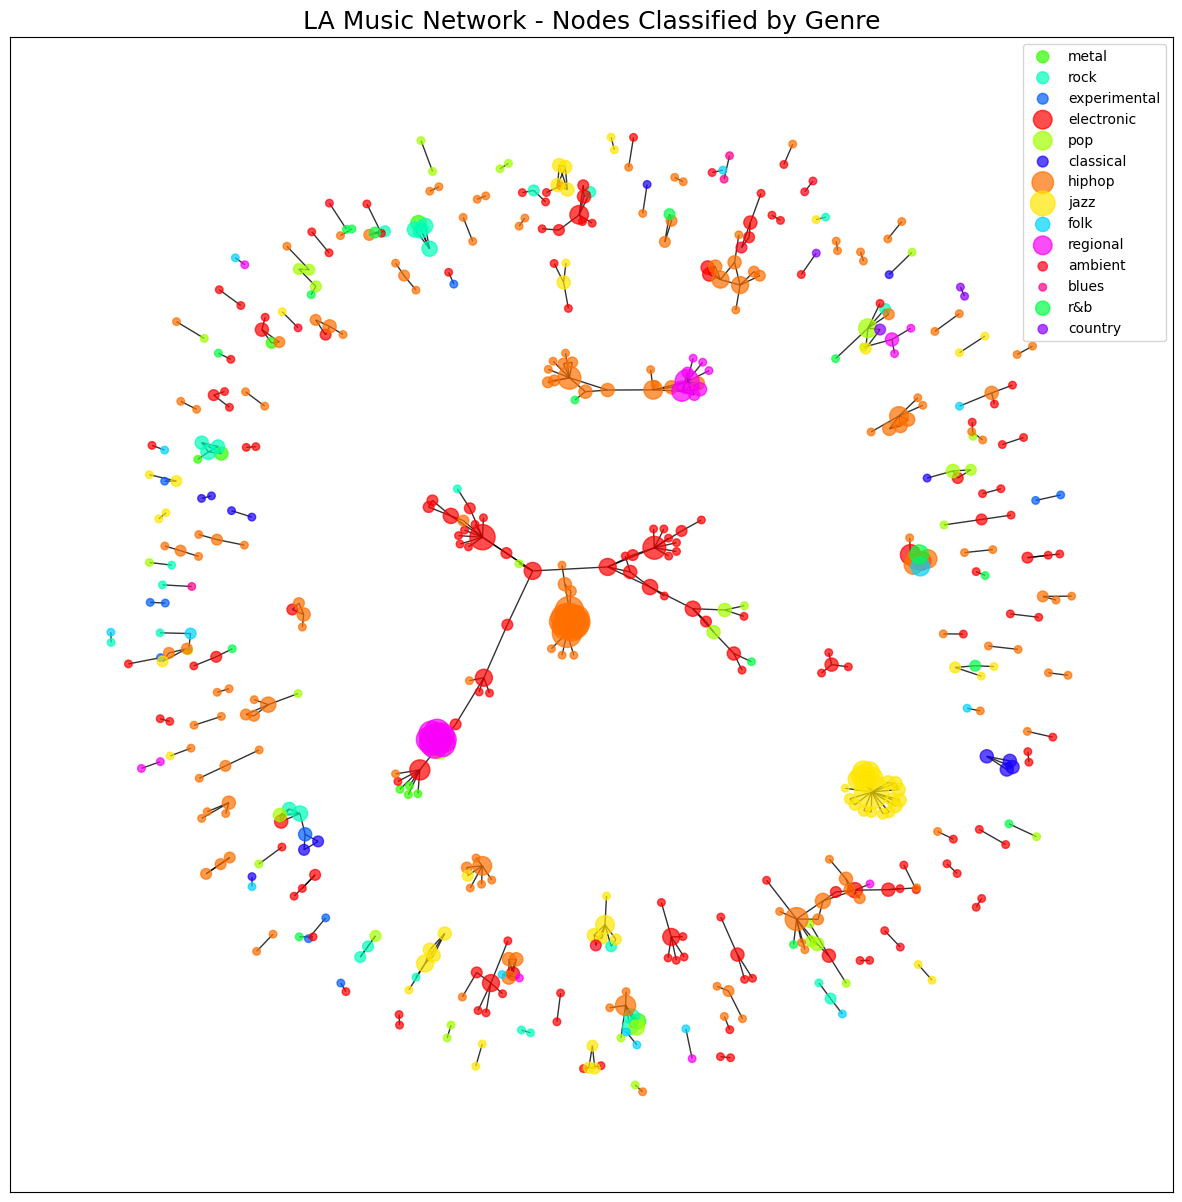

In [ ]:
# @title Draw reduced network
plt.figure(figsize=(15,15))
d = dict(G2.degree)
pos = nx.spring_layout(G2, k=1.5/np.sqrt(G2.number_of_nodes()),seed=102)
colordict = nx.get_node_attributes(G2,'color')
for p in partition:
  plist = list(p)
  col = genredict[plist[0]]['color']
  gen = genredict[plist[0]]['genre']
  nx.draw_networkx_nodes(G2,pos={l:pos[l] for l in plist},nodelist = plist, node_size=[d[k]*30 for k in plist],node_color=np.ones(len(plist))*col,cmap='hsv',vmin=0,vmax=13,alpha=0.7,label = gen)
nx.draw_networkx_edges(G2,pos=pos,alpha=0.8)
plt.legend()
#for node, (x, y) in pos.items():
   # plt.text(x, y, node, fontsize=d[node], ha='center', va='center',color='orange')
plt.title('LA Music Network - Nodes Classified by Genre', fontsize=18)
plt.show()

In [ ]:
#@title Redefine genre colors for largest component
largest_cc = max(nx.connected_components(G2), key=len)
G2sub = G2.subgraph(largest_cc)
nx.set_node_attributes(G2,genredict)
ccgenre = nx.get_node_attributes(G2sub,'genre')
pop = Counter(ccgenre.values())
ccgenre = set(ccgenre.values())
colordict = {}
pop = sorted(pop,key= lambda d : pop[d],reverse=True)
print(pop)
for i in range(len(pop)):
  colordict[pop[i]] = i
for n in genredict:
  if genredict[n]['genre'] in pop:
    genredict[n]['color'] = colordict[genredict[n]['genre']]
nx.set_node_attributes(G2,genredict)

['electronic', 'pop', 'metal', 'hiphop', 'rock', 'r&b']


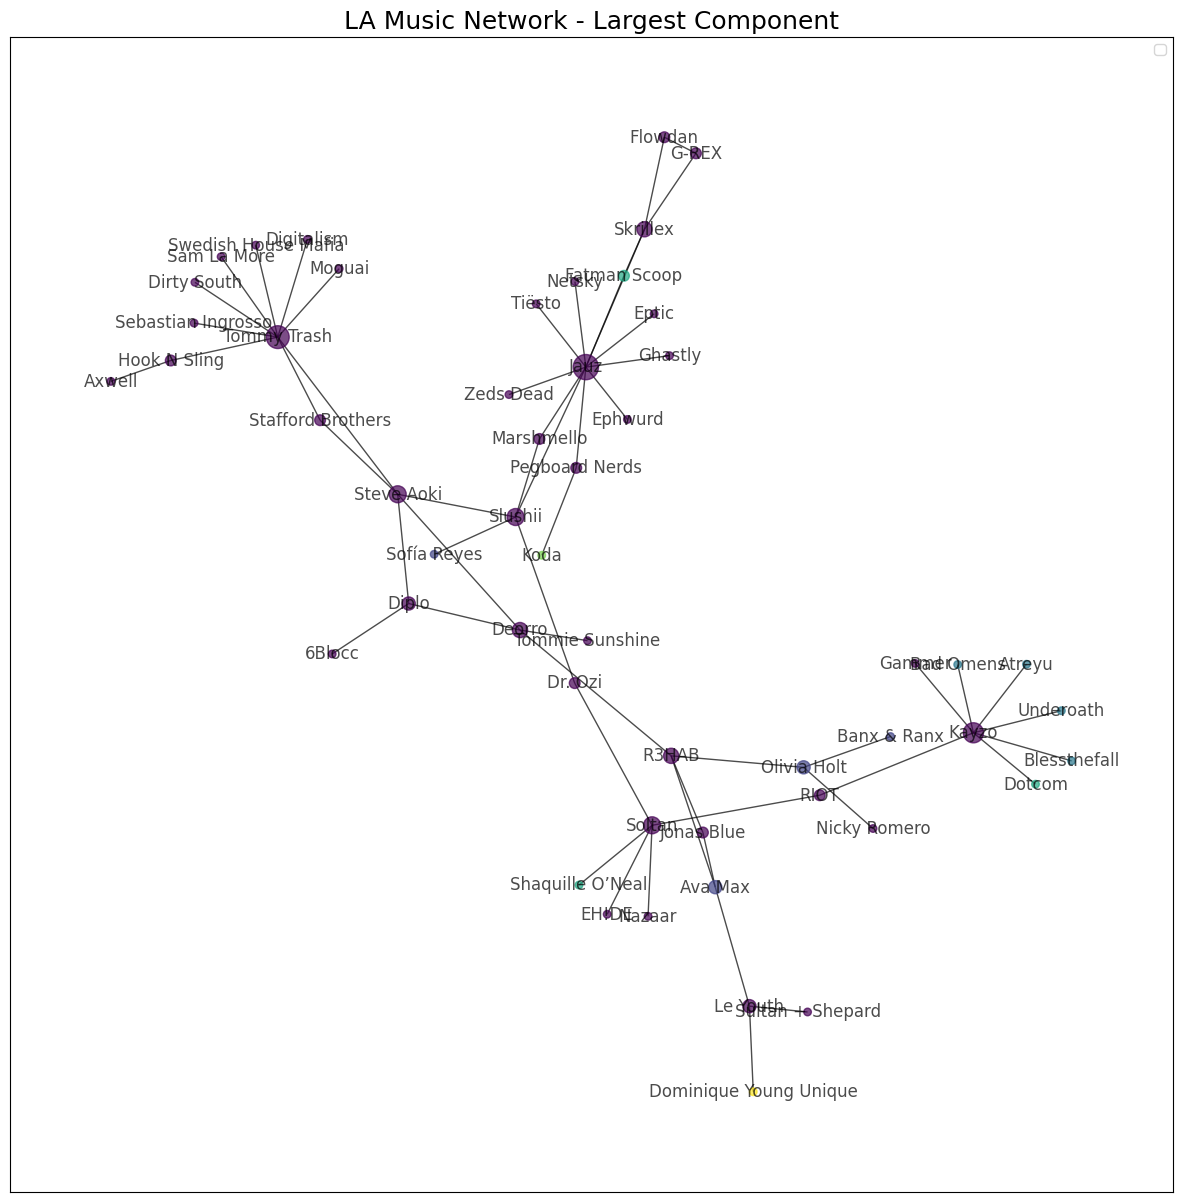

In [ ]:
#@title Draw largest component colored by genre
largest_cc = max(nx.connected_components(G2), key=len)
G2sub = G2.subgraph(largest_cc)
plt.figure(figsize=(15,15))
d = dict(G2sub.degree)
pos = nx.spring_layout(G2sub, k=1.5/np.sqrt(G2sub.number_of_nodes()),seed=102)
colordict = nx.get_node_attributes(G2sub,'color')
colorlist=[]
glist=[]
for n in G2sub.nodes():
  colorlist.append(colordict[n])
  glist.append(genredict[n]['genre'])
nx.draw_networkx(G2sub,pos=pos,node_size=[d[k]*30 for k in d],node_color=colorlist,alpha=0.7)
plt.legend()
#for node, (x, y) in pos.items():
   # plt.text(x, y, node, fontsize=d[node], ha='center', va='center',color='orange')
plt.title('LA Music Network - Largest Component', fontsize=18)
plt.show()

In [ ]:
#@title Create partition by genre
color_to_nodes = {}
for node, color in nx.get_node_attributes(G2sub, 'color').items():
    if color not in color_to_nodes:
        color_to_nodes[color] = []
    color_to_nodes[color].append(node)

# Now create the partition list of communities
partition = [set(nodes) for nodes in color_to_nodes.values()]
print(partition)

[{'Digitalism', 'Skrillex', 'Tommy Trash', 'Jonas Blue', 'Swedish House Mafia', 'Stafford Brothers', 'Nicky Romero', 'Slushii', 'Zeds Dead', 'Ghastly', '6Blocc', 'Eptic', 'Kayzo', 'Netsky', 'Soltan', 'EH!DE', 'Sultan + Shepard', 'Moguai', 'Sebastian Ingrosso', 'Steve Aoki', 'Dirty South', 'Deorro', 'Sam La More', 'G-REX', 'Le Youth', 'Pegboard Nerds', 'Tiësto', 'R3HAB', 'Flowdan', 'Hook N Sling', 'Tommie Sunshine', 'Axwell', 'Nazaar', 'Dr. Ozi', 'RIOT', 'Gammer', 'Diplo', 'Ephwurd', 'Marshmello', 'Jauz'}, {'Banx & Ranx', 'Sofía Reyes', 'Olivia Holt', 'Ava Max'}, {'Atreyu', 'Bad Omens', 'Underoath', 'Blessthefall'}, {'Koda'}, {'Fatman Scoop', 'Shaquille O’Neal', 'Dotcom'}, {'Dominique Young Unique'}]


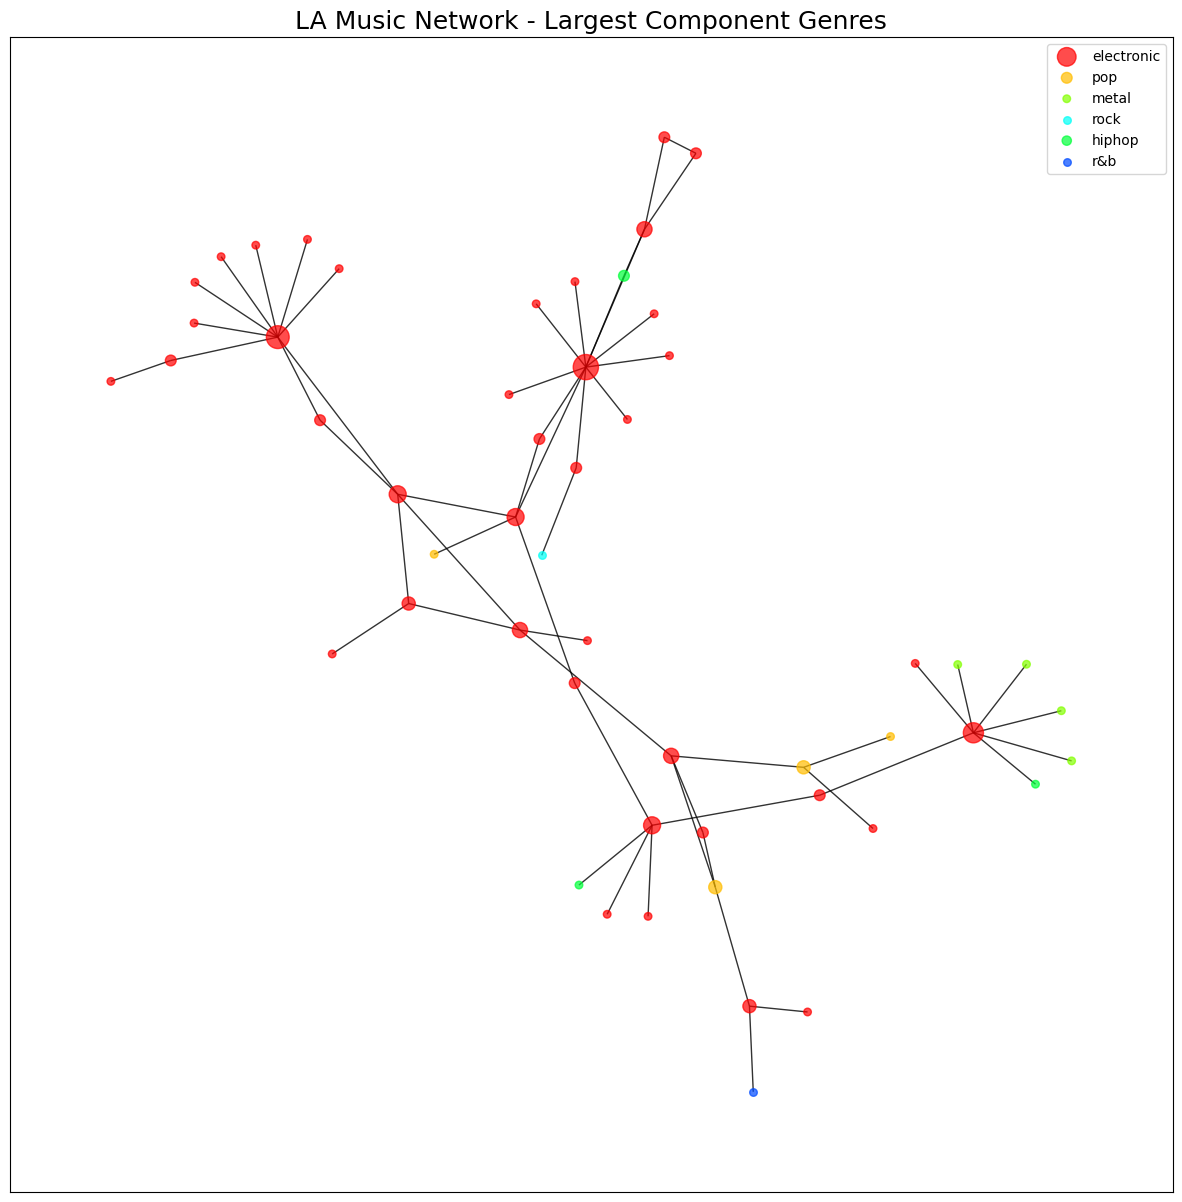

In [ ]:
#@title Draw largest component with genre legend
plt.figure(figsize=(15,15))
d = dict(G2sub.degree)
pos = nx.spring_layout(G2sub, k=1.5/np.sqrt(G2sub.number_of_nodes()),seed=102)
colordict = nx.get_node_attributes(G2sub,'color')
for p in partition:
  plist = list(p)
  col = genredict[plist[0]]['color']
  gen = genredict[plist[0]]['genre']
  nx.draw_networkx_nodes(G2sub,pos={l:pos[l] for l in plist},nodelist = plist, node_size=[d[k]*30 for k in plist],node_color=np.ones(len(plist))*col,cmap='hsv',vmin=0,vmax=8,alpha=0.7,label = gen)
nx.draw_networkx_edges(G2sub,pos=pos,alpha=0.8)
plt.legend()
#for node, (x, y) in pos.items():
   # plt.text(x, y, node, fontsize=d[node], ha='center', va='center',color='orange')
plt.title('LA Music Network - Largest Component Genres', fontsize=18)
plt.show()

('Steve Aoki', 'Slushii')
('Slushii', 'Dr. Ozi')
('Deorro', 'R3HAB')
('Steve Aoki', 'Tommy Trash')
('Tommy Trash', 'Stafford Brothers')
('Kayzo', 'RIOT')
('Jauz', 'Skrillex')
('Jauz', 'Fatman Scoop')
('Jauz', 'Pegboard Nerds')
('R3HAB', 'Olivia Holt')
('Tommy Trash', 'Hook N Sling')
('Jauz', 'Slushii')
('Jauz', 'Marshmello')
('Ava Max', 'Le Youth')
('Tommy Trash', 'Dirty South')
('Tiësto', 'Jauz')
('Bad Omens', 'Kayzo')
('Deorro', 'Tommie Sunshine')
('Tommy Trash', 'Sam La More')
('Jauz', 'Ephwurd')
('Kayzo', 'Dotcom')
('RIOT', 'Soltan')
('Steve Aoki', 'Stafford Brothers')
[-0.0005050945886944757, -0.0005434855151662831, -0.0005851007758476644, -0.0006302644854831739, -0.0006793395322991096, -0.0007327330158132931, -0.0007909025659227319, 0.003345636293733265, -0.0007505206164099172, 0.004392881727521072, -0.0006627323198028423, -0.000726320662763842, -0.000796518005087734, 0.004807672686460582, -0.0006928024529676627, -0.0007689392685143138, 0.004500074866353502, -0.000677795954788812

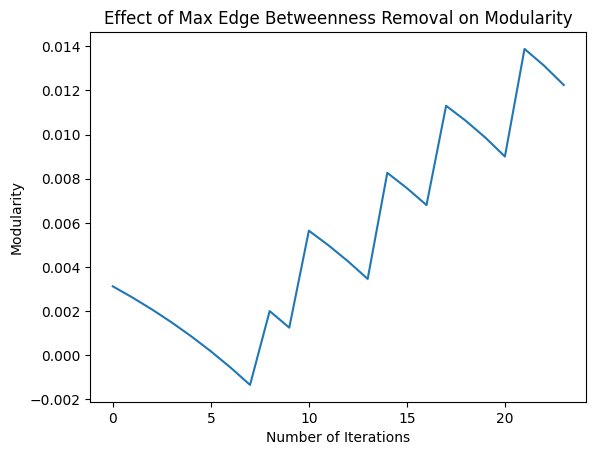

In [ ]:
#@title Modularity dynamics - Girvan Newman method
K2 = nx.Graph()
K2.add_edges_from([('Deorro', 'Steve Aoki'), ('Deorro', 'Diplo'), ('Deorro', 'R3HAB'), ('Deorro', 'Tommie Sunshine'), ('Tommy Trash', 'Stafford Brothers'), ('Tommy Trash', 'Dirty South'), ('Tommy Trash', 'Steve Aoki'), ('Tommy Trash', 'Hook N Sling'), ('Tommy Trash', 'Sam La More'), ('Tommy Trash', 'Swedish House Mafia'), ('Tommy Trash', 'Moguai'), ('Tommy Trash', 'Digitalism'), ('Tommy Trash', 'Sebastian Ingrosso'), ('Tiësto', 'Jauz'), ('Bad Omens', 'Kayzo'), ('6Blocc', 'Diplo'), ('Fatman Scoop', 'Jauz'), ('Fatman Scoop', 'Skrillex'), ('RIOT', 'Kayzo'), ('RIOT', 'Soltan'), ('Shaquille O’Neal', 'Soltan'), ('Ephwurd', 'Jauz'), ('Netsky', 'Jauz'), ('Sofía Reyes', 'Slushii'), ('Nicky Romero', 'Olivia Holt'), ('Dotcom', 'Kayzo'), ('Nazaar', 'Soltan'), ('Steve Aoki', 'Stafford Brothers'), ('Steve Aoki', 'Diplo'), ('Steve Aoki', 'Slushii'), ('Underoath', 'Kayzo'), ('Marshmello', 'Slushii'), ('Marshmello', 'Jauz'), ('Jonas Blue', 'R3HAB'), ('Jonas Blue', 'Ava Max'), ('Blessthefall', 'Kayzo'), ('Kayzo', 'Gammer'), ('Kayzo', 'Atreyu'), ('Le Youth', 'Dominique Young Unique'), ('Le Youth', 'Ava Max'), ('Le Youth', 'Sultan + Shepard'), ('Flowdan', 'Skrillex'), ('Flowdan', 'G-REX'), ('Dr. Ozi', 'Slushii'), ('Dr. Ozi', 'Soltan'), ('Ghastly', 'Jauz'), ('Banx & Ranx', 'Olivia Holt'), ('Pegboard Nerds', 'Jauz'), ('Pegboard Nerds', 'Koda'), ('Eptic', 'Jauz'), ('Jauz', 'Slushii'), ('Jauz', 'Skrillex'), ('Jauz', 'Zeds Dead'), ('G-REX', 'Skrillex'), ('Hook N Sling', 'Axwell'), ('EH!DE', 'Soltan'), ('Olivia Holt', 'R3HAB'), ('R3HAB', 'Ava Max')])

def remove_top_ebet(K2):
    #your code here
    ebet = nx.edge_betweenness_centrality(K2)
    sorted_ebet = sorted(ebet.items(), key=operator.itemgetter(1), reverse=True)
    print(sorted_ebet[0][0])
    K2.remove_edge(*(sorted_ebet[0][0]))
    return K2

modularity = [nx.algorithms.community.modularity(K2,partition)]
for i in range(23):
    K2 = remove_top_ebet(K2)
    # TODO your code here: using the community assignments for each node from above (mrhi and johna), compute the modularity at each step
    modularity.append(nx.algorithms.community.modularity(K2,partition))


# TODO your code here: plot the values of modularity across 10 iterations
iterations = np.arange(24)
delta = []
for i in range(23):
  delta.append(modularity[i+1]-modularity[i])
print(delta)
print(max(delta))
plt.figure()
plt.plot(iterations,modularity)
plt.title('Effect of Max Edge Betweenness Removal on Modularity')
plt.xlabel('Number of Iterations')
plt.ylabel('Modularity')
plt.show()

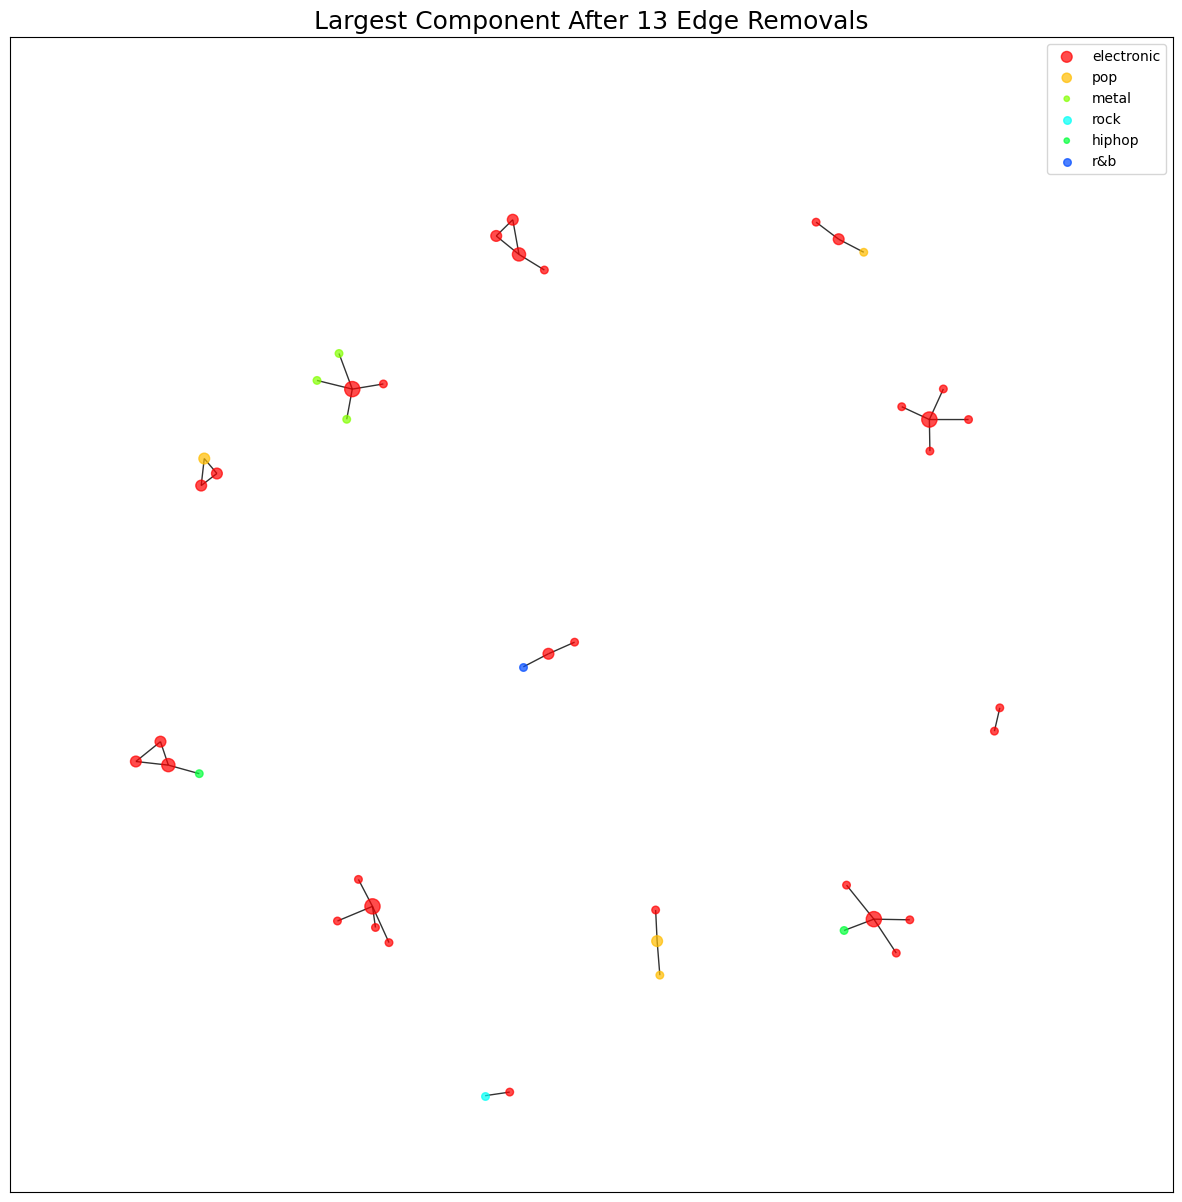

In [ ]:
#@title Communities of largest component after 13 Girvan Newman iterations
plt.figure(figsize=(15,15))
d = dict(K2.degree)
pos = nx.spring_layout(K2)
colordict = nx.get_node_attributes(G2sub,'color')
for p in partition:
  plist = list(p)
  col = genredict[plist[0]]['color']
  gen = genredict[plist[0]]['genre']
  nx.draw_networkx_nodes(K2,pos={l:pos[l] for l in plist},nodelist = plist, node_size=[d[k]*30 for k in plist],node_color=np.ones(len(plist))*col,cmap='hsv',vmin=0,vmax=8,alpha=0.7,label = gen)
nx.draw_networkx_edges(K2,pos=pos,alpha=0.8)
#nx.draw_networkx_labels(K2,pos=pos)
plt.legend()
#for node, (x, y) in pos.items():
   # plt.text(x, y, node, fontsize=d[node], ha='center', va='center',color='orange')
plt.title('Largest Component After 13 Edge Removals', fontsize=18)
plt.show()

<Axes: xlabel='Count'>

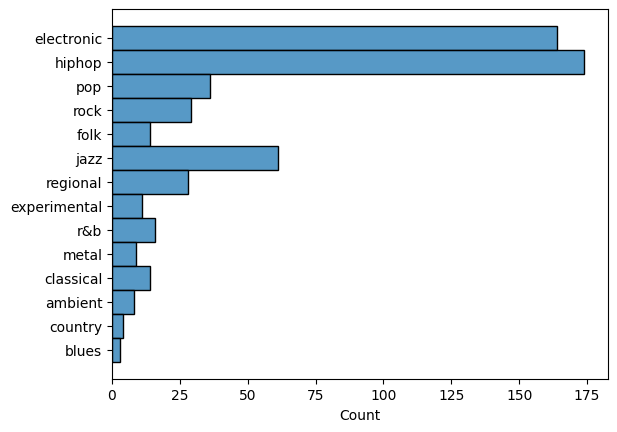

In [ ]:
#@title Genre distribution
gen = nx.get_node_attributes(G2,'genre')
c = Counter(gen.values())
gcount = sorted([(i,c[i]) for i in c], key=lambda i:i[1], reverse=True)
sns.histplot(nx.get_node_attributes(G2,'genre'),y=nx.get_node_attributes(G2,'genre'))

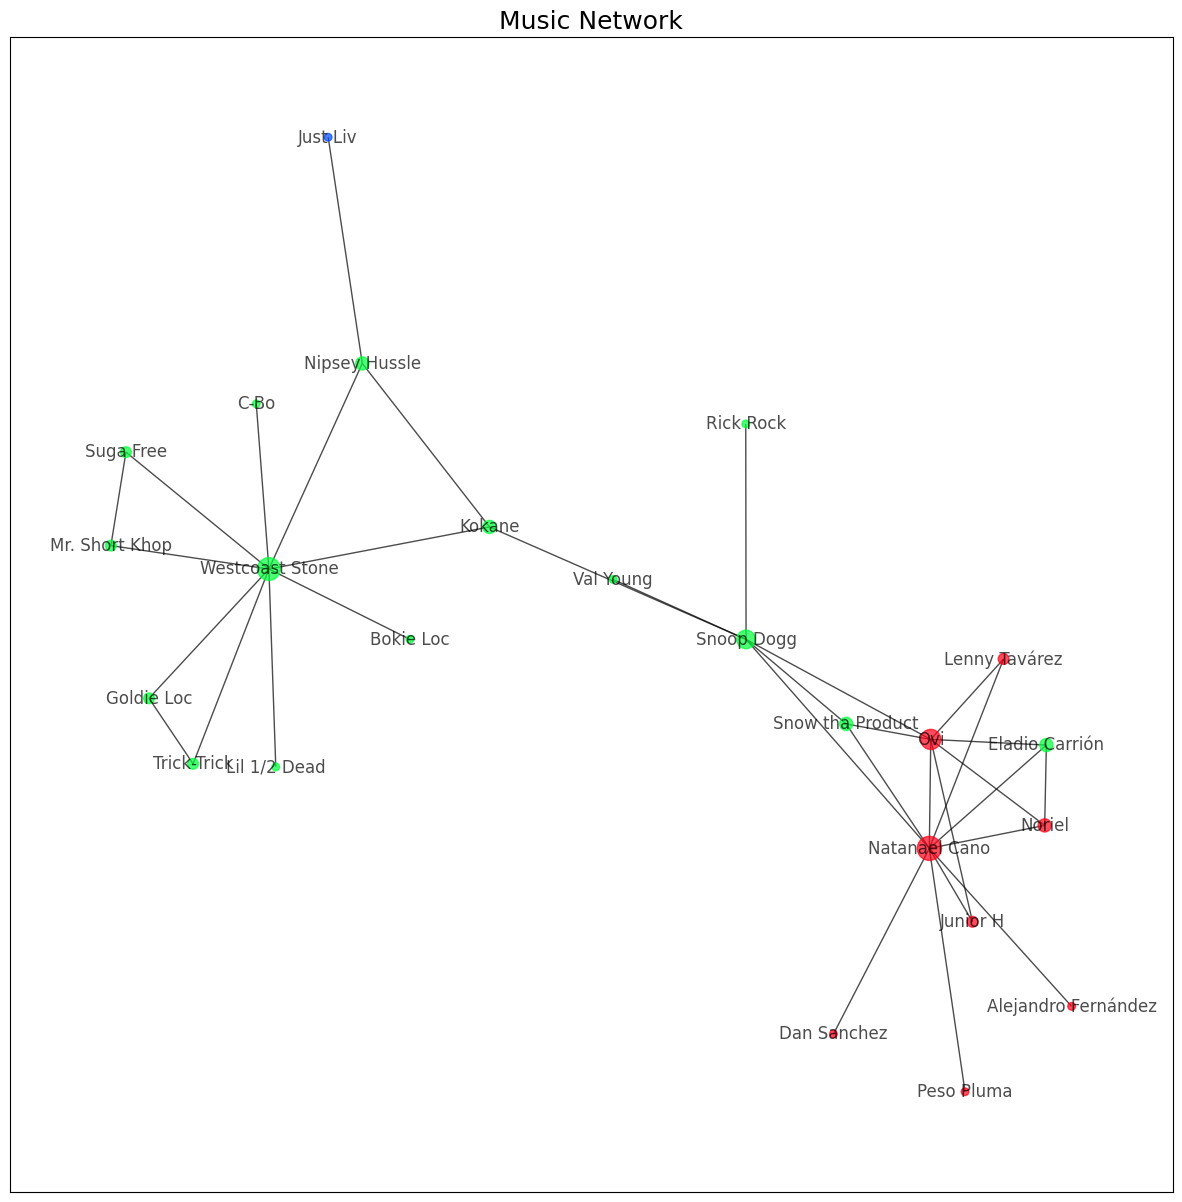

In [ ]:
#@title Second-largest component
sec_largest_cc = sorted(nx.connected_components(G2),key=len,reverse=True)[1]
G2sub2 = G2.subgraph(sec_largest_cc)
plt.figure(figsize=(15,15))
d = dict(G2sub2.degree)
pos = nx.spring_layout(G2sub2, k=1.5/np.sqrt(G2sub2.number_of_nodes()),seed=102)
colordict = nx.get_node_attributes(G2sub2,'color')
colorlist=[]
for n in G2sub2.nodes():
  colorlist.append(colordict[n])

nx.draw_networkx(G2sub2,pos=pos,node_size=[d[k]*30 for k in d],node_color=colorlist,cmap='hsv',vmin=0,vmax=8,alpha=0.7)
#for node, (x, y) in pos.items():
   # plt.text(x, y, node, fontsize=d[node], ha='center', va='center',color='orange')
plt.title('Music Network', fontsize=18)
plt.show()

In [ ]:
#@title Summary statistics - reduced
num_nodes = G2.number_of_nodes()
num_edges = G2.number_of_edges()

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

avg_degree = sum(dict(G2.degree()).values()) / num_nodes
print(f"Average Degree: {avg_degree}")


Number of Nodes: 571
Number of Edges: 665
Average Degree: 2.329246935201401


In [ ]:
#@title Summary statistics - full
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average Degree: {avg_degree}")

Number of Nodes: 3305
Number of Edges: 4342
Average Degree: 2.627534039334342


In [ ]:
#@title Components and sizes
num_components = nx.number_connected_components(G2)
print(f"Number of Connected Components: {num_components}")

component_sizes = [len(component) for component in sorted(nx.connected_components(G2),key = lambda d: len(d),reverse=True)]
print(f"Sizes of Connected Components: {component_sizes}")

num_components = nx.number_connected_components(G)
print(f"Number of Connected Components: {num_components}")

component_sizes = [len(component) for component in sorted(nx.connected_components(G),key = lambda d: len(d),reverse=True)]
print(f"Sizes of Connected Components: {component_sizes}")

Number of Connected Components: 153
Sizes of Connected Components: [53, 24, 21, 19, 19, 12, 10, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Number of Connected Components: 648
Sizes of Connected Components: [758, 121, 41, 33, 28, 28, 27, 26, 22, 19, 16, 15, 14, 14, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:
#@title Degree and betweenness centralities
# degree centrality
degree_centrality = nx.degree_centrality(G2)
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality}")

# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G2)
print("Betweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"{node}: {centrality}")

Degree Centrality:
Judas Priest: 0.005263157894736842
Trust: 0.005263157894736842
Molly Hatchet: 0.005263157894736842
Ozzy Osbourne: 0.007017543859649123
Randy Rhoads: 0.0017543859649122807
John Cale: 0.007017543859649123
Terry Riley: 0.005263157894736842
Kevin Ayers: 0.005263157894736842
Brian Eno: 0.005263157894736842
Nico: 0.005263157894736842
Philip Glass: 0.0035087719298245615
Steve Reich: 0.0035087719298245615
Austin Wintory: 0.0017543859649122807
Tina Guo: 0.0017543859649122807
Mike Shinoda: 0.0017543859649122807
Joseph Trapanese: 0.0017543859649122807
Chris Lake: 0.0017543859649122807
Emma Hewitt: 0.008771929824561403
Cosmic Gate: 0.0017543859649122807
Dash Berlin: 0.0017543859649122807
Lange: 0.0017543859649122807
Allure: 0.0017543859649122807
Lindsey Stirling: 0.0035087719298245615
Eppic: 0.0017543859649122807
Kurt Hugo Schneider: 0.0035087719298245615
Macy Kate: 0.0035087719298245615
AKB48: 0.0035087719298245615
The Beatles: 0.0035087719298245615
Jon Brion: 0.005263157894736

Top 10 Nodes with Highest Degree Centrality:
Joe LaBarbera: 0.03508771929824561
takeo: 0.026315789473684213
Pointy Features: 0.02456140350877193
steezy prime: 0.021052631578947368
Kanisan: 0.021052631578947368
Towerz: 0.021052631578947368
mell-ø: 0.021052631578947368
no one’s perfect: 0.021052631578947368
Elijah Lee: 0.021052631578947368
Bert: 0.021052631578947368


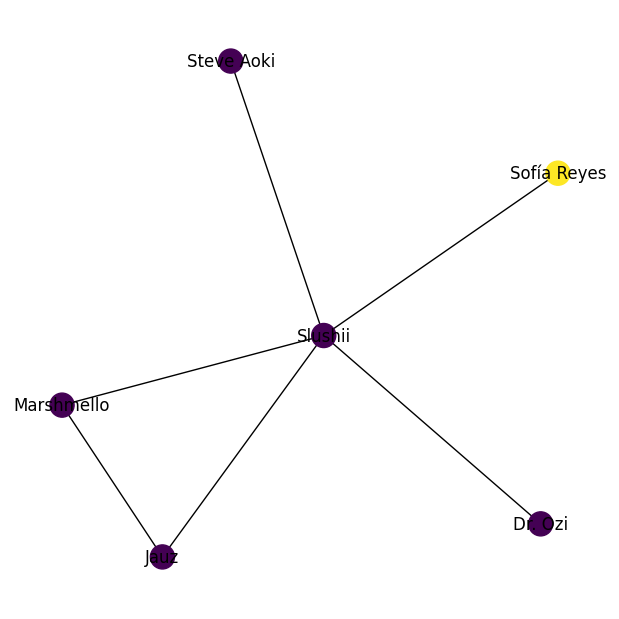


Top 10 Nodes with Highest Betweenness Centrality:
Slushii: 0.005432738260413776
Steve Aoki: 0.004914747325255141
Jauz: 0.003323775167267906
Dr. Ozi: 0.002959948200906484
Soltan: 0.002947615083402707
Deorro: 0.00264545370456017
Tommy Trash: 0.0023371257669657446
R3HAB: 0.0022631270619430824
RIOT: 0.00194246600684488
Kayzo: 0.001794468596799556


In [ ]:
#@title Highest degree and betweenness nodes
# Degree Centrality
degree_centrality = nx.degree_centrality(G2)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Nodes with Highest Degree Centrality:")
for node, centrality in sorted_degree_centrality[:10]:
    print(f"{node}: {centrality}")

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G2)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_nodes = [node for node, centrality in sorted_betweenness_centrality]

node = sorted_nodes[0]

colordict = nx.get_node_attributes(G2, 'color')  # Your existing color dictionary

# Create the ego network
ego_net = nx.ego_graph(G2, node)

# Get colors for nodes in the ego network
ego_colors = [colordict[n] for n in ego_net.nodes()]

# Visualize the ego network
plt.figure(figsize=(6, 6))
nx.draw(ego_net, node_color=ego_colors, with_labels=True)
plt.show()
print("\nTop 10 Nodes with Highest Betweenness Centrality:")
for node, centrality in sorted_betweenness_centrality[:10]:
    print(f"{node}: {centrality}")


In [ ]:
#@title Eigenvector centrality
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G2)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 nodes with the highest eigenvector centrality
print("Top 10 Nodes with Highest Eigenvector Centrality:")
for node, centrality in sorted_eigenvector_centrality[:10]:
    print(f"{node}: {centrality}")
print("These nodes are influencial defined upon their connections")

Top 10 Nodes with Highest Eigenvector Centrality:
takeo: 0.28160673756244725
Pointy Features: 0.28013096744179244
steezy prime: 0.27622031651822304
Kanisan: 0.27622031651822304
Towerz: 0.27622031651822304
mell-ø: 0.27622031651822304
no one’s perfect: 0.27622031651822304
Elijah Lee: 0.27622031651822304
Bert: 0.27622031651822304
Otaam: 0.27622031651822304
These nodes are influencial defined upon their connections


In [ ]:
#@title Closeness centrality
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G2)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the closeness centrality for each node
print("Closeness Centrality for Each Node:")
for node, centrality in sorted_closeness_centrality:
    print(f"{node}: {centrality}")

Closeness Centrality for Each Node:
Joe LaBarbera: 0.03508771929824561
Slushii: 0.029464966764737935
Steve Aoki: 0.028577467765800044
takeo: 0.025837320574162683
Pointy Features: 0.025837320574162683
Jauz: 0.025368233417769025
Dr. Ozi: 0.02523329600597238
Deorro: 0.02432748538011696
Marshmello: 0.023838490699109587
Tommy Trash: 0.023719298245614036
Diplo: 0.02325421396628827
Stafford Brothers: 0.02280701754385965
steezy prime: 0.02273684210526316
Kanisan: 0.02273684210526316
Towerz: 0.02273684210526316
mell-ø: 0.02273684210526316
no one’s perfect: 0.02273684210526316
Elijah Lee: 0.02273684210526316
Bert: 0.02273684210526316
Otaam: 0.02273684210526316
trxxshed: 0.02273684210526316
tender spring: 0.02273684210526316
H.1: 0.02273684210526316
Sofía Reyes: 0.02237669645812645
Soltan: 0.02186110437383782
Janis Mann: 0.02126528442317916
Peter Erskine: 0.02126528442317916
Roy McCurdy: 0.02126528442317916
Tamir Hendelman: 0.02126528442317916
Chuck Berghofer: 0.02126528442317916
John Clayton: 0.

In [ ]:
#@title Centrality correlation
eigenvector_centrality = nx.eigenvector_centrality(G2)
closeness_centrality = nx.closeness_centrality(G2)
betweenness_centrality = nx.betweenness_centrality(G2)

nodes = G2.nodes()
eigenvector_values = [eigenvector_centrality[node] for node in nodes]
closeness_values = [closeness_centrality[node] for node in nodes]
betweenness_values = [betweenness_centrality[node] for node in nodes]

correlation_eigenvector_closeness = np.corrcoef(eigenvector_values, closeness_values)[0, 1]
correlation_eigenvector_betweenness = np.corrcoef(eigenvector_values, betweenness_values)[0, 1]
correlation_closeness_betweenness = np.corrcoef(closeness_values, betweenness_values)[0, 1]

print(f"Correlation between Eigenvector Centrality and Closeness Centrality: {correlation_eigenvector_closeness}")
print(f"Correlation between Eigenvector Centrality and Betweenness Centrality: {correlation_eigenvector_betweenness}")
print(f"Correlation between Closeness Centrality and Betweenness Centrality: {correlation_closeness_betweenness}")


Correlation between Eigenvector Centrality and Closeness Centrality: 0.36543153045135524
Correlation between Eigenvector Centrality and Betweenness Centrality: -0.011423443453481319
Correlation between Closeness Centrality and Betweenness Centrality: 0.39123351137360834


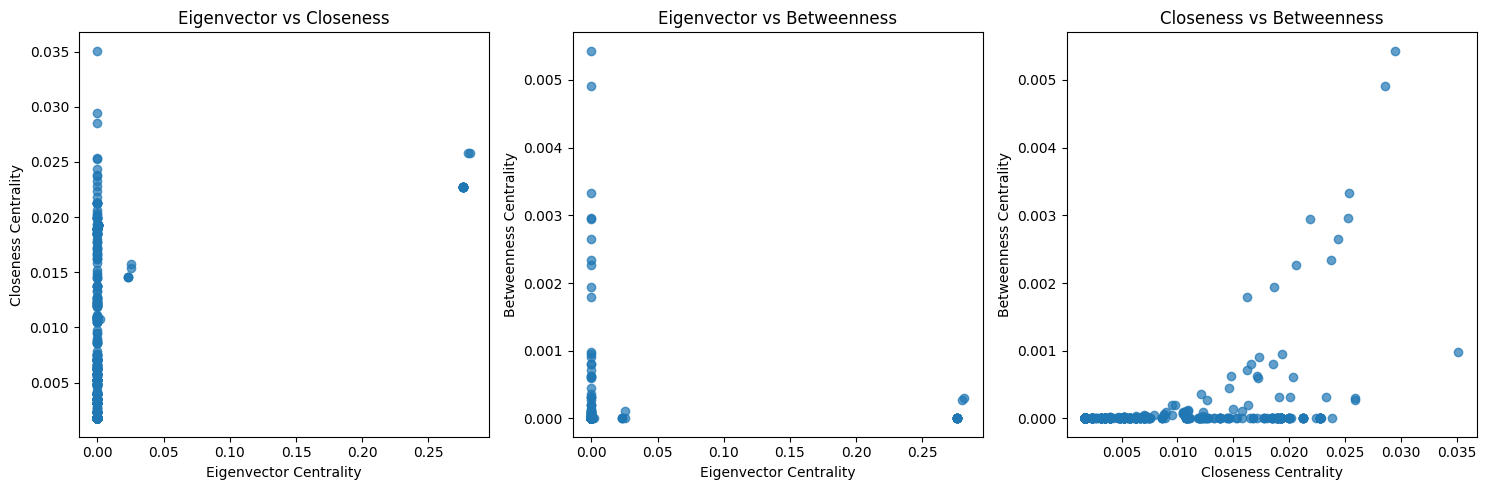

In [ ]:
#@title Centrality scatterplots
plt.figure(figsize=(15, 5))

# Scatter plot for Eigenvector Centrality vs Closeness Centrality
plt.subplot(131)
plt.scatter(eigenvector_values, closeness_values, alpha=0.7)
plt.title('Eigenvector vs Closeness')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Closeness Centrality')

# Scatter plot for Eigenvector Centrality vs Betweenness Centrality
plt.subplot(132)
plt.scatter(eigenvector_values, betweenness_values, alpha=0.7)
plt.title('Eigenvector vs Betweenness')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Betweenness Centrality')

# Scatter plot for Closeness Centrality vs Betweenness Centrality
plt.subplot(133)
plt.scatter(closeness_values, betweenness_values, alpha=0.7)
plt.title('Closeness vs Betweenness')
plt.xlabel('Closeness Centrality')
plt.ylabel('Betweenness Centrality')

plt.tight_layout()
plt.show()

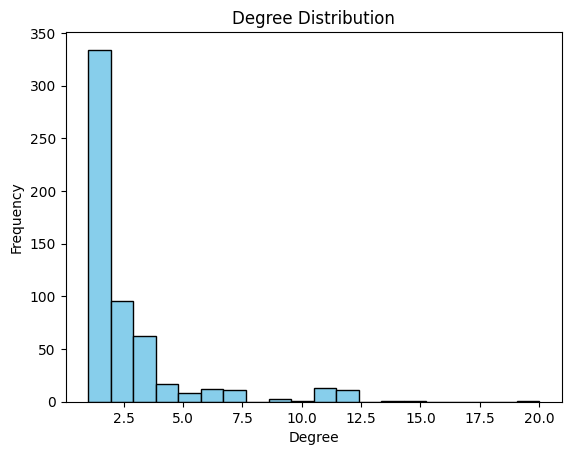

In [ ]:
#@title Degree distribution
# Degree distribution histogram
degrees = dict(G2.degree()).values()
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [ ]:
#@title Global clustering coefficient
# Global clustering coefficient
global_clustering_coefficient = nx.average_clustering(G2)
print(f"Global Clustering Coefficient: {global_clustering_coefficient}")

Global Clustering Coefficient: 0.28853092299492894


dict_keys(['electronic', 'hiphop', 'jazz', 'pop', 'metal', 'r&b', 'rock', 'experimental', 'regional', 'classical', 'country', 'folk', 'blues', 'ambient', 'spoken word'])


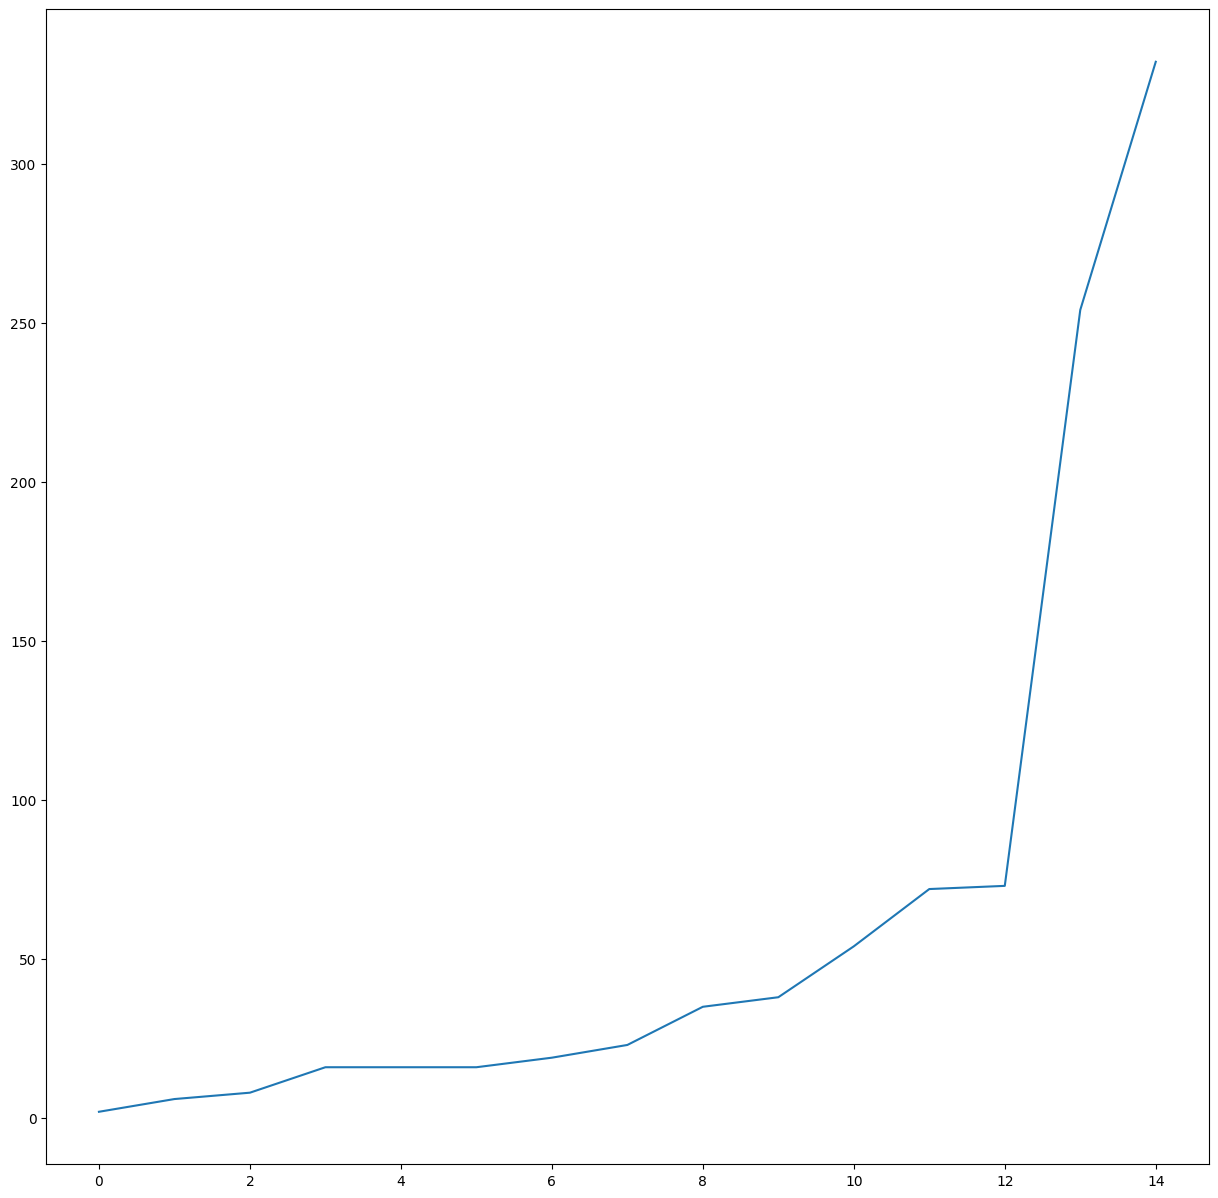

In [ ]:
#@title Genre class sizes
c = Counter([genredict[i]['genre'] for i in genredict])
print(c.keys())
plt.figure(figsize=(15,15))
plt.plot(sorted(c.values()))

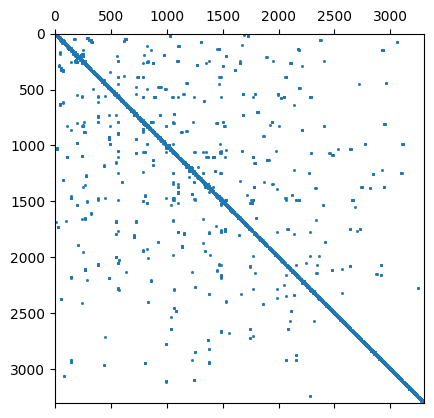

In [ ]:
#@title Visualize adjacency matrix
G_np = nx.to_numpy_array(G, nodelist=list(G.nodes))
# Convert to a SciPy sparse matrix
sparse_matrix = csr_matrix(G_np)
# Plotting a portion of the matrix
plt.spy(sparse_matrix, markersize=1)
plt.show()

In [ ]:
#@title Define degree distribution function
def degree_distribution(degree_sequence):

  degree_distribution = []
  max_degree = max(degree_sequence) + 1
  bins_range = np.arange(max_degree) - 0.5
  hist, _ = np.histogram(degree_sequence, bins=bins_range, density=True)
  degree_distribution = hist.tolist()


  return degree_distribution

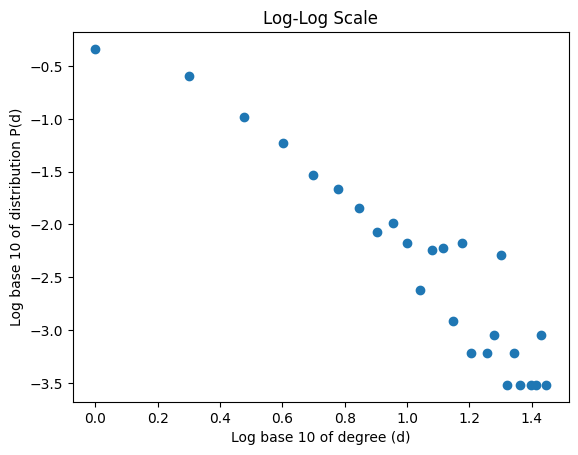

In [ ]:
#@title Log-log plot of degree distribution
# compute the degree distribution for the citation network (Cora)
deg_sequence = np.array([deg for (node, deg) in G.degree()])

deg_distribution = degree_distribution(deg_sequence)
unique_degrees, counts = np.unique(deg_sequence, return_counts=True)

probabilities = counts / sum(counts)


nonzero_indices = probabilities > 0
filtered_degrees = unique_degrees[nonzero_indices]
filtered_probabilities = probabilities[nonzero_indices]


log_degrees = np.log10(filtered_degrees)
log_probabilities = np.log10(filtered_probabilities)


fig, ax = plt.subplots()
ax.plot(log_degrees, log_probabilities, 'o')
ax.set_title('Log-Log Scale')
ax.set_xlabel('Log base 10 of degree (d)')
ax.set_ylabel('Log base 10 of distribution P(d)')
plt.show()


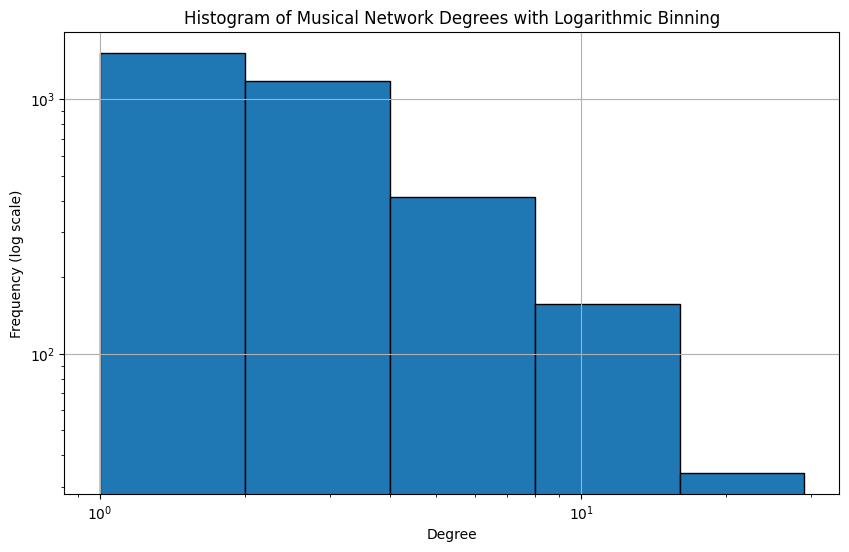

In [ ]:
#@title Degree distribution with logarithmic binning
max_degree = max(deg_sequence)
# Create bins that are equispaced in logarithmic scale
bins = [2**n for n in range(int(np.ceil(np.log2(max_degree + 1))))]
# Ensure the last bin covers the maximum degree
bins.append(max_degree + 1)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(deg_sequence, bins=bins, edgecolor='black', log=True)
plt.title("Histogram of Musical Network Degrees with Logarithmic Binning")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

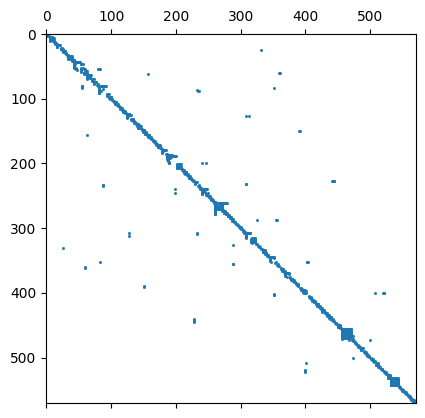

In [ ]:
#@title Visualize adjacency matrix - reduced
G2_np = nx.to_numpy_array(G2, nodelist=list(G2.nodes))
sparse_matrix2 = csr_matrix(G2_np)
# Plotting a portion of the matrix
plt.spy(sparse_matrix2, markersize=1)
plt.show()

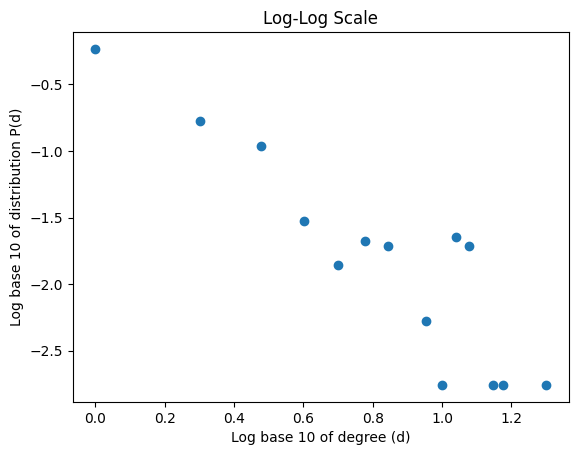

In [ ]:
#@title Log-log plot of degree distribution - reduced
deg_sequence = np.array([deg for (node, deg) in G2.degree()])

deg_distribution = degree_distribution(deg_sequence)
unique_degrees, counts = np.unique(deg_sequence, return_counts=True)

probabilities = counts / sum(counts)


nonzero_indices = probabilities > 0
filtered_degrees = unique_degrees[nonzero_indices]
filtered_probabilities = probabilities[nonzero_indices]


log_degrees = np.log10(filtered_degrees)
log_probabilities = np.log10(filtered_probabilities)


fig, ax = plt.subplots()
ax.plot(log_degrees, log_probabilities, 'o')
ax.set_title('Log-Log Scale')
ax.set_xlabel('Log base 10 of degree (d)')
ax.set_ylabel('Log base 10 of distribution P(d)')
plt.show()

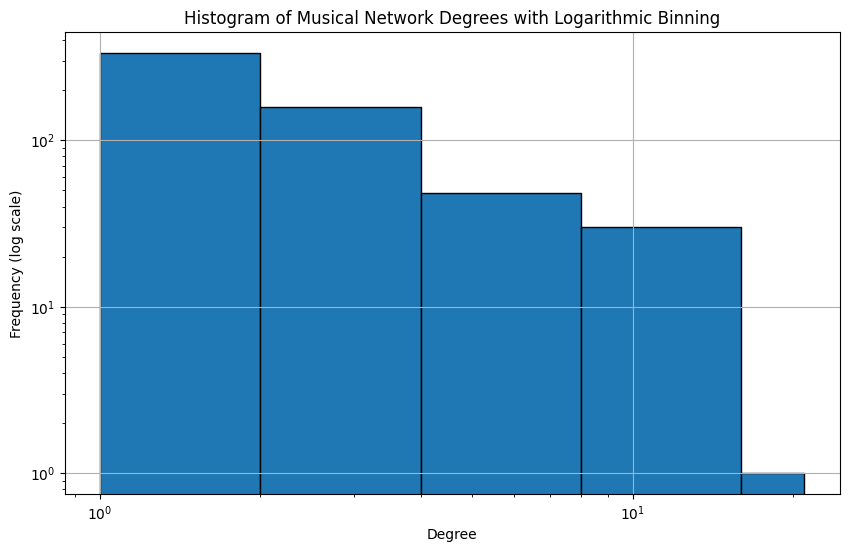

In [ ]:
#@title Degree distribution with logarithmic binning - reduced
max_degree = max(deg_sequence)
# Create bins that are equispaced in logarithmic scale
bins = [2**n for n in range(int(np.ceil(np.log2(max_degree + 1))))]
# Ensure the last bin covers the maximum degree
bins.append(max_degree + 1)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(deg_sequence, bins=bins, edgecolor='black', log=True)
plt.title("Histogram of Musical Network Degrees with Logarithmic Binning")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
#@title Full network modularity
color_to_nodes = {}
for node, color in nx.get_node_attributes(G2, 'color').items():
    if color not in color_to_nodes:
        color_to_nodes[color] = []
    color_to_nodes[color].append(node)

# Now create the partition list of communities
partition = [set(nodes) for nodes in color_to_nodes.values()]

# Calculate the modularity
modularity_score = community.modularity(G2, partition)
print(f"The modularity of the network is: {modularity_score}")

The modularity of the network is: 0.5074894001922098


In [ ]:
#@title Modularity vitality - (who builds the best bridges?)
# Assuming G2 is your graph
def calculate_modularity(G, partition):
    return community.modularity(G, partition)

# Calculate the initial modularity
initial_partition = [set(nodes) for nodes in color_to_nodes.values()]
initial_modularity = calculate_modularity(G2, initial_partition)

# Dictionary to store modularity increase for each node
modularity_increase = {}

for node in list(G2.nodes()):
    # Remove the node temporarily
    G_temp = G2.copy()
    G_temp.remove_node(node)

    # Recalculate the community partition and modularity
    temp_partition = [set(n for n in community if n != node) for community in initial_partition]
    temp_modularity = calculate_modularity(G_temp, temp_partition)

    # Calculate the increase and store it
    increase = temp_modularity - initial_modularity
    percentage_increase = (increase / initial_modularity) * 100 if initial_modularity != 0 else 0
    modularity_increase[node] = percentage_increase

# Now find the top 10 nodes
top_10_nodes = sorted(modularity_increase, key=modularity_increase.get, reverse=True)[:10]

print("These are the nodes, that when removed, brings about the maximum increase in the modularity score")
# Output the results
max_node = {}
for node in top_10_nodes:

    print(f"Node: {node}, Percentage Increase in Modularity: {modularity_increase[node]:.2f}%")

These are the nodes, that when removed, brings about the maximum increase in the modularity score
Node: Los Tucanes de Tijuana, Percentage Increase in Modularity: 1.54%
Node: SEBii, Percentage Increase in Modularity: 1.26%
Node: Junoflo, Percentage Increase in Modularity: 1.06%
Node: Shaliek, Percentage Increase in Modularity: 1.01%
Node: Left at London, Percentage Increase in Modularity: 1.01%
Node: umru, Percentage Increase in Modularity: 1.00%
Node: Cali Cartier, Percentage Increase in Modularity: 0.90%
Node: Mohawk Johnson, Percentage Increase in Modularity: 0.90%
Node: William Crooks, Percentage Increase in Modularity: 0.90%
Node: Kayzo, Percentage Increase in Modularity: 0.88%


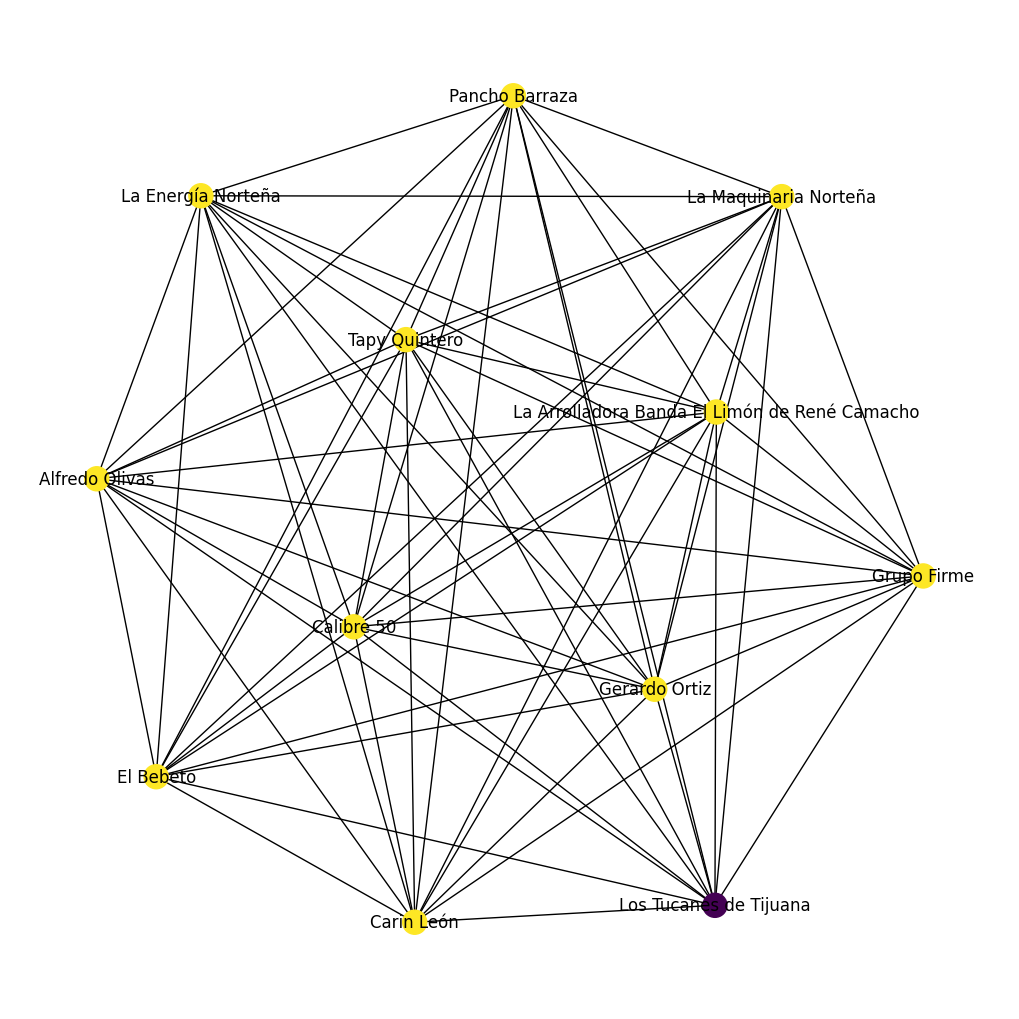

In [ ]:
#@title Most vital node ego network (possible trendsetter)
node = top_10_nodes[0]

colordict = nx.get_node_attributes(G2, 'color')  # Your existing color dictionary

# Create the ego network
ego_net = nx.ego_graph(G2, node)

# Get colors for nodes in the ego network
ego_colors = [colordict[n] for n in ego_net.nodes()]

# Visualize the ego network
plt.figure(figsize=(10, 10))
nx.draw(ego_net, node_color=ego_colors, with_labels=True)
plt.show()

<Figure size 1200x1200 with 0 Axes>

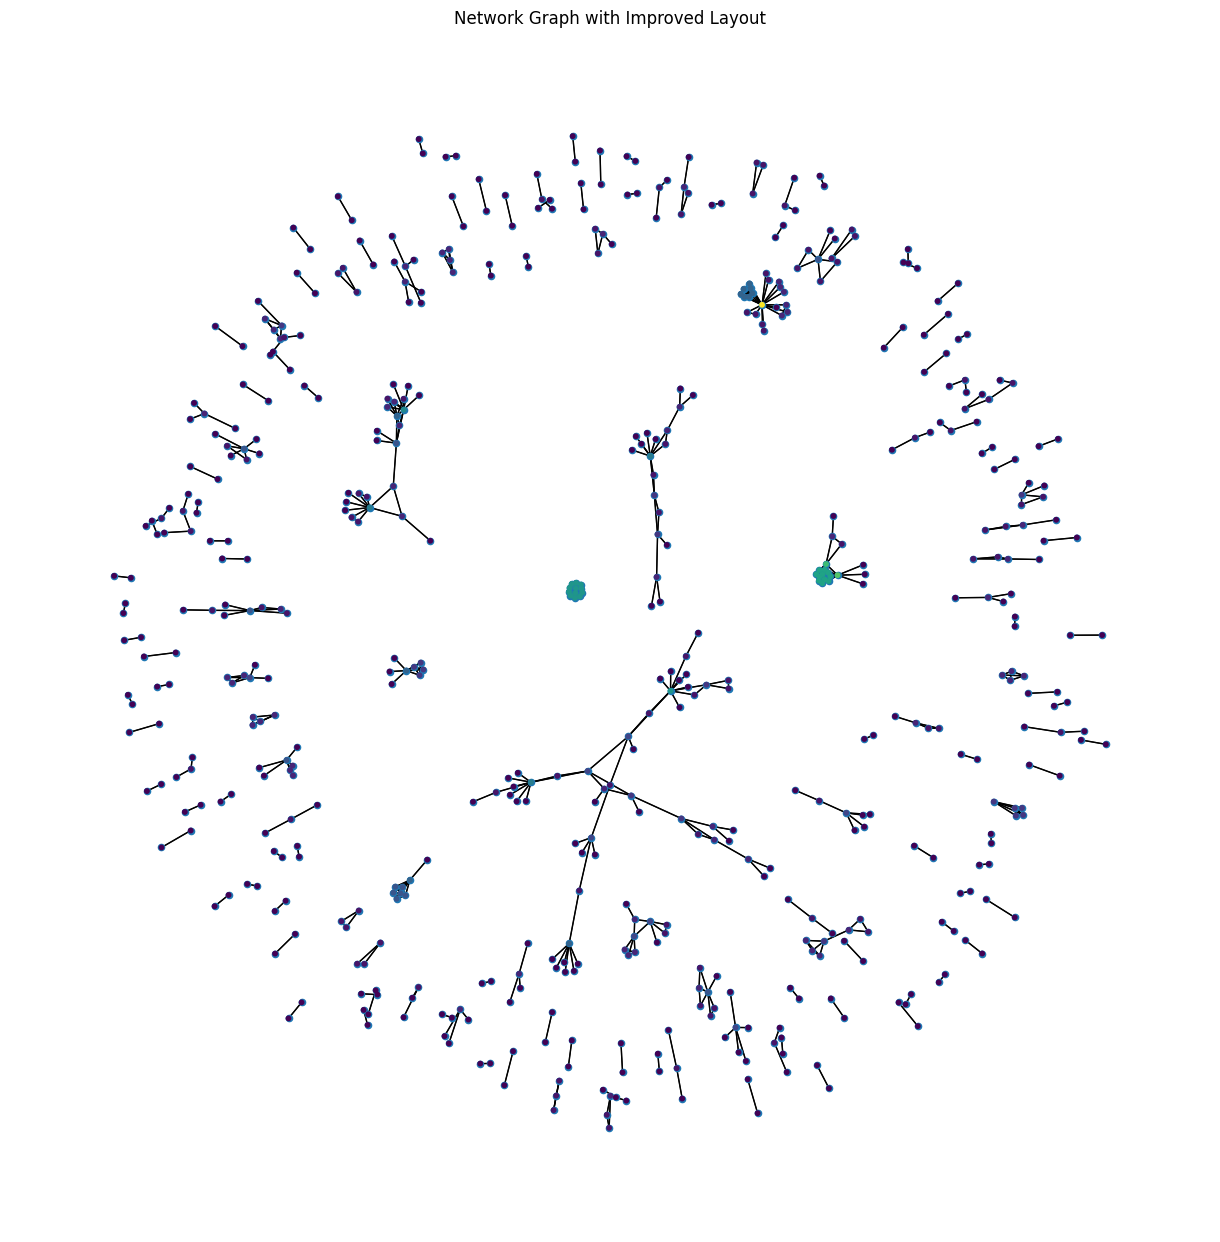

Community 0: ['Skrillex', 'Sofía Reyes', 'Underoath', 'Blessthefall', 'Koda', 'G-REX', 'Slushii', 'Pegboard Nerds', 'Tiësto', 'Zeds Dead', 'Shaquille O’Neal', 'Dotcom', 'Flowdan', 'Nazaar', 'Dr. Ozi', 'Ghastly', 'Atreyu', 'RIOT', 'Kayzo', 'Eptic', 'Gammer', 'Fatman Scoop', 'Ephwurd', 'Netsky', 'Soltan', 'EH!DE', 'Marshmello', 'Jauz', 'Bad Omens']
Community 1: ['Banx & Ranx', 'Digitalism', 'Sebastian Ingrosso', 'Steve Aoki', 'Dirty South', 'Jonas Blue', 'Tommy Trash', 'Swedish House Mafia', 'Stafford Brothers', 'Deorro', 'Sam La More', 'Nicky Romero', 'Le Youth', 'R3HAB', 'Hook N Sling', 'Tommie Sunshine', 'Axwell', 'Olivia Holt', '6Blocc', 'Dominique Young Unique', 'Diplo', 'Ava Max', 'Sultan + Shepard', 'Moguai']
Community 2: ['Lil 1/2 Dead', 'Nipsey Hussle', 'Just Liv', 'Kokane', 'Snoop Dogg', 'Bokie Loc', 'Alejandro Fernández', 'Goldie Loc', 'Snow tha Product', 'Ovi', 'Rick Rock', 'Noriel', 'Val Young', 'Eladio Carrión', 'Westcoast Stone', 'Peso Pluma', 'Lenny Tavárez', 'Dan Sanchez

In [ ]:
#@title Louvain method/ greedy modularity communities
communities = list(greedy_modularity_communities(G2))
pos = nx.spring_layout(G2, k=1.5/np.sqrt(G2.number_of_nodes()))

# Assign a color to each community
community_colors = {node: idx for idx, community in enumerate(communities) for node in community}
node_colors = [community_colors[node] for node in G2.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.spring_layout(G2, k=0.15)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G2, pos, with_labels=False , node_size=20, edge_color='gray')
node_sizes = [10 for node in G2.nodes()]  # Adjust node size
edge_widths = [0.5 for edge in G2.edges()]  # Adjust edge width

nx.draw(G2, pos, with_labels=False, node_size=node_sizes, width=edge_widths)


degree = nx.degree(G2)
node_color = [degree[node] for node in G2.nodes()]

nx.draw(G2, pos, with_labels=False, node_size=node_sizes, node_color=node_color, cmap=plt.cm.viridis)


plt.title("Network Graph with Improved Layout")
plt.show()

for idx, community in enumerate(communities):
    print(f"Community {idx}: {list(community)}")

In [ ]:
#@title Modularity score for new partition
modularity_score = mdl(G2, communities)
print("Modularity score:", modularity_score)

Modularity score: 0.9544745321951456


In [ ]:
#@title Modularity vitality for new partition
# Find initial communities using greedy modularity communities
initial_communities = greedy_modularity_communities(G2)
initial_partition = [set(community) for community in initial_communities]
initial_modularity = mdl(G2, initial_partition)

# Dictionary to store modularity change for each node
modularity_increase = {}

for node in G2.nodes():
    # Remove the node from its community for this calculation
    modified_partition = [community - {node} if node in community else community for community in initial_partition]

    # Create a copy of the graph without this node
    G_temp = G2.copy()
    G_temp.remove_node(node)

    # Calculate the new modularity
    new_modularity = mdl(G_temp, modified_partition)

    # Calculate the change in modularity and the percentage increase
    change = new_modularity - initial_modularity
    percentage_increase = (change / initial_modularity) * 100 if initial_modularity != 0 else 0
    modularity_increase[node] = percentage_increase

# Sort nodes by the percentage increase in modularity and get the top 5
top_10_nodes = sorted(modularity_increase, key=modularity_increase.get, reverse=True)[:10]

# Output the top 5 nodes and their modularity percentage increase
print("Top 10 nodes by modularity percentage increase:")
for node in top_10_nodes:
    print(f"Node '{node}': {modularity_increase[node]:.2f}% increase in modularity")

Top 10 nodes by modularity percentage increase:
Node 'takeo': 0.36% increase in modularity
Node 'Pointy Features': 0.34% increase in modularity
Node 'steezy prime': 0.29% increase in modularity
Node 'Kanisan': 0.29% increase in modularity
Node 'Towerz': 0.29% increase in modularity
Node 'mell-ø': 0.29% increase in modularity
Node 'no one’s perfect': 0.29% increase in modularity
Node 'Elijah Lee': 0.29% increase in modularity
Node 'Bert': 0.29% increase in modularity
Node 'Otaam': 0.29% increase in modularity


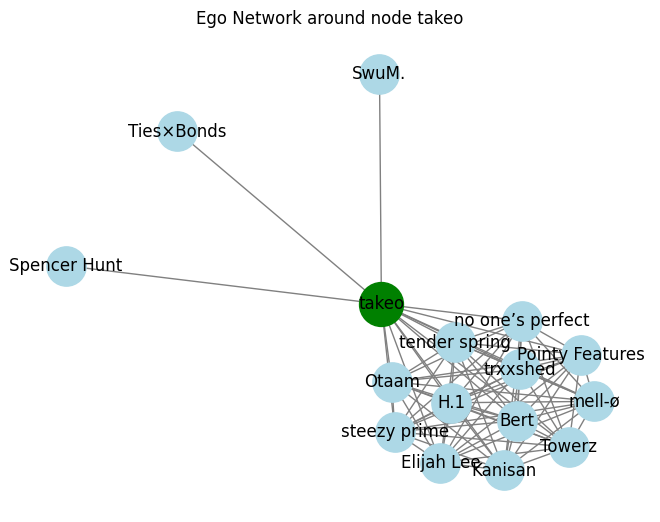

In [ ]:
#@title Most vital node ego network - new partition
node = top_10_nodes[0]

# Create the ego network
ego_net = nx.ego_graph(G2, node)


# Draw the ego network
pos = nx.spring_layout(ego_net)  # or any other layout
nx.draw(ego_net, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
# Highlight the ego node
nx.draw_networkx_nodes(ego_net, pos, nodelist=[node], node_size=1000, node_color='green')

plt.title(f"Ego Network around node {node}")
plt.show()

[[0.00000000e+00 4.00000000e+00 0.00000000e+00 2.00000000e+00]
 [1.00000000e+00 5.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.00000000e+00 6.00000000e+00 0.00000000e+00 2.00000000e+00]
 ...
 [1.13300000e+03 1.13700000e+03 6.99814451e-01 2.98000000e+02]
 [1.13500000e+03 1.13800000e+03 7.40676497e-01 4.37000000e+02]
 [1.13600000e+03 1.13900000e+03 7.44368087e-01 5.71000000e+02]]


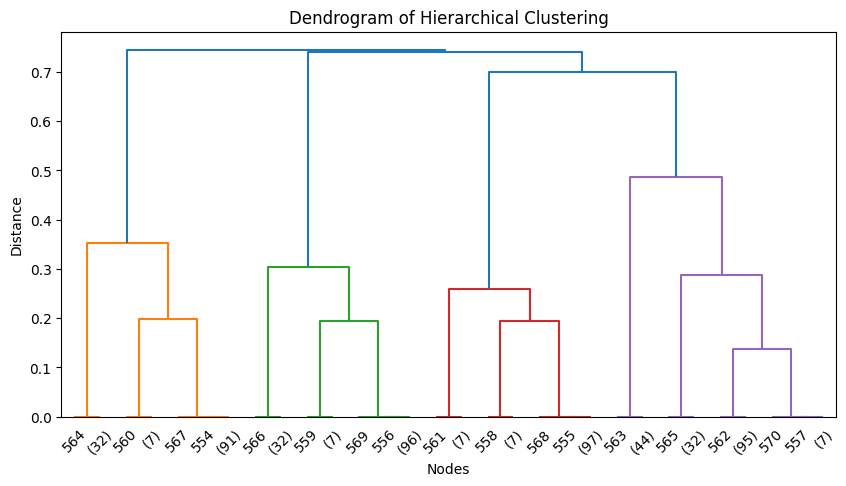

In [ ]:
#@title Dendrogram
distances = nx.to_numpy_array(G2)  # Convert the network to a distance matrix
linkage_matrix = hierarchy.linkage(squareform(distances), method='ward')  # Perform hierarchical clustering
print(linkage_matrix)
# Plot dendrogram to visualize the clustering
plt.figure(figsize=(10, 5))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp')
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Nodes')
plt.ylabel('Distance')
plt.show()